## Введение
### Аннотация
> **Проект:** Разработка ML-моделей для прогноза оттока клиентов\
> 
> **Заказчик:** Телекомуникационная компания (оператор сотовой связи)\
> 
> **Описание задачи:**
> 
> Телекомуникационная компания хочет бороться с оттоком клиентов.
> 
> Для этого ее сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей нужна модель, которая будет предсказывать, разорвёт ли абонент договор
>
> Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах
> 
> _❗️ Информация о договорах актуальна на 1 февраля 2020 года_


### Цель исследования
> Целью исследования является разработанная модель машинного обучения для прогноза оттока клиентов 

### Объект исследования
> Для исследования компанией были предоставлены следующие наборы данных, собранные из разных источников:
> ```python
> 'contract_new.csv'    # информация о договоре
> 'personal_new.csv'    # персональные данные клиента
> 'internet_new.csv'    # информация об интернет-услугах
> 'phone_new.csv'       # информация об услугах телефонии
> ```

### Результат исследования
> - Выбрана и предложена лучшая ML-модель согласно целям исследования
> - По итогам выбранной модели даны соответствующие рекомендации для бизнеса и сделаны выводы

### Ход исследования
**Исследование можно разделить на 3 блока:**
>
> **I. EDA**
>
> Изначальная информация о чистоте данных отсуствует. Поэтому, вначале данные будут загружены и изучены на наличие ошибок, недочетов, отсутствия данных, их корректности и наличия дубликатов. Далее будет проведена предобработка данных. После этого будет проведен исследовательский анализ данных
>
> **II Разработка ML-моделей**
>
> На основе уже иследованных и подготовленных данных будут обучены и разработаны несколько ML-моделей из которых будет выбрана лучшая из них, проведен ее анализ и сделаны выводы
>
> **III Заключительные выводы**
> 
> В конце всего исследования и разработки будут подготовлены заключительные выводы и даны общие рекомендации

**Следовательно, исследование данных будет состоять из 6 этапов:**
> 1. Загрузка и изучение данныз
> 2. Предобработка данных
> 3. Исследовательский анализ данных
> 4. Подготовка и обучение ML-моделей
> 5. Анализ лучшей модели
> 6. Заключительные выводы и рекомендации

## Настройка пространства
---

### Импорт библиотек
---

In [1]:
# Стандартные библиотеки
import os
import warnings

from io import StringIO
from IPython.display import display, Markdown
from joblib import Memory

# Сторонние библиотеки
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import phik
import seaborn as sns
import shap

from lightgbm import (
    LGBMClassifier
)
from imblearn.pipeline import Pipeline as ImpPipeline
from optuna.distributions import (
    CategoricalDistribution,
    IntDistribution,
    FloatDistribution
)
from optuna.integration import (
    OptunaSearchCV
)

from sklearn.compose import (
    ColumnTransformer
)
from sklearn.dummy import (
    DummyClassifier
)
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier
)
from sklearn.impute import (
    SimpleImputer
)
from sklearn.inspection import (
    permutation_importance
)
from sklearn.linear_model import (
    RidgeClassifier,
    PassiveAggressiveClassifier
)
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    roc_curve,
    RocCurveDisplay,
    auc
)
from sklearn.model_selection import (
    StratifiedKFold,
    train_test_split
)
from sklearn.neighbors import (
    KNeighborsClassifier
)
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler, 
    RobustScaler,
    PowerTransformer,
    QuantileTransformer,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.svm import SVC
from sklearn.tree import (
    DecisionTreeClassifier
)
from tqdm.auto import tqdm
from tqdm_joblib import tqdm_joblib

# Настройка параметров пространства
# Настройка стилей
sns.set_style('darkgrid')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Общие настройки
warnings.filterwarnings('ignore')
tqdm.pandas()

### Настройка костант
---

In [2]:
# ШРИФТЫ
# Размеры шрифтов
FONT_SIZE_LABEL = 12
FONT_SIZE_TICK = 10
FONT_SIZE_LEGEND = 10

# Веса шрифтов
FONT_WEIGHT_NORMAL = 'normal'

FONT_TITLE_KWARGS = dict(
    y=1.05,
    fontsize=18,
    fontweight='black'
)

FONT_SUBTITLE_KWARGS = dict(
    y=1.05,
    fontsize=16,
    fontweight='semibold'
)

# ЦВЕТА
# Палитры цветов
PALETTE_CAT = 'coolwarm_r'
PALETTE_CAT_ALT = 'coolwarm'
PALETTE_NUMERIC = 'Purples'
PALETTE_NUMERIC_ALT = 'Purples_r'
PALETTE_GREY = 'Greys'

# Одиночные цвета
COLORS_SINGLE_MAIN = sns.color_palette(PALETTE_NUMERIC, n_colors=6)
COLOR_SINGLE_BASIC = COLORS_SINGLE_MAIN[2]

COLORS_SINGLE_GREY = sns.color_palette(PALETTE_GREY, n_colors=6)
COLOR_SINGLE_GREY_BASIC = COLORS_SINGLE_GREY[2]

# Альфа канал
ALPHA_FILL = 0.6

# РАЗМЕРЫ ФИГУР
FIGSIZE_SINGLE = (18, 6)
FIGSIZE_DOUBLE = (16, 8)
FIGSIZE_GRID = (18, 6)
FIGSIZE_SQUARED = (18, 16)
FIGSIZE_SQUARED_SMALL = (12, 12)

# ПАРАМЕТРЫ ГРАФИКОВ
BINS = 30

# ПОДПИСИ ОСЕЙ
# Отступы
TITLE_Y = 1.05

# Категориальные признаки
X_CAPTION_CAT = 'Значение'
Y_CAPTION_CAT = 'Количество'

# Числовые признаки
X_CAPTION_NUMERIC = 'Значение'
Y_CAPTION_NUMERIC_FREQ = 'Частота'
Y_CAPTION_NUMERIC_DIST = 'Плотность'

# Важность
X_CAPTION_IMP = 'Важность'
Y_CAPTION_IMP = 'Признак'

# ПАРАМЕТРЫ МОДЕЛЕЙ
RANDOM_STATE = 20226
TEST_SIZE = .25
TARGET_FEATURE = 'user_left'

## Загрузка и изучение данных
___

### Подготовка методов для загрузки и изучения
___

In [3]:
def load_data(filename, path, alt_path=None, **params):
    local_file = os.path.join(path, filename)
    
    if os.path.exists(path):
        source = local_file
        source_type = 'Локально'
    else:
        source = f'{alt_path.rstrip("/")}/{filename}'
        source_type = 'Ссылка'

    df = pd.read_csv(source, **params)
    df.attrs['name'] = filename

    display(Markdown(
        f"### Файл `{filename}` загружен\n\n"
        f"**Тип источника**: {source_type}  \n"
        f"**Источник**: `{source}`"
    ))

    return df

In [4]:
def get_df_overview(df, discrete=None, section_name=None):
    def section(title):
        display(Markdown(f'### {title}\n___\n'))
    
    def show_info():
        section(f'Информация о DataFrame:')
        buffer = StringIO()
        df.info(buf=buffer)
        info_str = buffer.getvalue()
        display(Markdown(f'```{info_str}```'))
        
    def show_description():
        section('Статистическое описание данных')
        
        display(df.describe())
        
    def show_sample():
        section('5 случайных строк')
        
        display(df.sample(5))
        
    def show_unique():
        section('Кол-во уникальных значений')
        
        unique_vals = df.nunique().sort_values(ascending=False).to_frame('unique_values')
        
        display(unique_vals)
        
    def show_missing():
        section('Кол-во пропущенных значений')
        
        missing = df.isna().sum().to_frame('missing_values')
        missing['missing_pct'] = (missing['missing_values'] / len(df) * 100).round(2)
        
        if missing['missing_values'].sum() == 0:
            display(Markdown('✅ **Пропуски отсутствуют!**'))
        else:
            display(missing[missing.missing_values != 0])

        
    def show_duplicates_explicit():
        section('Явные дубликаты')
        count = df.index.duplicated().sum()
        
        if count == 0:
            display(Markdown('✅ Явные дубликаты **отсутствуют!**'))
        else:
            display(Markdown(f'**Найдено:** {count}'))
            display(df[df.duplicated()])
            
    def show_duplicates_implicit():
        section('Неявные дубликаты')
        
        found = False
        
        for col in df.select_dtypes(include=['object', 'category']):
            vals = df[col].dropna().astype(str)
            normed = vals.str.lower().str.strip()
            rev = vals.groupby(normed).unique()
            
            for norm_val, origs in rev.items():
                if len(origs) > 1:
                    found = True
                    display(Markdown(f'- **{col}**: {list(origs)} → нормализовано в `{norm_val}`'))
                    
        if not found:
            display(Markdown('✅ Неявные дубликаты **отсутствуют!**'))
            
    
    def get_top_n_series(series, n=15):
        counts = series.value_counts()
        
        if len(counts) <= n:
            return series

        top_cats = counts.head(n).index
        
        return series.where(series.isin(top_cats), f'+OTHER')


    def show_fast_plot_analysis(df=df, discrete=discrete):
        section('Беглый визуальный анализ')
        
        num_cols = [col for col in df.columns if discrete is None or col not in discrete]
        
        if num_cols:
            section('Количественные признаки')
            n_cols = 3
            n_rows = (len(num_cols) + n_cols - 1) // n_cols

            fig, axes = plt.subplots(
                n_rows,
                n_cols,
                figsize=(18, 4 * n_rows)
            )
            
            axes = axes.flatten()

            for col, ax in zip(num_cols, axes):
                sns.histplot(
                    df[col],
                    bins=BINS,
                    color=COLOR_SINGLE_BASIC,
                    ax=ax
                )
                
                ax.set_xlabel(X_CAPTION_NUMERIC)
                ax.set_ylabel(Y_CAPTION_NUMERIC_FREQ)
                ax.set_title(col)
                
                for label in ax.get_xticklabels():
                    label.set_rotation(45)
                    
            for ax in axes[len(num_cols):]:
                ax.set_visible(False)

            plt.tight_layout()
            plt.show()

        if discrete:
            section('Дискретные и категориальные признаки')
            n_cols = 3
            n_rows = (len(discrete) + n_cols - 1) // n_cols

            fig, axes = plt.subplots(
                n_rows,
                n_cols,
                figsize=(18, 6 * n_rows)
            )
            
            axes = axes.flatten()

            for col, ax in zip(discrete, axes):
                modified_series = get_top_n_series(df[col], n=15)
                
                sns.countplot(
                    x=modified_series,
                    order= modified_series.value_counts().index,
                    ax=ax,
                    color=COLOR_SINGLE_BASIC
                )
                
                ax.set_xlabel(X_CAPTION_NUMERIC)
                ax.set_ylabel(Y_CAPTION_NUMERIC_FREQ)
                ax.set_title(col)
                
                for label in ax.get_xticklabels():
                    label.set_rotation(45)
            for ax in axes[len(discrete):]:
                ax.set_visible(False)

            plt.tight_layout()
            plt.show()
                    
    sections = {
        'info': show_info,
        'description': show_description,
        'sample': show_sample,
        'unique': show_unique,
        'missing': show_missing,
        'duplicates_explicit': show_duplicates_explicit,
        'duplicates_implicit': show_duplicates_implicit,
        'fast_plot_analysis': show_fast_plot_analysis,
    }
    
    display(Markdown(f'## 🔎 Обзор данных `{df.attrs["name"]}`'))
        
    if section_name is None:
        for func in sections.values():
            func()
    else:
        func = sections.get(section_name)
        func()

### Загрузка данных
___

In [5]:
# Формирование параметров для загрузки данных
path = 'datasets'

loading_params = dict(
    index_col='customerID',
    sep=',',
    decimal='.',
    encoding='utf-8',
    na_values=['', ' ', 'null', 'NULL']
)

In [6]:
# Загрузка данных
df_contract_new = load_data(
    'contract_new.csv',
    path,
    parse_dates=['BeginDate', 'EndDate'],
    converters={'EndDate': lambda x: np.nan if x in ['No', 'no', '', ' '] else x},
    **loading_params
)

df_personal_new = load_data(
    'personal_new.csv',
    path,
    **loading_params
)

df_internet_new = load_data(
    'internet_new.csv', 
    path, 
    **loading_params
)

df_phone_new = load_data(
    'phone_new.csv', 
    path, 
    **loading_params
)

### Файл `contract_new.csv` загружен

**Тип источника**: Локально  
**Источник**: `datasets/contract_new.csv`

### Файл `personal_new.csv` загружен

**Тип источника**: Локально  
**Источник**: `datasets/personal_new.csv`

### Файл `internet_new.csv` загружен

**Тип источника**: Локально  
**Источник**: `datasets/internet_new.csv`

### Файл `phone_new.csv` загружен

**Тип источника**: Локально  
**Источник**: `datasets/phone_new.csv`

### Изучение данных `df_contract_new`
___

## 🔎 Обзор данных `contract_new.csv`

### Информация о DataFrame:
___


```<class 'pandas.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[us]
 1   EndDate           1101 non-null   datetime64[us]
 2   Type              7043 non-null   str           
 3   PaperlessBilling  7043 non-null   str           
 4   PaymentMethod     7043 non-null   str           
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
dtypes: datetime64[us](2), float64(2), str(3)
memory usage: 732.2 KB
```

### Статистическое описание данных
___


,BeginDate,EndDate,MonthlyCharges,TotalCharges
count,7043,1101,7043.0000,7032.0000
mean,2017-04-30 13:01:50.918642,2018-03-12 18:21:15.204359,64.7617,2118.6218
min,2013-10-01 00:00:00,2014-06-01 00:00:00,18.2500,19.0500
25%,2015-06-01 00:00:00,2017-05-01 00:00:00,35.5000,439.7450
50%,2017-09-01 00:00:00,2018-06-01 00:00:00,70.3500,1345.2750
75%,2019-04-01 00:00:00,2019-04-01 00:00:00,89.8500,3239.3175
max,2020-02-01 00:00:00,2020-01-01 00:00:00,118.7500,9221.3800
std,NaN,NaN,30.0900,2112.7362


### 5 случайных строк
___


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
1545-ACTAS,2016-02-01,NaT,One year,Yes,Bank transfer (automatic),99.7000,4785.6000
8974-OVACP,2020-01-01,NaT,Month-to-month,No,Mailed check,20.1500,20.1500
7963-SHNDT,2015-10-01,NaT,Two year,No,Mailed check,39.1000,2033.2000
2030-BTZRO,2019-08-01,NaT,Two year,Yes,Credit card (automatic),20.4000,132.1900
8931-GJJIQ,2019-01-01,NaT,Month-to-month,Yes,Electronic check,83.3000,1082.9000


### Кол-во уникальных значений
___


,unique_values
TotalCharges,6657
MonthlyCharges,1585
BeginDate,77
EndDate,66
PaymentMethod,4
Type,3
PaperlessBilling,2


### Кол-во пропущенных значений
___


,missing_values,missing_pct
EndDate,5942,84.3700
TotalCharges,11,0.1600


### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


### Количественные признаки
___


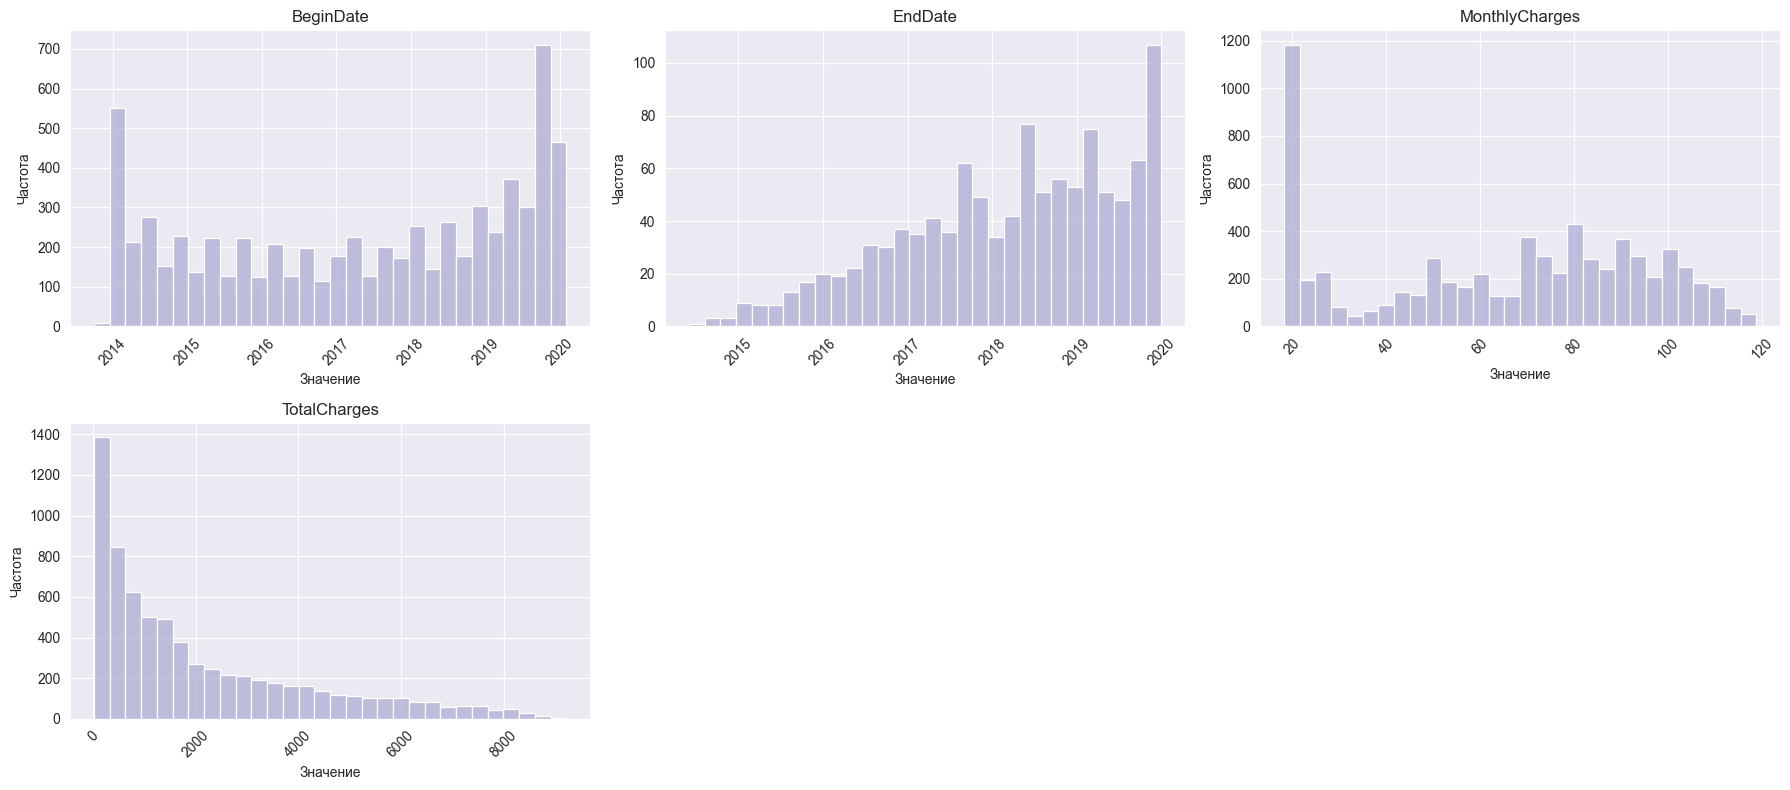

### Дискретные и категориальные признаки
___


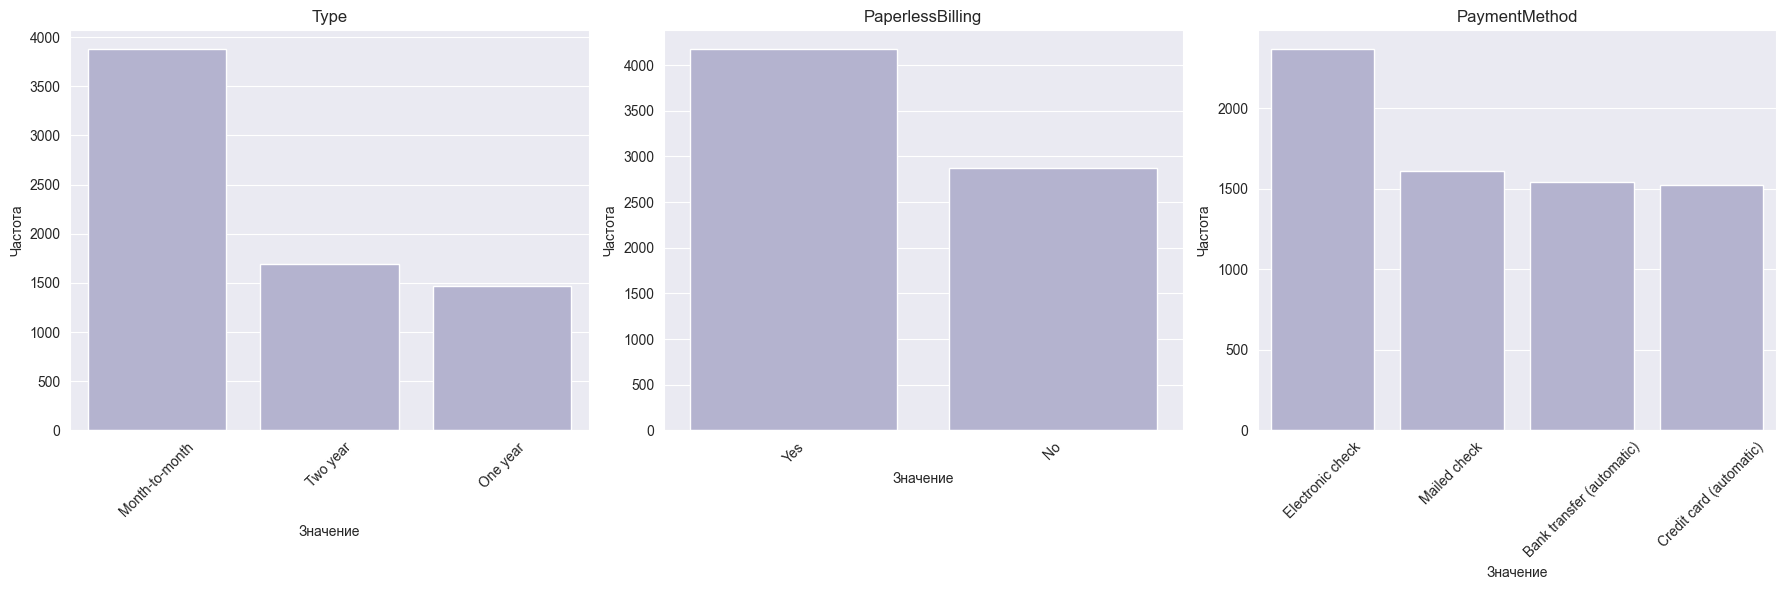

In [7]:
get_df_overview(
    df_contract_new,
    discrete=[
        'Type',
        'PaperlessBilling',
        'PaymentMethod'
    ]
)

### Изучение данных `df_personal_new`
___

## 🔎 Обзор данных `personal_new.csv`

### Информация о DataFrame:
___


```<class 'pandas.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   gender         7043 non-null   str  
 1   SeniorCitizen  7043 non-null   int64
 2   Partner        7043 non-null   str  
 3   Dependents     7043 non-null   str  
dtypes: int64(1), str(3)
memory usage: 411.1 KB
```

### Статистическое описание данных
___


,SeniorCitizen
count,7043.0000
mean,0.1621
std,0.3686
min,0.0000
25%,0.0000
50%,0.0000
75%,0.0000
max,1.0000


### 5 случайных строк
___


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
5032-USPKF,Female,0,No,No
2325-WINES,Female,0,No,No
6133-OZILE,Female,0,No,No
1346-UFHAX,Female,0,No,No
3853-LYGAM,Male,0,No,No


### Кол-во уникальных значений
___


,unique_values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2


### Кол-во пропущенных значений
___


✅ **Пропуски отсутствуют!**

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


### Дискретные и категориальные признаки
___


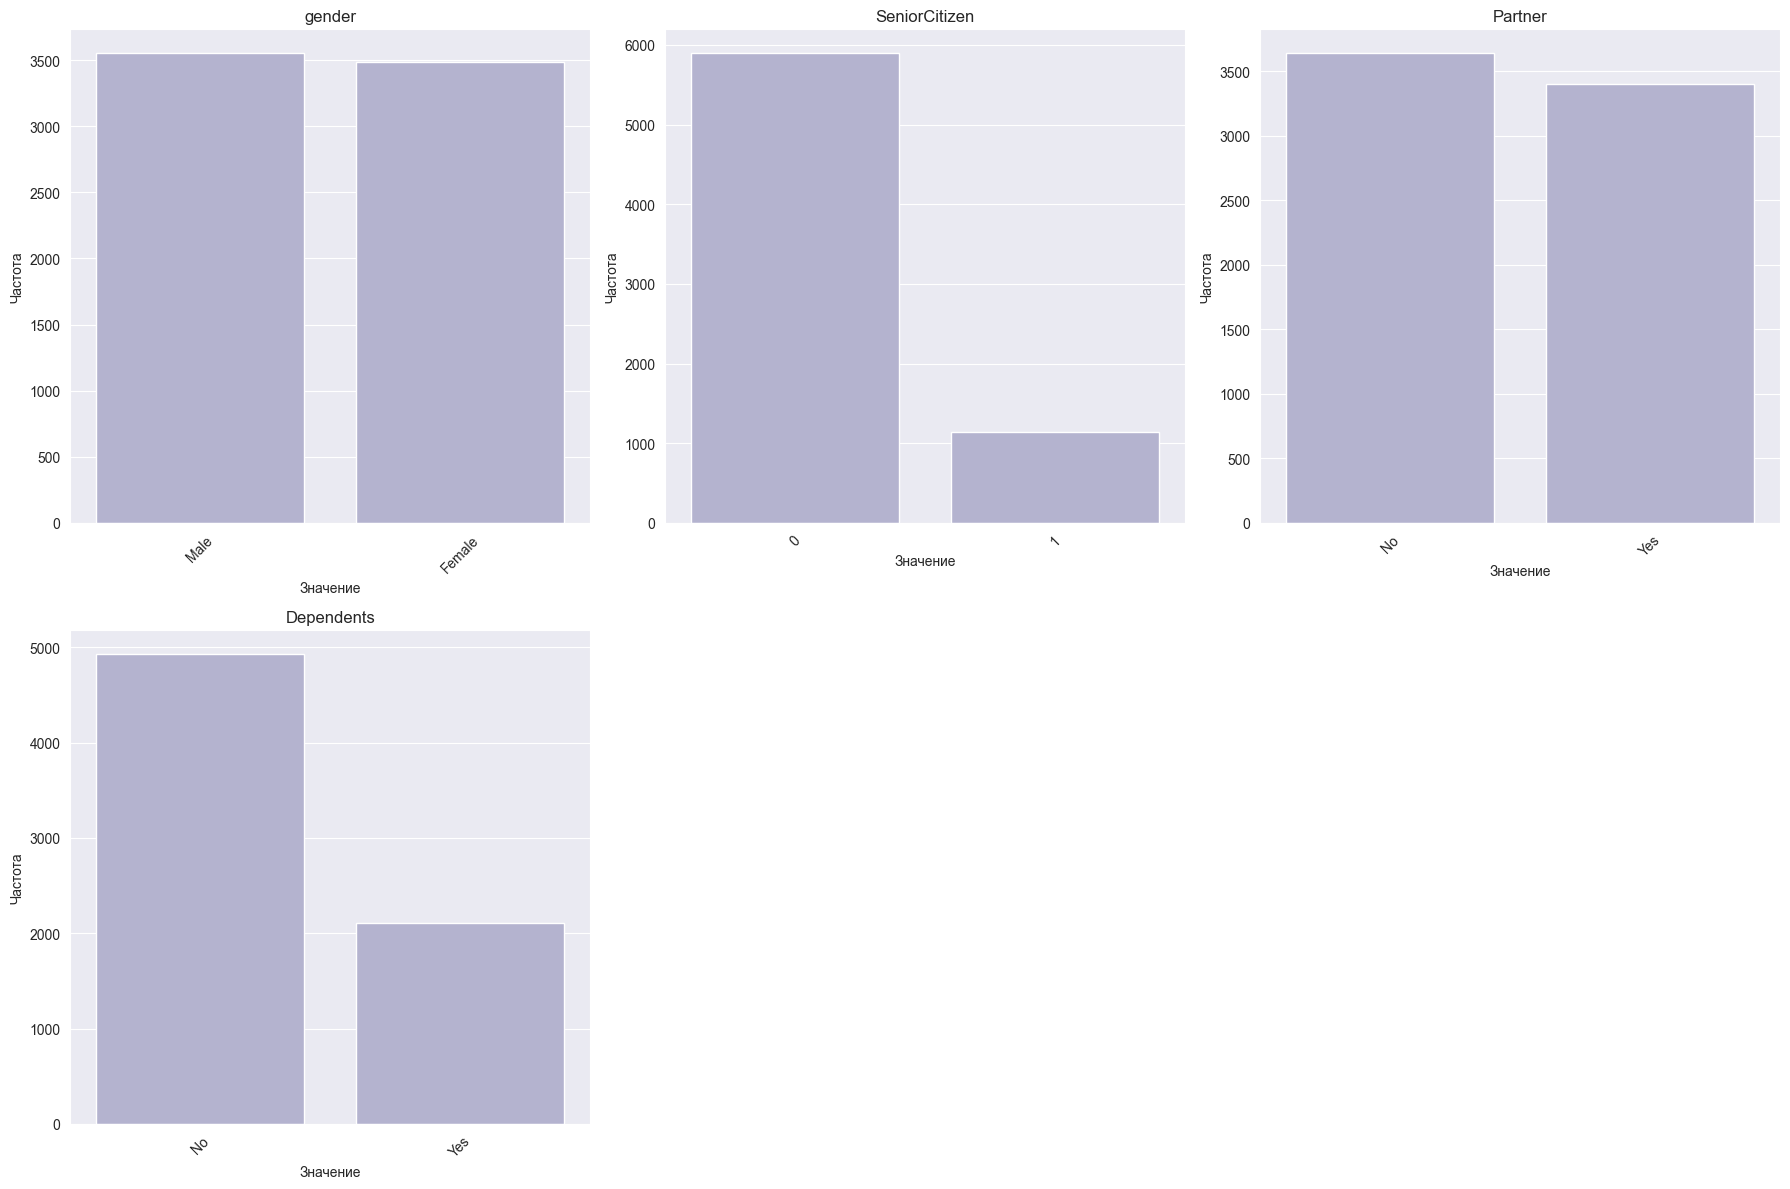

In [8]:
get_df_overview(
    df_personal_new,
    discrete=list(df_personal_new.columns)
)

### Изучение данных `df_internet_new`
___

## 🔎 Обзор данных `internet_new.csv`

### Информация о DataFrame:
___


```<class 'pandas.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   InternetService   5517 non-null   str  
 1   OnlineSecurity    5517 non-null   str  
 2   OnlineBackup      5517 non-null   str  
 3   DeviceProtection  5517 non-null   str  
 4   TechSupport       5517 non-null   str  
 5   StreamingTV       5517 non-null   str  
 6   StreamingMovies   5517 non-null   str  
dtypes: str(7)
memory usage: 517.7 KB
```

### Статистическое описание данных
___


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517
unique,2,2,2,2,2,2,2
top,Fiber optic,No,No,No,No,No,No
freq,3096,3498,3088,3095,3473,2810,2785


### 5 случайных строк
___


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
5791-KAJFD,DSL,Yes,No,Yes,No,No,Yes
1162-ECVII,Fiber optic,No,Yes,Yes,Yes,Yes,Yes
0011-IGKFF,Fiber optic,No,Yes,Yes,No,Yes,Yes
3865-QBWSJ,Fiber optic,Yes,No,No,No,No,No
3096-IZETN,Fiber optic,No,No,No,No,No,Yes


### Кол-во уникальных значений
___


,unique_values
InternetService,2
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2
StreamingTV,2
StreamingMovies,2


### Кол-во пропущенных значений
___


✅ **Пропуски отсутствуют!**

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


### Дискретные и категориальные признаки
___


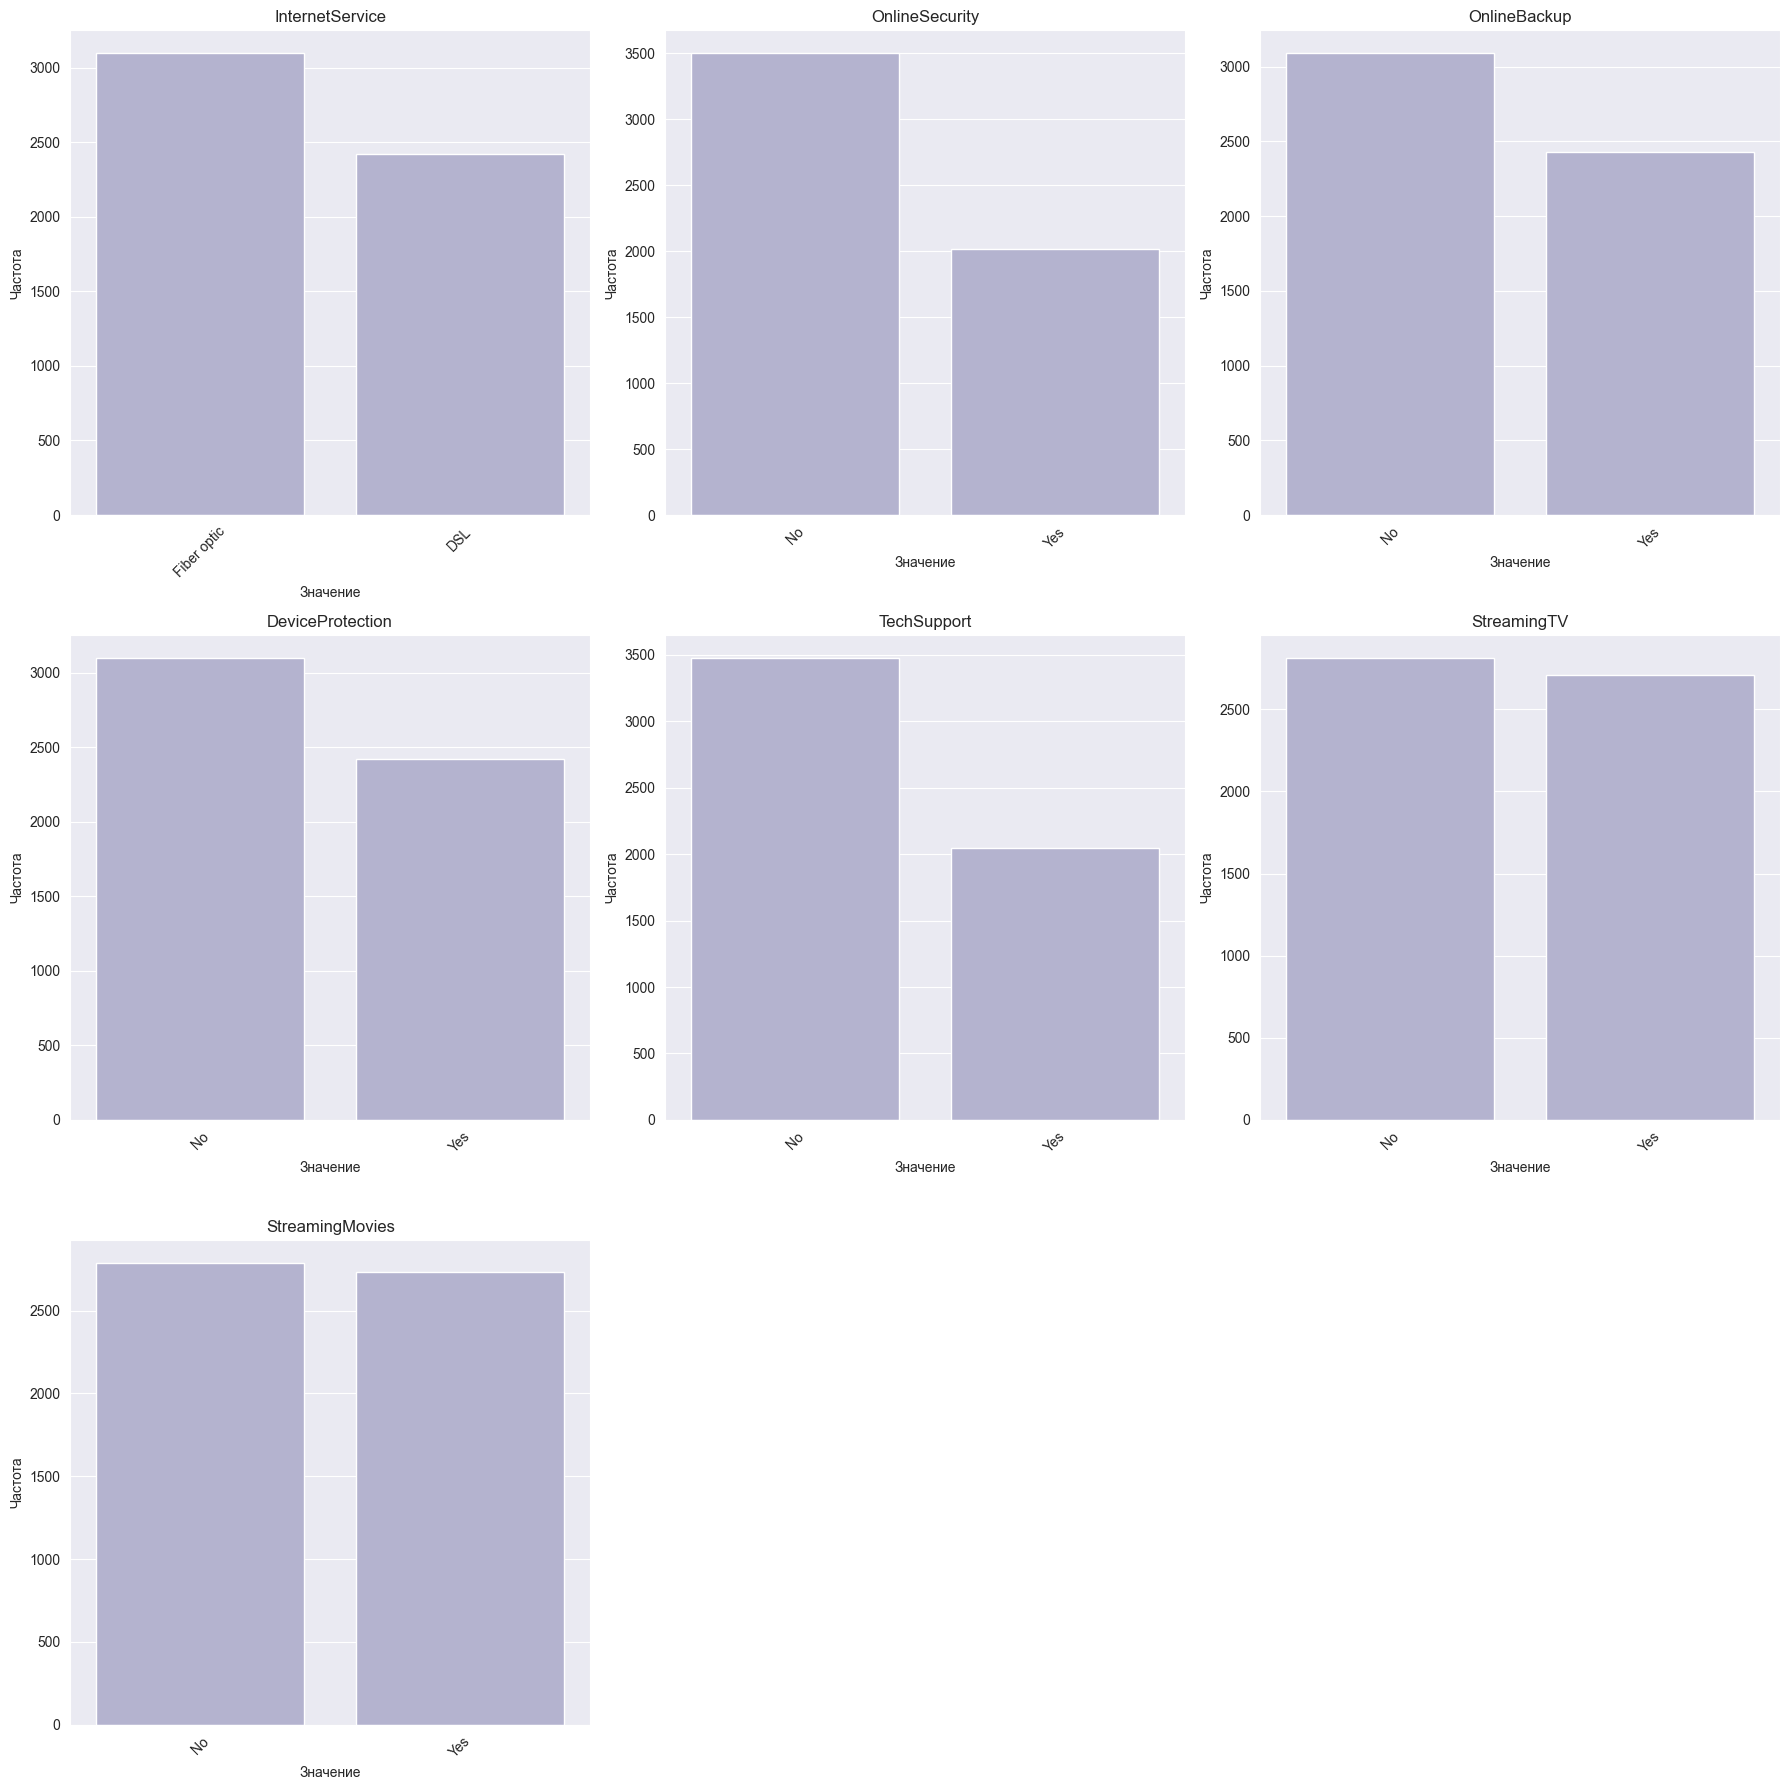

In [9]:
get_df_overview(
    df_internet_new,
    discrete=list(df_internet_new.columns)
)

### Изучение данных `df_phone_new`
___

## 🔎 Обзор данных `phone_new.csv`

### Информация о DataFrame:
___


```<class 'pandas.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MultipleLines  6361 non-null   str  
dtypes: str(1)
memory usage: 176.8 KB
```

### Статистическое описание данных
___


,MultipleLines
count,6361
unique,2
top,No
freq,3390


### 5 случайных строк
___


,MultipleLines
customerID,
3191-CSNMG,No
4692-NNQRU,No
0196-JTUQI,Yes
9039-ZVJDC,No
7109-MFBYV,No


### Кол-во уникальных значений
___


,unique_values
MultipleLines,2


### Кол-во пропущенных значений
___


✅ **Пропуски отсутствуют!**

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


### Дискретные и категориальные признаки
___


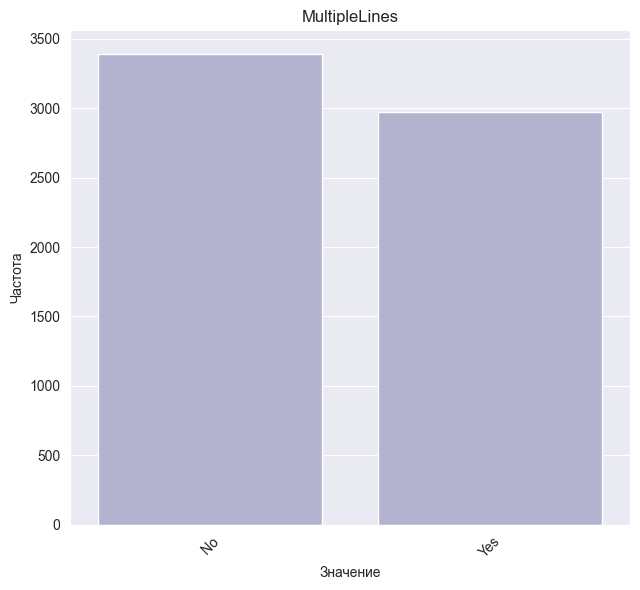

In [10]:
get_df_overview(
    df_phone_new,
    discrete=list(df_phone_new.columns)
)

### Выводы
___

**Описание `df_contract_new`**
> - **Размерность датафрейма**: 7043 × 7
> - **Индекс датафрейма**: `customerID`, все значения уникальны
> - **Дискретные / Категориальные признаки**:
> ```python
> 'Type', 'PaperlessBilling', 'PaymentMethod'
> ```
> - **Количественные признаки**:
> ```python
> 'MonthlyCharges', 'TotalCharges'
> ```
> - **Пропущенные значения**:
>
>    - `TotalCharges` - 11 пропусков
>    - `EndDate` - пропуски связаны с еще не закрытыми договорами обслуживания
> - **Явные дубликаты**: отсутствуют
> - **Неявные дубликаты**: отсутствуют
> - **Названия колонок, столбцов и пр.**: не соответствует общепринятому стилю
> - **Необходимость предобработки**: да
---
**Описание `df_personal_new`**
> - **Размерность датафрейма**: 7043 × 4
> - **Индекс датафрейма**: `customerID`, все значения уникальны
> - **Дискретные / Категориальные признаки**: все
> - **Количественные признаки**: отсутствуют
> - **Пропущенные значения**: отсутствуют
> - **Явные дубликаты**: отсутствуют
> - **Неявные дубликаты**: отсутствуют
> - **Названия колонок, столбцов и пр.**: не соответствует общепринятому стилю
> - **Необходимость предобработки**: да
---
**Описание `df_internet_new`**
> - **Размерность датафрейма**: 5517 × 7
> - **Индекс датафрейма**: `customerID`, все значения уникальны
> - **Дискретные / Категориальные признаки**: все
> - **Количественные признаки**: отсутствуют
> - **Пропущенные значения**:    отсутствуют
> - **Явные дубликаты**: отсутствуют
> - **Неявные дубликаты**: отсутствуют
> - **Названия колонок, столбцов и пр.**: не соответствует общепринятому стилю
> - **Необходимость предобработки**: да
---
**Описание `df_phone_new`**
> - **Размерность датафрейма**: 6361 × 1
> - **Индекс датафрейма**: `customerID`, все значения уникальны
> - **Дискретные / Категориальные признаки**:все
> - **Количественные признаки**: отсутствуют
> - **Пропущенные значения**:    отсутствуют
> - **Явные дубликаты**: отсутствуют
> - **Неявные дубликаты**: отсутствуют
> - **Названия колонок, столбцов и пр.**: не соответствует общепринятому стилю
> - **Необходимость предобработки**: да

## Предобработка данных
___

### Подготовка методов для предобработки
___

In [11]:
def col_names_cleaner(df):
    df.columns = (
        df.columns
        .str.replace(r'([A-Z])', r'_\1', regex=True)
        .str.lower()
        .str.replace(r' ', '_')
        .str.strip('_')
    )
        
    return df

In [12]:
def text_cleaner(df):
    text_columns = df.select_dtypes(include=['object']).columns
    
    for col in text_columns:
        df[col] = df[col].str.lower()
    
    return df

In [13]:
def get_short_df_info(df):
    results = []
   
    for col in df:
        results.append({
            'Тип данных': df[col].dtype,
            'Уник. всего.': df[col].nunique(),
            'Уник. значения': df[col].unique(),
            'NaN (кол-во.)': df[col].isna().sum(),
            'NaN (%)': df[col].isnull().mean().round(4),
        })
        
    main_info = pd.DataFrame(data=results).set_index(df.columns)
    
    display(Markdown(f'### Проверочные данные по датафрейму `{df.attrs["name"]}`\n___\n'))
    display(Markdown(f'Размерность: {df.shape}'))
    
    return main_info

### Предобработка данных
___

In [14]:
# Создание копий для работы
cleaned_contract_new = df_contract_new.copy()
cleaned_internet_new = df_internet_new.copy()
cleaned_personal_new = df_personal_new.copy()
cleaned_phone_new = df_phone_new.copy()


cleaned_contract_new.attrs['name'] = 'cleaned_contract_new'
cleaned_internet_new.attrs['name'] = 'cleaned_internet_new'
cleaned_personal_new.attrs['name'] = 'cleaned_personal_new'
cleaned_phone_new.attrs['name'] = 'cleaned_phone_new'

In [15]:
# Обработка данных по всем датафреймам
for df in (cleaned_contract_new, cleaned_internet_new, cleaned_personal_new, cleaned_phone_new):
    col_names_cleaner(df)
    text_cleaner(df)
    df.index.name = 'uid'
    
    obj_dtypes = df.select_dtypes(include=['object']).columns
    df[obj_dtypes] = df[obj_dtypes].astype('category')

In [16]:
# Замента типа данных в столбце 'senior_citizen'
cleaned_personal_new.senior_citizen = (
    cleaned_personal_new
    .senior_citizen
    .replace({0: 'no', 1:'yes'})
    .astype('category')
)

In [17]:
# Формирование общего признака по кол-ву подключенных сервисов
service_cols = [
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_t_v',
    'streaming_movies'
]

cleaned_internet_new['connected_services_count'] = (
    (cleaned_internet_new[service_cols] != 'no')
    .sum(axis=1)
    .astype('category')
)

In [18]:
# Проверка очищенных данных
for df in (cleaned_contract_new, cleaned_internet_new, cleaned_personal_new, cleaned_phone_new):
    display(get_short_df_info(df))

### Проверочные данные по датафрейму `cleaned_contract_new`
___


Размерность: (7043, 7)

,Тип данных,Уник. всего.,Уник. значения,NaN (кол-во.),NaN (%)
begin_date,datetime64[us],77,"[2020-01-01 00:00:00, 2017-04-01 00:00:00, 2019-10-01 00:00:00, 2016-05-01 00:00:00, 2019-09-01 00:00:00, 2019-03-01 00:00:00, 2018-04-01 00:00:00, 2019-04-01 00:00:00, 2017-07-01 00:00:00, 2014-12-01 00:00:00, 2019-01-01 00:00:00, 2018-10-01 00:00:00, 2015-04-01 00:00:00, 2015-09-01 00:00:00, 2018-01-01 00:00:00, 2014-05-01 00:00:00, 2015-10-01 00:00:00, 2014-03-01 00:00:00, 2018-05-01 00:00:00, 2019-11-01 00:00:00, 2019-02-01 00:00:00, 2016-01-01 00:00:00, 2017-08-01 00:00:00, 2015-12-01 00:00:00, 2014-02-01 00:00:00, 2018-06-01 00:00:00, 2019-12-01 00:00:00, 2017-11-01 00:00:00, 2019-06-01 00:00:00, 2016-04-01 00:00:00, 2017-02-01 00:00:00, 2018-12-01 00:00:00, 2014-04-01 00:00:00, 2018-09-01 00:00:00, 2014-11-01 00:00:00, 2016-07-01 00:00:00, 2015-02-01 00:00:00, 2018-07-01 00:00:00, 2014-08-01 00:00:00, 2016-03-01 00:00:00, 2018-08-01 00:00:00, 2014-10-01 00:00:00, 2015-06-01 00:00:00, 2016-08-01 00:00:00, 2019-05-01 00:00:00, 2017-03-01 00:00:00, 2016-02-01 00:00:00, 2017-09-01 00:00:00, 2014-09-01 00:00:00, 2017-12-01 00:00:00, 2016-12-01 00:00:00, 2017-06-01 00:00:00, 2015-05-01 00:00:00, 2016-10-01 00:00:00, 2016-09-01 00:00:00, 2019-08-01 00:00:00, 2019-07-01 00:00:00, 2017-05-01 00:00:00, 2017-10-01 00:00:00, 2014-07-01 00:00:00, 2018-03-01 00:00:00, 2015-01-01 00:00:00, 2018-11-01 00:00:00, 2015-03-01 00:00:00, 2018-02-01 00:00:00, 2016-06-01 00:00:00, 2015-08-01 00:00:00, 2015-11-01 00:00:00, 2014-06-01 00:00:00, 2017-01-01 00:00:00, 2015-07-01 00:00:00, 2020-02-01 00:00:00, 2016-11-01 00:00:00, 2013-11-01 00:00:00, 2014-01-01 00:00:00, 2013-10-01 00:00:00, 2013-12-01 00:00:00]",0,0.0000
end_date,datetime64[us],66,"[NaT, 2017-05-01 00:00:00, 2016-03-01 00:00:00, 2018-09-01 00:00:00, 2018-11-01 00:00:00, 2018-12-01 00:00:00, 2019-08-01 00:00:00, 2018-07-01 00:00:00, 2017-09-01 00:00:00, 2015-09-01 00:00:00, 2016-07-01 00:00:00, 2016-06-01 00:00:00, 2018-03-01 00:00:00, 2019-02-01 00:00:00, 2018-06-01 00:00:00, 2019-06-01 00:00:00, 2020-01-01 00:00:00, 2019-11-01 00:00:00, 2016-09-01 00:00:00, 2015-06-01 00:00:00, 2016-12-01 00:00:00, 2019-05-01 00:00:00, 2019-04-01 00:00:00, 2017-06-01 00:00:00, 2017-08-01 00:00:00, 2018-04-01 00:00:00, 2018-08-01 00:00:00, 2018-02-01 00:00:00, 2019-07-01 00:00:00, 2015-12-01 00:00:00, 2014-06-01 00:00:00, 2018-10-01 00:00:00, 2019-01-01 00:00:00, 2017-07-01 00:00:00, 2017-12-01 00:00:00, 2018-05-01 00:00:00, 2015-11-01 00:00:00, 2019-10-01 00:00:00, 2019-03-01 00:00:00, 2016-02-01 00:00:00, 2016-10-01 00:00:00, 2018-01-01 00:00:00, 2017-11-01 00:00:00, 2015-10-01 00:00:00, 2019-12-01 00:00:00, 2015-07-01 00:00:00, 2017-04-01 00:00:00, 2015-02-01 00:00:00, 2017-03-01 00:00:00, 2016-05-01 00:00:00, 2016-11-01 00:00:00, 2015-08-01 00:00:00, 2019-09-01 00:00:00, 2017-10-01 00:00:00, 2017-02-01 00:00:00, 2016-08-01 00:00:00, 2016-04-01 00:00:00, 2015-05-01 00:00:00, 2014-09-01 00:00:00, 2014-10-01 00:00:00, 2017-01-01 00:00:00, 2015-03-01 00:00:00, 2015-01-01 00:00:00, 2016-01-01 00:00:00, 2015-04-01 00:00:00, 2014-12-01 00:00:00, 2014-11-01 00:00:00]",5942,0.8437
type,category,3,"['month-to-month', 'one year', 'two year'] Categories (3, str): ['month-to-month', 'one year', 'two year']",0,0.0000
paperless_billing,category,2,"['yes', 'no'] Categories (2, str): ['no', 'yes']",0,0.0000
payment_method,category,4,"['electronic check', 'mailed check', 'bank transfer (automatic)', 'credit card (automatic)'] Categories (4, str): ['bank transfer (automatic)', 'credit card (automatic)', 'electronic check', 'mailed check']",0,0.0000
monthly_charges,float64,1585,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05, 39.65, 19.8, 20.15, 59.9, 59.6, 55.3, 99.35, 30.2, 90.25, 64.7, 96.35, 95.5, 66.15, 20.2, 45.25, 99.9, 69.7, 74.8, 106.35, 97.85, 49.55, 69.2, 20.75, 79.85, 76.2, 84.5, 49.25, 80.65, 79.75, 64.15, 99.1, 69.5, 74

### Проверочные данные по датафрейму `cleaned_internet_new`
___


Размерность: (5517, 8)

,Тип данных,Уник. всего.,Уник. значения,NaN (кол-во.),NaN (%)
internet_service,category,2,"['dsl', 'fiber optic'] Categories (2, str): ['dsl', 'fiber optic']",0,0.0000
online_security,category,2,"['no', 'yes'] Categories (2, str): ['no', 'yes']",0,0.0000
online_backup,category,2,"['yes', 'no'] Categories (2, str): ['no', 'yes']",0,0.0000
device_protection,category,2,"['no', 'yes'] Categories (2, str): ['no', 'yes']",0,0.0000
tech_support,category,2,"['no', 'yes'] Categories (2, str): ['no', 'yes']",0,0.0000
streaming_t_v,category,2,"['no', 'yes'] Categories (2, str): ['no', 'yes']",0,0.0000
streaming_movies,category,2,"['no', 'yes'] Categories (2, str): ['no', 'yes']",0,0.0000
connected_services_count,category,7,"[1, 2, 3, 0, 4, 5, 6] Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]",0,0.0000


### Проверочные данные по датафрейму `cleaned_personal_new`
___


Размерность: (7043, 4)

,Тип данных,Уник. всего.,Уник. значения,NaN (кол-во.),NaN (%)
gender,category,2,"['female', 'male'] Categories (2, str): ['female', 'male']",0,0.0000
senior_citizen,category,2,"['no', 'yes'] Categories (2, str): ['no', 'yes']",0,0.0000
partner,category,2,"['yes', 'no'] Categories (2, str): ['no', 'yes']",0,0.0000
dependents,category,2,"['no', 'yes'] Categories (2, str): ['no', 'yes']",0,0.0000


### Проверочные данные по датафрейму `cleaned_phone_new`
___


Размерность: (6361, 1)

,Тип данных,Уник. всего.,Уник. значения,NaN (кол-во.),NaN (%)
multiple_lines,category,2,"['no', 'yes'] Categories (2, str): ['no', 'yes']",0,0.0000


### Обьединение данных
___

In [19]:
# Объединение данных
df_full = (
    cleaned_contract_new
    .merge(cleaned_internet_new, on='uid',how='left')
    .merge(cleaned_personal_new, on='uid',how='left')
    .merge(cleaned_phone_new, on='uid',how='left')
)

df_full.attrs['name'] = 'df_full'

# Проверка на появление пропусков
get_short_df_info(df_full)

### Проверочные данные по датафрейму `df_full`
___


Размерность: (7043, 20)

,Тип данных,Уник. всего.,Уник. значения,NaN (кол-во.),NaN (%)
begin_date,datetime64[us],77,"[2020-01-01 00:00:00, 2017-04-01 00:00:00, 2019-10-01 00:00:00, 2016-05-01 00:00:00, 2019-09-01 00:00:00, 2019-03-01 00:00:00, 2018-04-01 00:00:00, 2019-04-01 00:00:00, 2017-07-01 00:00:00, 2014-12-01 00:00:00, 2019-01-01 00:00:00, 2018-10-01 00:00:00, 2015-04-01 00:00:00, 2015-09-01 00:00:00, 2018-01-01 00:00:00, 2014-05-01 00:00:00, 2015-10-01 00:00:00, 2014-03-01 00:00:00, 2018-05-01 00:00:00, 2019-11-01 00:00:00, 2019-02-01 00:00:00, 2016-01-01 00:00:00, 2017-08-01 00:00:00, 2015-12-01 00:00:00, 2014-02-01 00:00:00, 2018-06-01 00:00:00, 2019-12-01 00:00:00, 2017-11-01 00:00:00, 2019-06-01 00:00:00, 2016-04-01 00:00:00, 2017-02-01 00:00:00, 2018-12-01 00:00:00, 2014-04-01 00:00:00, 2018-09-01 00:00:00, 2014-11-01 00:00:00, 2016-07-01 00:00:00, 2015-02-01 00:00:00, 2018-07-01 00:00:00, 2014-08-01 00:00:00, 2016-03-01 00:00:00, 2018-08-01 00:00:00, 2014-10-01 00:00:00, 2015-06-01 00:00:00, 2016-08-01 00:00:00, 2019-05-01 00:00:00, 2017-03-01 00:00:00, 2016-02-01 00:00:00, 2017-09-01 00:00:00, 2014-09-01 00:00:00, 2017-12-01 00:00:00, 2016-12-01 00:00:00, 2017-06-01 00:00:00, 2015-05-01 00:00:00, 2016-10-01 00:00:00, 2016-09-01 00:00:00, 2019-08-01 00:00:00, 2019-07-01 00:00:00, 2017-05-01 00:00:00, 2017-10-01 00:00:00, 2014-07-01 00:00:00, 2018-03-01 00:00:00, 2015-01-01 00:00:00, 2018-11-01 00:00:00, 2015-03-01 00:00:00, 2018-02-01 00:00:00, 2016-06-01 00:00:00, 2015-08-01 00:00:00, 2015-11-01 00:00:00, 2014-06-01 00:00:00, 2017-01-01 00:00:00, 2015-07-01 00:00:00, 2020-02-01 00:00:00, 2016-11-01 00:00:00, 2013-11-01 00:00:00, 2014-01-01 00:00:00, 2013-10-01 00:00:00, 2013-12-01 00:00:00]",0,0.0000
end_date,datetime64[us],66,"[NaT, 2017-05-01 00:00:00, 2016-03-01 00:00:00, 2018-09-01 00:00:00, 2018-11-01 00:00:00, 2018-12-01 00:00:00, 2019-08-01 00:00:00, 2018-07-01 00:00:00, 2017-09-01 00:00:00, 2015-09-01 00:00:00, 2016-07-01 00:00:00, 2016-06-01 00:00:00, 2018-03-01 00:00:00, 2019-02-01 00:00:00, 2018-06-01 00:00:00, 2019-06-01 00:00:00, 2020-01-01 00:00:00, 2019-11-01 00:00:00, 2016-09-01 00:00:00, 2015-06-01 00:00:00, 2016-12-01 00:00:00, 2019-05-01 00:00:00, 2019-04-01 00:00:00, 2017-06-01 00:00:00, 2017-08-01 00:00:00, 2018-04-01 00:00:00, 2018-08-01 00:00:00, 2018-02-01 00:00:00, 2019-07-01 00:00:00, 2015-12-01 00:00:00, 2014-06-01 00:00:00, 2018-10-01 00:00:00, 2019-01-01 00:00:00, 2017-07-01 00:00:00, 2017-12-01 00:00:00, 2018-05-01 00:00:00, 2015-11-01 00:00:00, 2019-10-01 00:00:00, 2019-03-01 00:00:00, 2016-02-01 00:00:00, 2016-10-01 00:00:00, 2018-01-01 00:00:00, 2017-11-01 00:00:00, 2015-10-01 00:00:00, 2019-12-01 00:00:00, 2015-07-01 00:00:00, 2017-04-01 00:00:00, 2015-02-01 00:00:00, 2017-03-01 00:00:00, 2016-05-01 00:00:00, 2016-11-01 00:00:00, 2015-08-01 00:00:00, 2019-09-01 00:00:00, 2017-10-01 00:00:00, 2017-02-01 00:00:00, 2016-08-01 00:00:00, 2016-04-01 00:00:00, 2015-05-01 00:00:00, 2014-09-01 00:00:00, 2014-10-01 00:00:00, 2017-01-01 00:00:00, 2015-03-01 00:00:00, 2015-01-01 00:00:00, 2016-01-01 00:00:00, 2015-04-01 00:00:00, 2014-12-01 00:00:00, 2014-11-01 00:00:00]",5942,0.8437
type,category,3,"['month-to-month', 'one year', 'two year'] Categories (3, str): ['month-to-month', 'one year', 'two year']",0,0.0000
paperless_billing,category,2,"['yes', 'no'] Categories (2, str): ['no', 'yes']",0,0.0000
payment_method,category,4,"['electronic check', 'mailed check', 'bank transfer (automatic)', 'credit card (automatic)'] Categories (4, str): ['bank transfer (automatic)', 'credit card (automatic)', 'electronic check', 'mailed check']",0,0.0000
monthly_charges,float64,1585,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05, 39.65, 19.8, 20.15, 59.9, 59.6, 55.3, 99.35, 30.2, 90.25, 64.7, 96.35, 95.5, 66.15, 20.2, 45.25, 99.9, 69.7, 74.8, 106.35, 97.85, 49.55, 69.2, 20.75, 79.85, 76.2, 84.5, 49.25, 80.65, 79.75, 64.15, 99.1, 69.5, 74

In [20]:
# Обработка появившихся пропусков в категориальных данных на unknown
cat_cols = df_full.select_dtypes('category').columns

df_full[cat_cols] = (
    df_full[cat_cols]
    .astype('object')
    .fillna('unknown')
    .astype('category')
)

In [21]:
# Замена значения unknown на 0 в connected_services_count
# Считаем как отсуствие сервисов в принципе
df_full.connected_services_count = (
    df_full.connected_services_count
    .astype('object')
    .replace('unknown', -1)
    .astype(int)
    .astype('category')
)

In [22]:
# Просмотр пропусков в total_charges
df_full[df_full.total_charges.isna()]

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,connected_services_count,gender,senior_citizen,partner,dependents,multiple_lines
uid,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,NaT,two year,yes,bank transfer (automatic),52.5500,NaN,dsl,yes,no,yes,yes,yes,no,4,female,no,yes,yes,unknown
3115-CZMZD,2020-02-01,NaT,two year,no,mailed check,20.2500,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,-1,male,no,no,yes,no
5709-LVOEQ,2020-02-01,NaT,two year,no,mailed check,80.8500,NaN,dsl,yes,yes,yes,no,yes,yes,5,female,no,yes,yes,no
4367-NUYAO,2020-02-01,NaT,two year,no,mailed check,25.7500,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,-1,male,no,yes,yes,yes
1371-DWPAZ,2020-02-01,NaT,two year,no,credit card (automatic),56.0500,NaN,dsl,yes,yes,yes,yes,yes,no,5,female,no,yes,yes,unknown
7644-OMVMY,2020-02-01,NaT,two year,no,mailed check,19.8500,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,-1,male,no,yes,yes,no
3213-VVOLG,2020-02-01,NaT,two year,no,mailed check,25.3500,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,-1,male,no,yes,yes,yes
2520-SGTTA,2020-02-01,NaT,two year,no,mailed check,20.0000,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,-1,female,no,yes,yes,no
2923-ARZLG,2020-02-01,NaT,one year,yes,mailed check,19.7000,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,-1,male,no,yes,yes,no


In [23]:
# Удаление пропусков в total_charges
# Слишком свежие данные, удаление никак не повлияет на исследование
df_full = df_full[df_full.total_charges.notna()]

In [24]:
# Создание новых признаков на основе begin_date и end_date
# Длительность контракта в днях на 01.02.2020
end_date = df_full['end_date'].fillna(pd.to_datetime('2020-02-01'))
df_full['contract_duration_days'] = (end_date - df_full['begin_date']).dt.days

# Признак user_left - покажет, ушел ли пользователь
df_full['user_left'] = np.where(df_full['end_date'].isna(), 0, 1)
df_full['user_left'] = df_full['user_left'].astype('category')

# Удаление колонок с датами во избежание утечки данных
df_full = df_full.drop(['begin_date', 'end_date'], axis=1)

In [25]:
# Проверка сформированного датафрейма
get_short_df_info(df_full)

### Проверочные данные по датафрейму `df_full`
___


Размерность: (7032, 20)

,Тип данных,Уник. всего.,Уник. значения,NaN (кол-во.),NaN (%)
type,category,3,"['month-to-month', 'one year', 'two year'] Categories (3, str): ['month-to-month', 'one year', 'two year']",0,0.0000
paperless_billing,category,2,"['yes', 'no'] Categories (2, str): ['no', 'yes']",0,0.0000
payment_method,category,4,"['electronic check', 'mailed check', 'bank transfer (automatic)', 'credit card (automatic)'] Categories (4, str): ['bank transfer (automatic)', 'credit card (automatic)', 'electronic check', 'mailed check']",0,0.0000
monthly_charges,float64,1584,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05, 39.65, 19.8, 20.15, 59.9, 59.6, 55.3, 99.35, 30.2, 90.25, 64.7, 96.35, 95.5, 66.15, 20.2, 45.25, 99.9, 69.7, 74.8, 106.35, 97.85, 49.55, 69.2, 20.75, 79.85, 76.2, 84.5, 49.25, 80.65, 79.75, 64.15, 99.1, 69.5, 74.85, 95.45, 108.45, 24.95, 107.5, 100.5, 89.9, 42.1, 54.4, 94.4, 75.3, 78.9, 79.2, 49.05, 20.4, 111.6, 24.25, 64.5, 110.5, 55.65, 54.65, 74.75, 25.9, 79.35, 50.55, 75.15, 103.8, 99.3, 62.15, 19.95, 33.75, 82.05, 74.7, 84.0, 111.05, 100.9, 78.95, 66.85, 21.05, 21.0, 98.5, 19.45, 95.0, 45.55, 110.0, 24.3, 104.15, 30.15, ...]",0,0.0000
total_charges,float64,6657,"[31.04, 2071.84, 226.17, 1960.6, 353.5, 1150.96, 2058.21, 300.48, 3573.68, 1628.35, 649.35, 312.3, 6111.31, 5496.1, 2637.5, 2491.5, 1106.01, 8257.51, 789.36, 1891.05, 118.95, 237.6, 61.05, 3821.62, 3212.44, 726.09, 5215.88, 96.04, 6498.0, 1294.0, 5395.6, 194.82, 1928.93, 22.22, 45.25, 5794.2, 557.6, 3440.8, 4211.46, 1369.9, 495.5, 4428.8, 352.75, 5030.55, 990.6, 4140.5, 98.5, 241.95, 4395.82, 4780.46, 3880.75, 1684.7, 1807.0, 887.15, 4491.0, 1813.55, 6277.95, 7730.32, 890.72, 7740.0, 4723.5, 3685.9, 3304.01, 1008.58, 944.0, 243.97, 3930.8, 2455.2, 1007.5, 870.37, 52.48, 1060.8, 7142.4, 1503.5, 193.5, 6435.52, 2764.69, 437.2, 2287.35, 414.4, 238.05, 600.53, 834.92, 4446.79, 987.35, 893.7, 2327.52, 991.2, 917.7, 978.75, 2461.5, 79.93, 5876.64, 1359.25, 2984.62, 1149.51, 5078.59, 181.87, 1135.68, 2637.83, ...]",0,0.0000
internet_service,category,3,"['dsl', 'fiber optic', 'unknown'] Categories (3, str): ['dsl', 'fiber optic', 'unknown']",0,0.0000
online_security,category,3,"['no', 'yes', 'unknown'] Categories (3, str): ['no', 'unknown', 'yes']",0,0.0000
online_backup,category,3,"['yes', 'no', 'unknown'] Categories (3, str): ['no', 'unknown', 'yes']",0,0.0000
device_protection,category,3,"['no', 'yes', 'unknown'] Categories (3, str): ['no', 'unknown', 'yes']",0,0.0000
tech_support,category,3,"['no', 'yes', 'unknown'] Categories (3, str): ['no', 'unknown', 'yes']",0,0.0000


### Выводы
___

**Итоги предобработки данных:**
> - Были созданы копии для обработки данных
> - Колонки были очищены и приведены к нижнему регистру
> - Текст в признаках был очищен и приведен к нижнему регистру
> - Имя колонки с индексами `customerID` было переименовано в `uid`
> - Все данные типа `object` были переведены в корректный тип `category`
> - В колонке `senior_citizen` бинарный признак был приведен к формату `yes, no`, а также к типу данных `category`
> - Сформирован общий признак по кол-ву подключенных сервисов `connected_services_count`

**Итоги объединения данных:**
> - Все датафреймы были объединены по `uid` 
> - Очищены пропуски в кол-ве 11 ед.(всего 0.2%) столбце `total_charges`, т.к. длительность контракта у пользователей нулевая и их влияние на дальнейшее исследование незначительно
> - Пропуски в категориальных данных были заменены на `unknown`-значение (вероятно, пропуски могут быть связаны с отсуствием услуги в целом, но достоверно это неизвестно)
> - На основе колонок с датами `begin_date` и `end_date` были сформированы новые признаки:
> 	- `contract_duration_days` - общий срок действия договора
> 	- **`user_left` - целевой признак**, который показывает, ушел ли пользователь на момент 01.02.2020 или нет
> - В следствие формирования новых признаков, колонки `begin_date` и `end_date` были удалены за ненадобностью

## Исследовательский анализ данных
___

### Подготовка методов для анализа
___

In [26]:
def display_stats(feature):
    display(feature.describe().to_frame().round(2).T)

In [27]:
def show_corr_heatmap_plot(df, target=TARGET_FEATURE):
    display(Markdown(f'### Матрица корреляции Phi_K\n___'))
    
    interval_cols = df.select_dtypes(exclude=['category', object]).columns
    corr_matrix = df.phik_matrix(interval_cols=interval_cols)
    corr_mask = np.triu(np.ones(corr_matrix.shape), k=1)
    
    plt.figure(figsize=FIGSIZE_SQUARED)

    sns.heatmap(
        data=corr_matrix,
        mask=corr_mask,
        annot=True,
        cmap=PALETTE_CAT_ALT,
        square=True,
        cbar=False,
        vmin=-1,
        vmax=1,
        fmt='.2f',
        linewidths=3,
    )
    
    plt.tight_layout()
    plt.show()
    
    get_corr_levels(
        corr_matrix, 
        corr_mask,
        target if target else None
    )

def get_corr_levels(corr_matrix, corr_mask, target=None):    
    def interpret(value):
        if value >= 0.9: return 'Очень высокая'
        elif value >= 0.7: return 'Высокая'
        elif value >= 0.5: return 'Заметная'
        elif value >= 0.3: return 'Умеренная'
        elif value > 0: return 'Слабая'
        else: return 'Отсутствует'

    pairs = (
        corr_matrix
        .stack()
        .reset_index()
    )
    
    pairs.columns = ['Target', 'Secondary', 'corr']
    pairs = pairs[pairs['Target'] != pairs['Secondary']]
    pairs['corr'] = pairs['corr'].round(2)
    pairs['lvl'] = pairs['corr'].apply(interpret)
        
    if target is not None:
        pairs = pairs[(pairs['Target'] == target) & (pairs['Secondary'] != target)]
        
        title = f'### Корреляция по признаку: `{target}`'
    else:
        title = '### Корреляции по всем признакам'
    
    display(Markdown(f'{title}\n___\n'))
    display(pairs.sort_values('corr', ascending=False).reset_index(drop=True))

In [28]:
def show_class_distribution(df):
    display(Markdown(f'### Распределение классов `{TARGET_FEATURE}`\n___'))

    class_dist = df[TARGET_FEATURE].value_counts().sort_index()
    class_pct = (df[TARGET_FEATURE].value_counts(normalize=True) * 100).sort_index()
    imbalance_ratio = class_dist.max() / class_dist.min()
    
    plt.figure(figsize=FIGSIZE_SINGLE)
    
    sns.countplot(data=df, x=TARGET_FEATURE, palette=PALETTE_CAT)
    
    plt.title('Распределение классов', **FONT_TITLE_KWARGS)
    plt.xlabel('Класс', fontsize=FONT_SIZE_LABEL)
    plt.ylabel(Y_CAPTION_CAT, fontsize=FONT_SIZE_LABEL)
    plt.tight_layout()
    plt.show()
    
    dist_df = pd.DataFrame({
        'Класс': class_dist.index,
        'Количество': class_dist.values,
        'Процент': [f"{pct:.2f}%" for pct in class_pct.values]
    })
    
    display(Markdown(f'**Соотношение дисбаланса классов:** ≈{imbalance_ratio:.0f}:1'))
    display(dist_df)

In [29]:
def show_bar_pie_plot(df, x, y=None, hue=None, top_n=12):        
    counts = df[x].value_counts()
    top = counts.head(top_n)
    other = counts.iloc[top_n:].sum()
    counts = pd.concat([top, pd.Series({'Other': other})]) if other > 0 else top
    values = counts.values
    categories = counts.index.astype(str).str.capitalize().str.replace('_',' ')
    palette = sns.color_palette(PALETTE_CAT, len(counts))
    suptitle = x.capitalize().replace('_', ' ')
    
    fig, (ax_1, ax_2) = plt.subplots(
        figsize=FIGSIZE_SINGLE, 
        ncols=2
    )
    
    sns.barplot(
        x=categories,
        y=values,
        hue=categories,
        palette=palette,
        ax=ax_1
    )

    ax_1.set(
        xlabel=X_CAPTION_CAT,
        ylabel=Y_CAPTION_CAT
    )
    
    ax_2.pie(
        values,
        labels=categories,
        autopct=lambda pct: f'{pct:.1f}%' if pct > 3 else '',
        startangle=90,
        labeldistance=1.1,
        colors=palette,
        wedgeprops={'width': 0.8, 'edgecolor': 'w'},
        pctdistance=0.6
    )
            
    fig.suptitle(
        suptitle,
        **FONT_SUBTITLE_KWARGS
    )
    
    plt.tight_layout()
    plt.show()

    display_stats(df[x])

In [30]:
def show_hist_box_plot(df, x, y=None, hue=None):
    suptitle = x.capitalize().replace('_', ' ')
    
    fig, (ax_1, ax_2) = plt.subplots(
        figsize=FIGSIZE_DOUBLE,
        nrows=2
    )
        
    hist_kwargs = dict(
        data=df,
        x=x,
        bins=BINS, 
        kde=True,
        ax=ax_1
    )
    
    box_kwargs = dict(
        data=df,
        x=x,
        orient='h',
        ax=ax_2
    )
    
    if y:
        box_kwargs.update(y=y)
        
    if hue:
        hist_kwargs.update(hue=hue, palette=PALETTE_NUMERIC)
        box_kwargs.update(hue=hue, palette=PALETTE_NUMERIC)
    else:
        hist_kwargs.update(color=COLOR_SINGLE_BASIC)
        box_kwargs.update(color=COLOR_SINGLE_BASIC)
        
    sns.histplot(**hist_kwargs)
    sns.boxplot(**box_kwargs)
    
    for ax in (ax_1, ax_2):
        ax.set(
            xlabel=X_CAPTION_NUMERIC,
            ylabel=Y_CAPTION_NUMERIC_FREQ
        )

    fig.suptitle(
        suptitle, 
        y=1, 
        size=16,
        weight='bold'
    )
    
    plt.tight_layout()
    plt.show()
    
    display_stats(df[x])

In [31]:
def show_full_analysis_plots(df,
                             y=None,
                             hue=None,
                             analysis_type='full'):
    display(Markdown(f'### Анализ данных: `{analysis_type}`'))

    has_data = False
    
    for col in df.columns:
        is_numeric_dtype = pd.api.types.is_numeric_dtype(df[col])
        
        if is_numeric_dtype:
            if analysis_type in ('full', 'num'):
                show_hist_box_plot(df, col, y=y, hue=hue)
                has_data = True
        else:
            if analysis_type in ('full', 'cat'):
                show_bar_pie_plot(df, col, y=y, hue=hue)
                has_data = True
    
    if not has_data:
        display(Markdown('ℹ️ В датафрейме **отсутствуют данные для анализа**'))

In [32]:
def show_compared_histplots(df_combined,
                            features,
                            discrete=None):
    display(Markdown(f'### Распределение данных \n___'))
    
    color = sns.color_palette(PALETTE_NUMERIC)
    num_cols = [col for col in features if discrete is None or col not in discrete]
    
    if num_cols:
        n_cols = 2
        n_rows = (len(num_cols) + n_cols - 1) // n_cols
    
        fig, axes = plt.subplots(
            n_rows, 
            n_cols, 
            figsize=(18, 4 * n_rows)
        )

        fig.suptitle('Непрерывные', **FONT_SUBTITLE_KWARGS)
        
        axes = axes.flatten()

        for col, ax in zip(num_cols, axes):            
            sns.histplot(
                data=df_combined,
                x=col,
                palette=PALETTE_NUMERIC,
                alpha=ALPHA_FILL,
                hue='dataset',
                stat='density',
                common_norm=False,
                kde=True,
                ax=ax
            )

            ax.set_title(col.capitalize().replace('_', ' '), fontsize=12, weight='bold')
            ax.set_xlabel(X_CAPTION_NUMERIC)
            ax.set_ylabel(Y_CAPTION_NUMERIC_FREQ)

        for ax in axes[len(num_cols):]:        
            ax.set_visible(False)

        plt.tight_layout()
        plt.show()
    
    if discrete.any():
        n_cols = 2
        n_rows = (len(discrete) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(
            n_rows,
            n_cols,
            figsize=(18, 4 * n_rows)
        )
        
        fig.suptitle('Категориальные', **FONT_SUBTITLE_KWARGS)
        
        axes = axes.flatten()

        for col, ax in zip(discrete, axes):            
            sns.countplot(
                data=df_combined,
                x=col,
                palette=PALETTE_NUMERIC,
                hue='dataset',
                alpha=ALPHA_FILL,
                stat='percent',
                ax=ax
            )
            
            ax.set_title(col.capitalize().replace('_', ' '), fontsize=12, weight='bold')
            ax.set_xlabel(X_CAPTION_NUMERIC)
            ax.set_ylabel(Y_CAPTION_NUMERIC_FREQ)

        for ax in axes[len(discrete):]:        
            ax.set_visible(False)

        plt.tight_layout()
        plt.show()

### Общий анализ данных
___

### Анализ данных: `num`

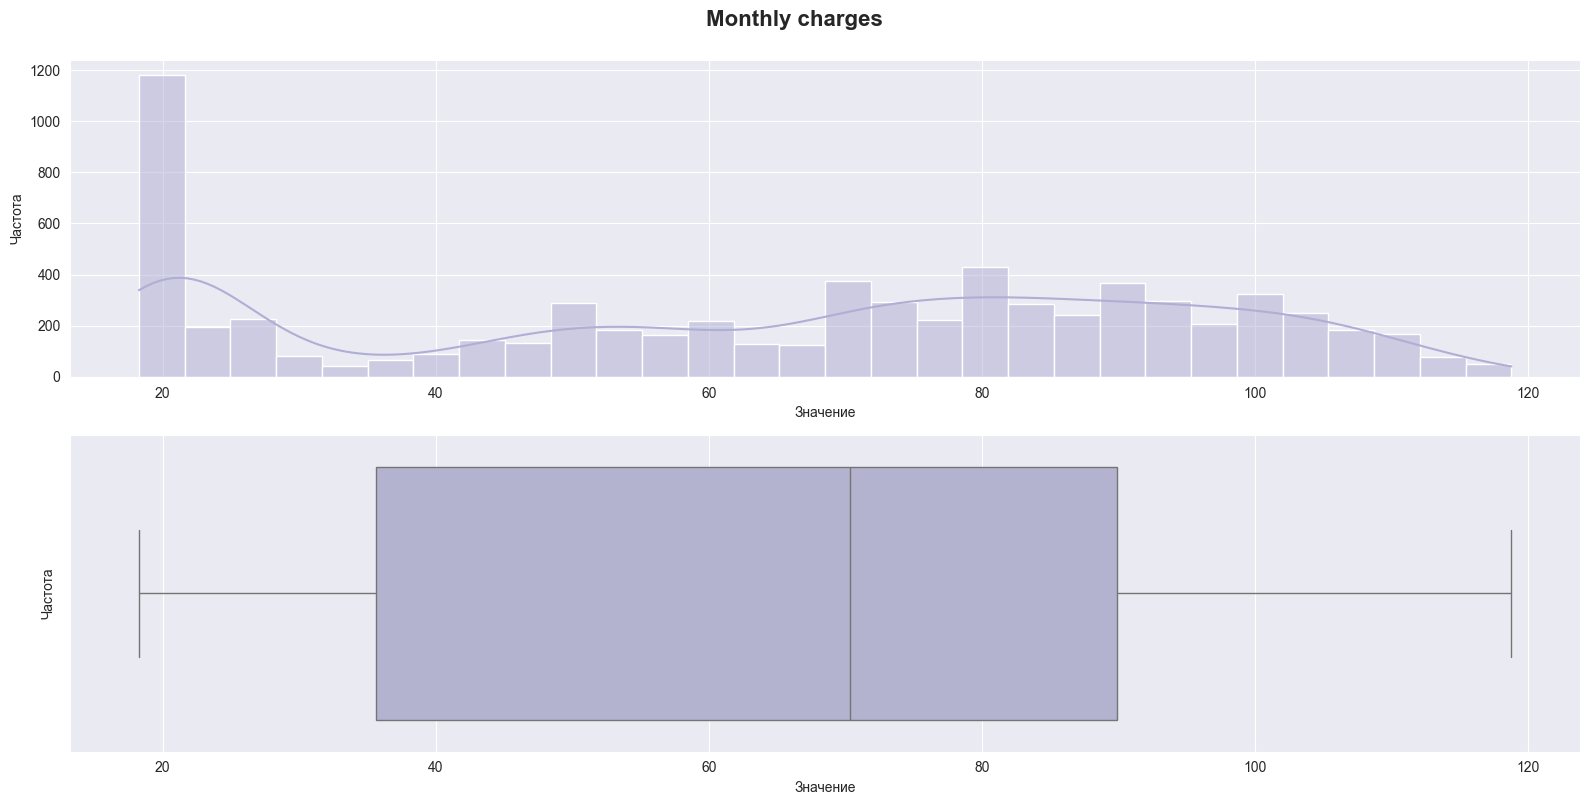

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7032.0000,64.8000,30.0900,18.2500,35.5900,70.3500,89.8600,118.7500


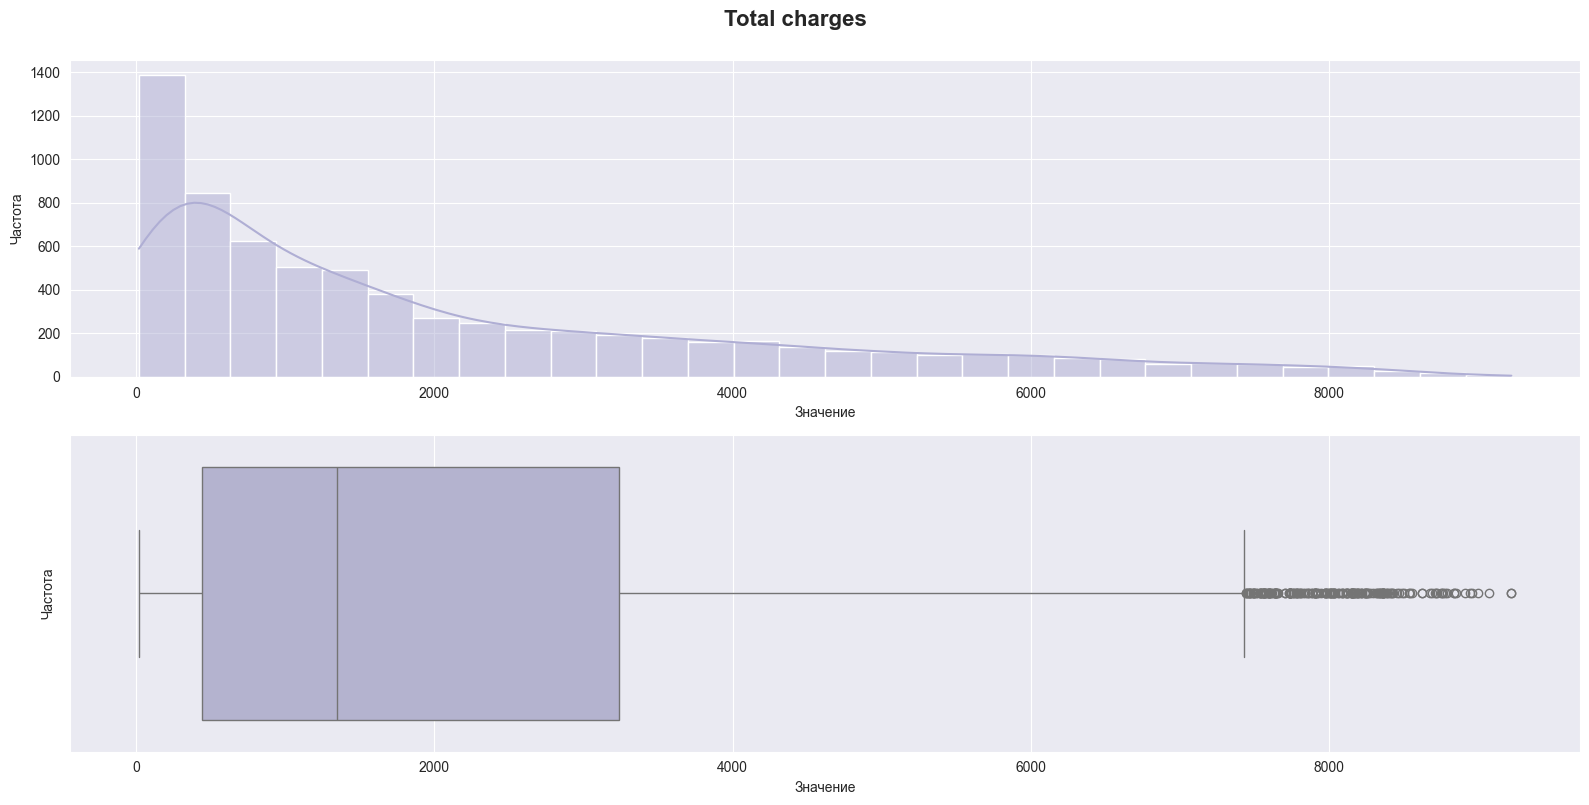

,count,mean,std,min,25%,50%,75%,max
total_charges,7032.0000,2118.6200,2112.7400,19.0500,439.7400,1345.2800,3239.3200,9221.3800


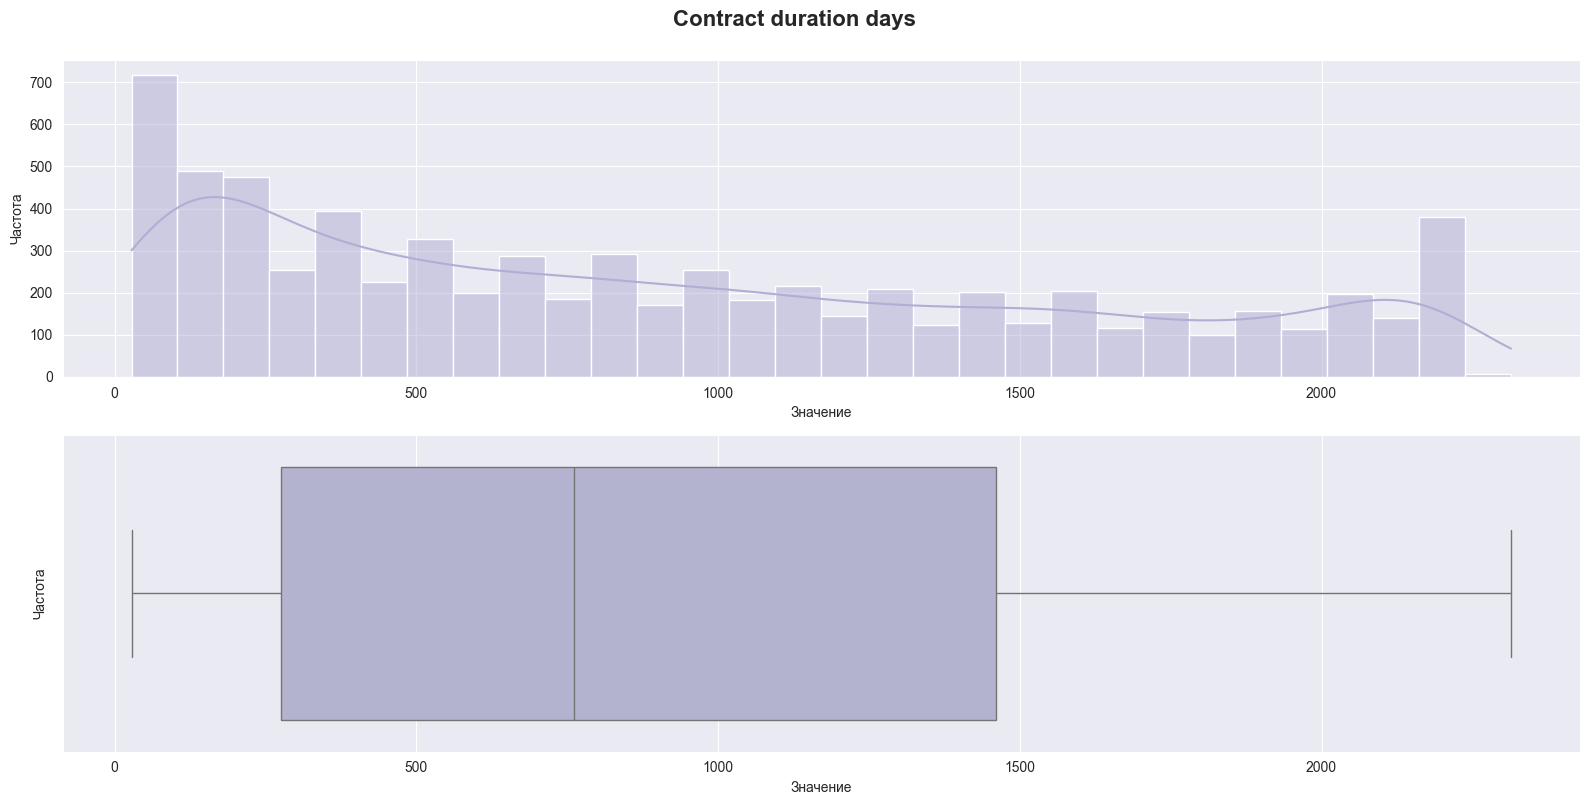

,count,mean,std,min,25%,50%,75%,max
contract_duration_days,7032.0000,899.9600,682.7400,28.0000,276.0000,761.0000,1461.0000,2314.0000


In [33]:
# Вывод графиков по численным данным
show_full_analysis_plots(df_full, analysis_type='num')

### Анализ данных: `cat`

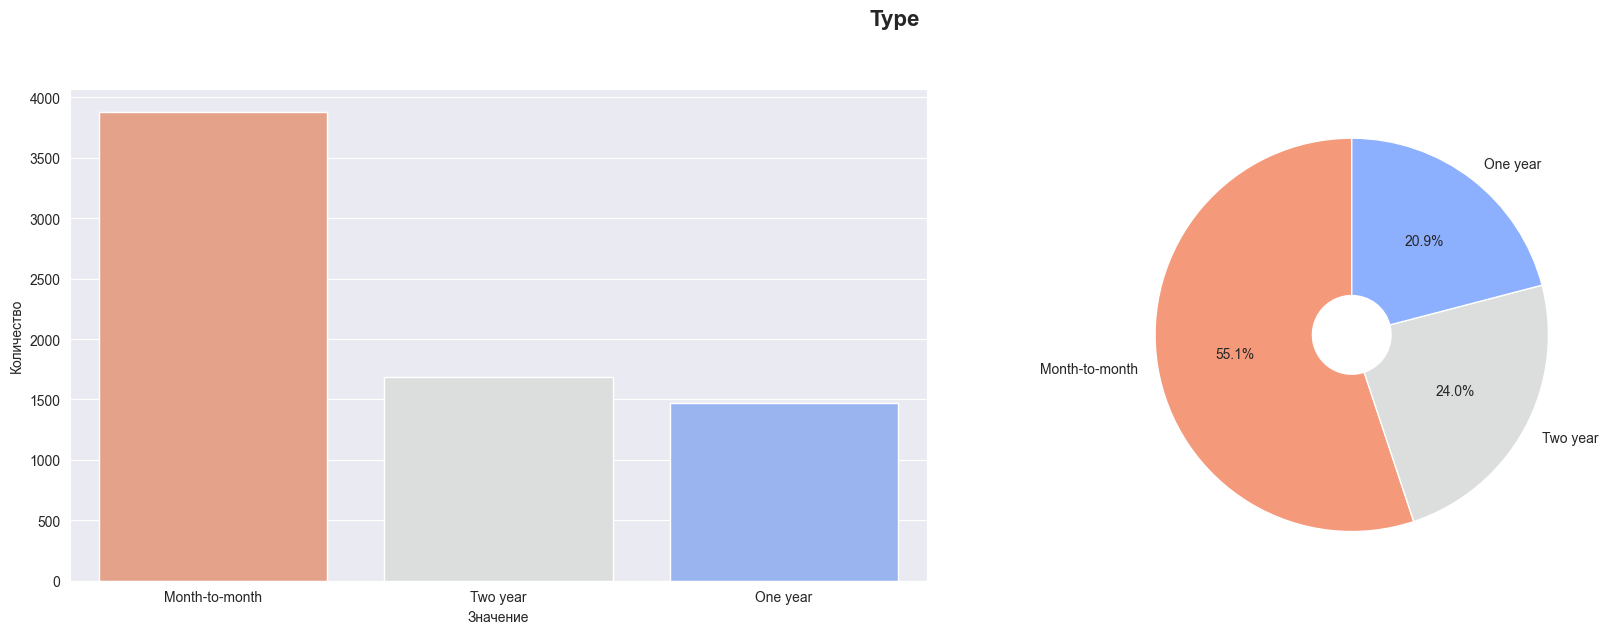

,count,unique,top,freq
type,7032,3,month-to-month,3875


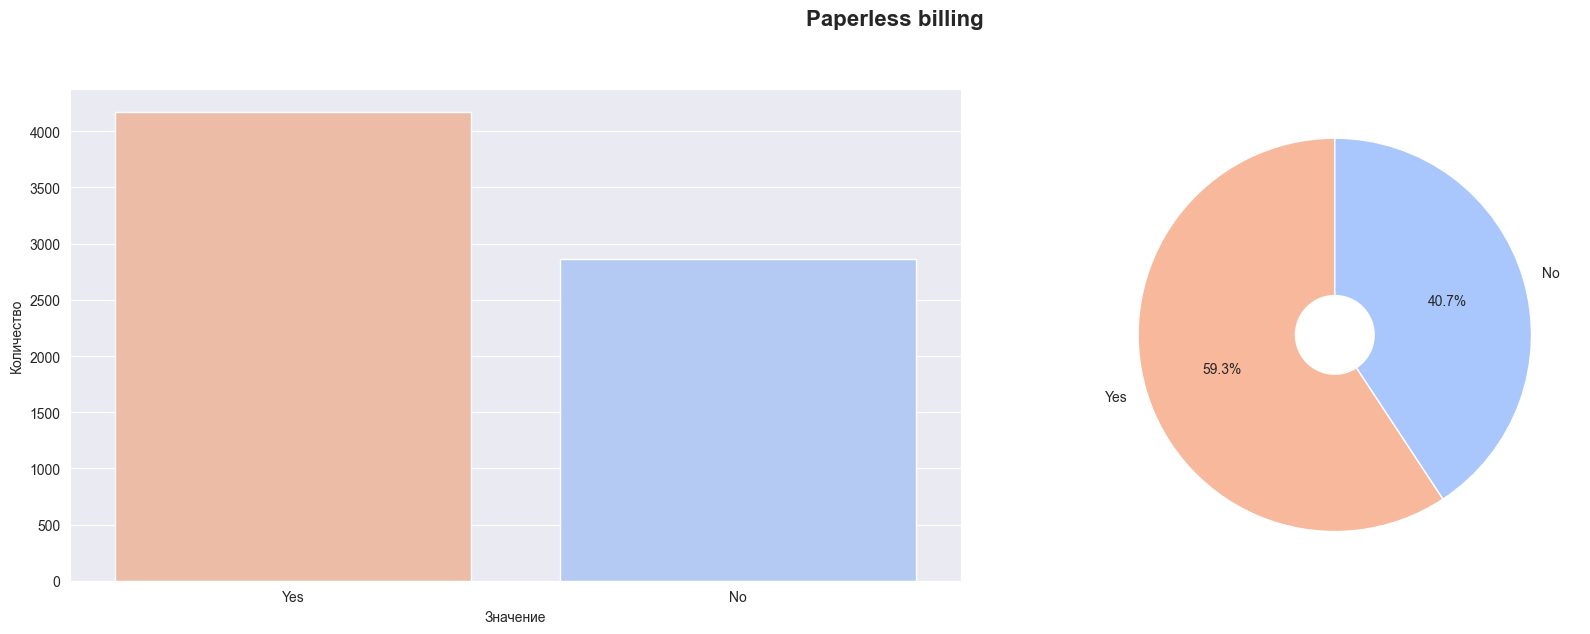

,count,unique,top,freq
paperless_billing,7032,2,yes,4168


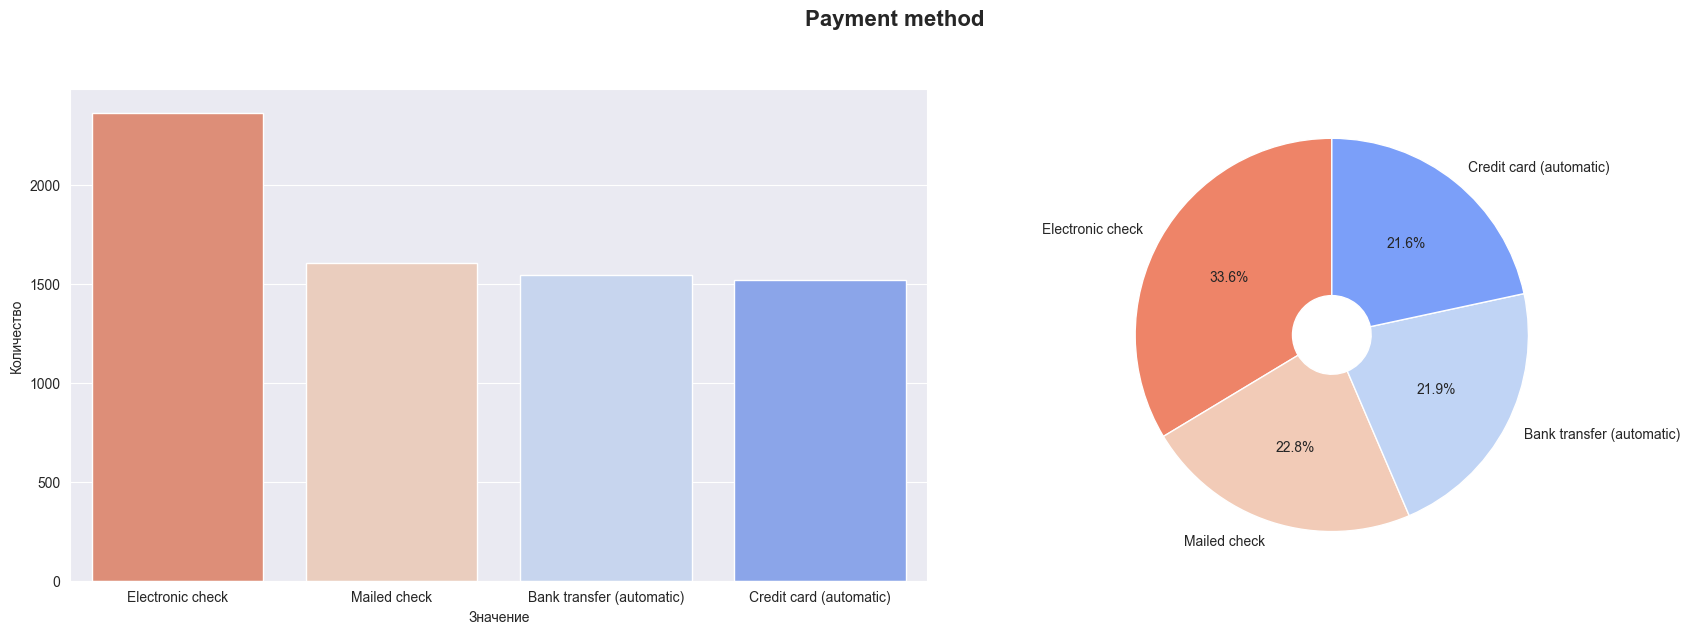

,count,unique,top,freq
payment_method,7032,4,electronic check,2365


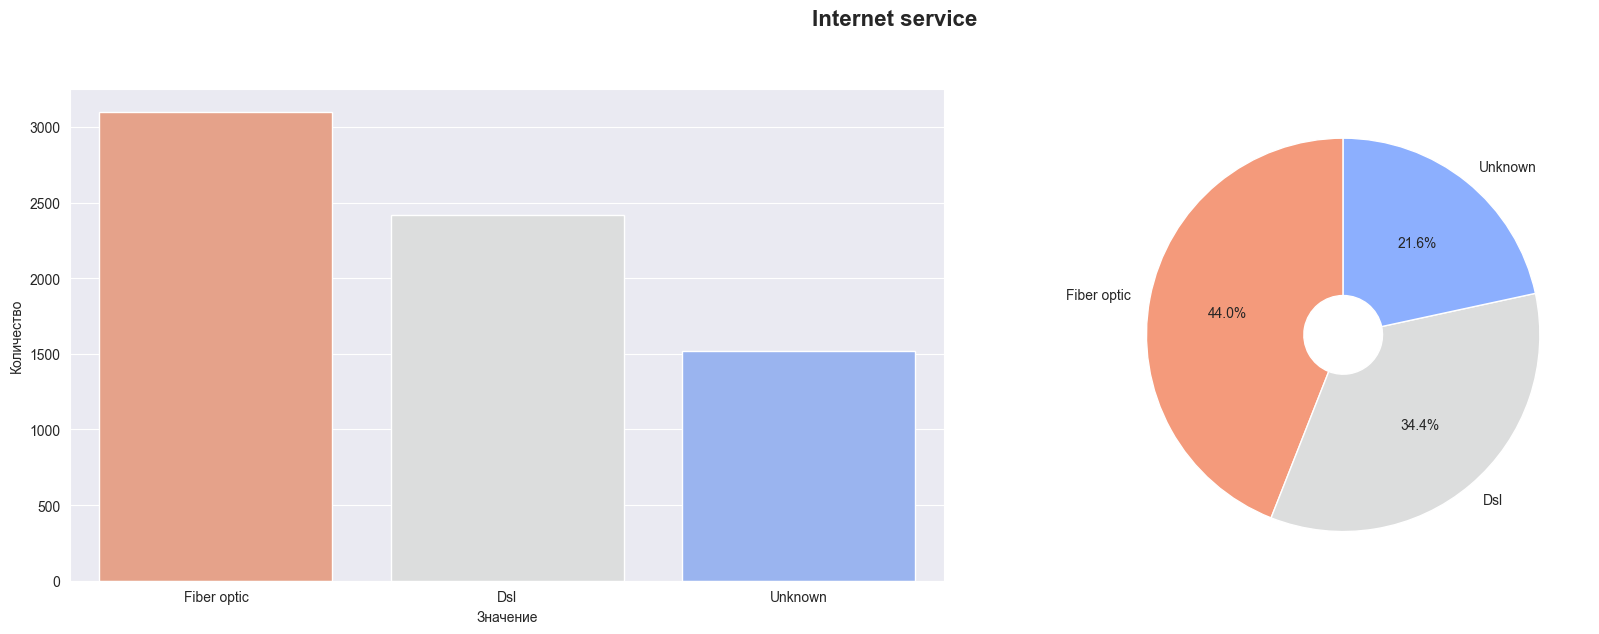

,count,unique,top,freq
internet_service,7032,3,fiber optic,3096


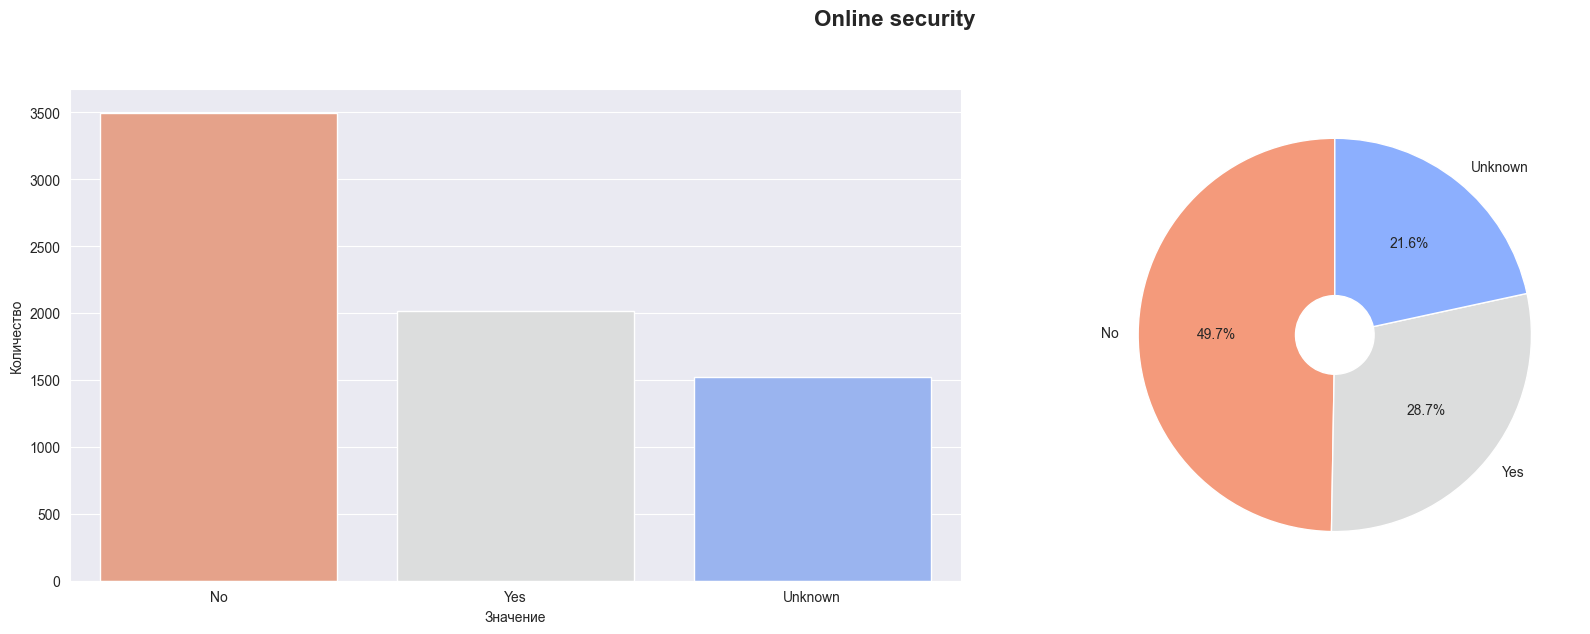

,count,unique,top,freq
online_security,7032,3,no,3497


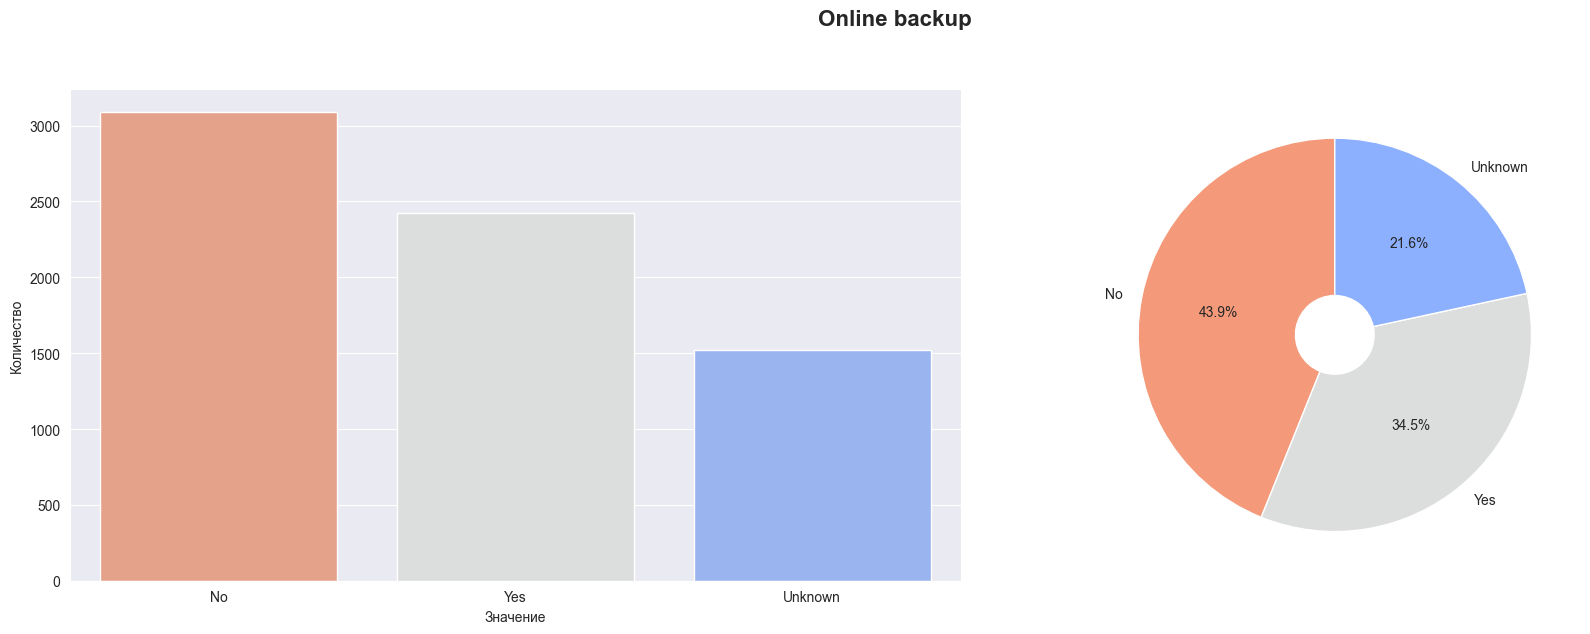

,count,unique,top,freq
online_backup,7032,3,no,3087


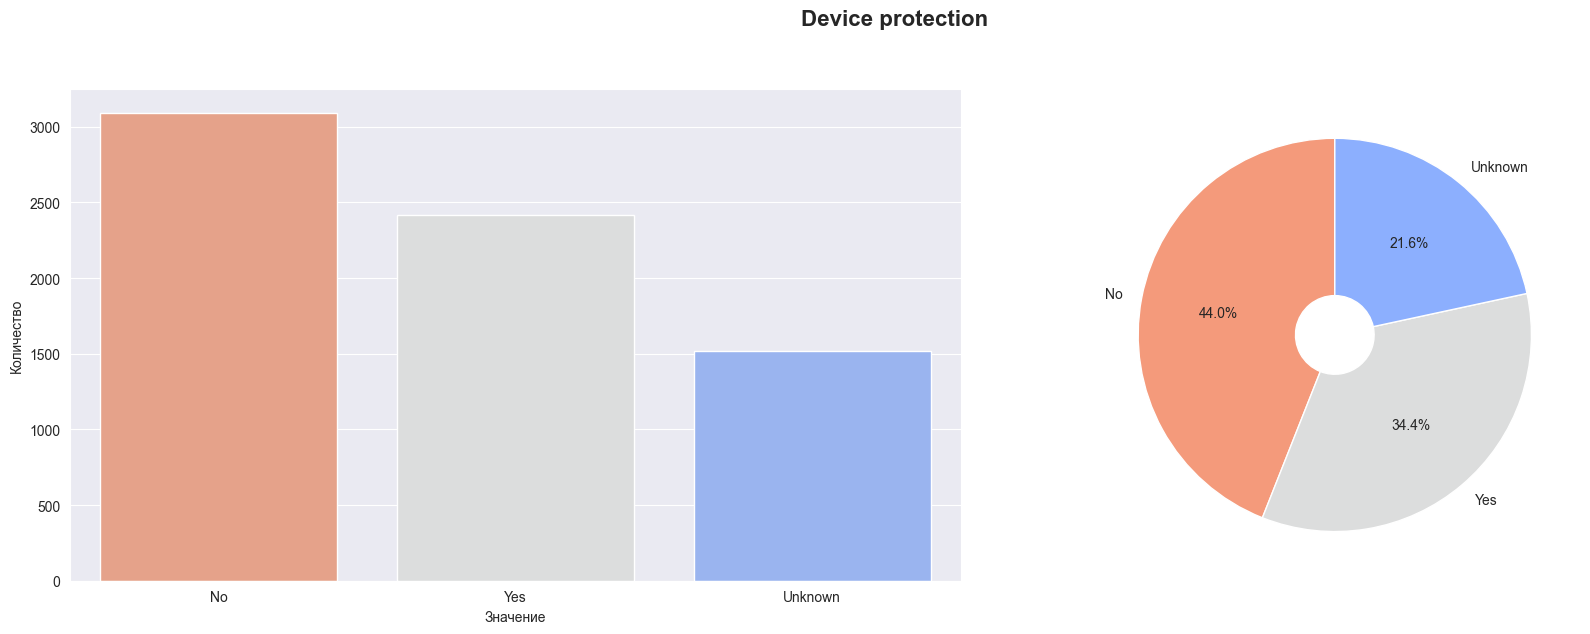

,count,unique,top,freq
device_protection,7032,3,no,3094


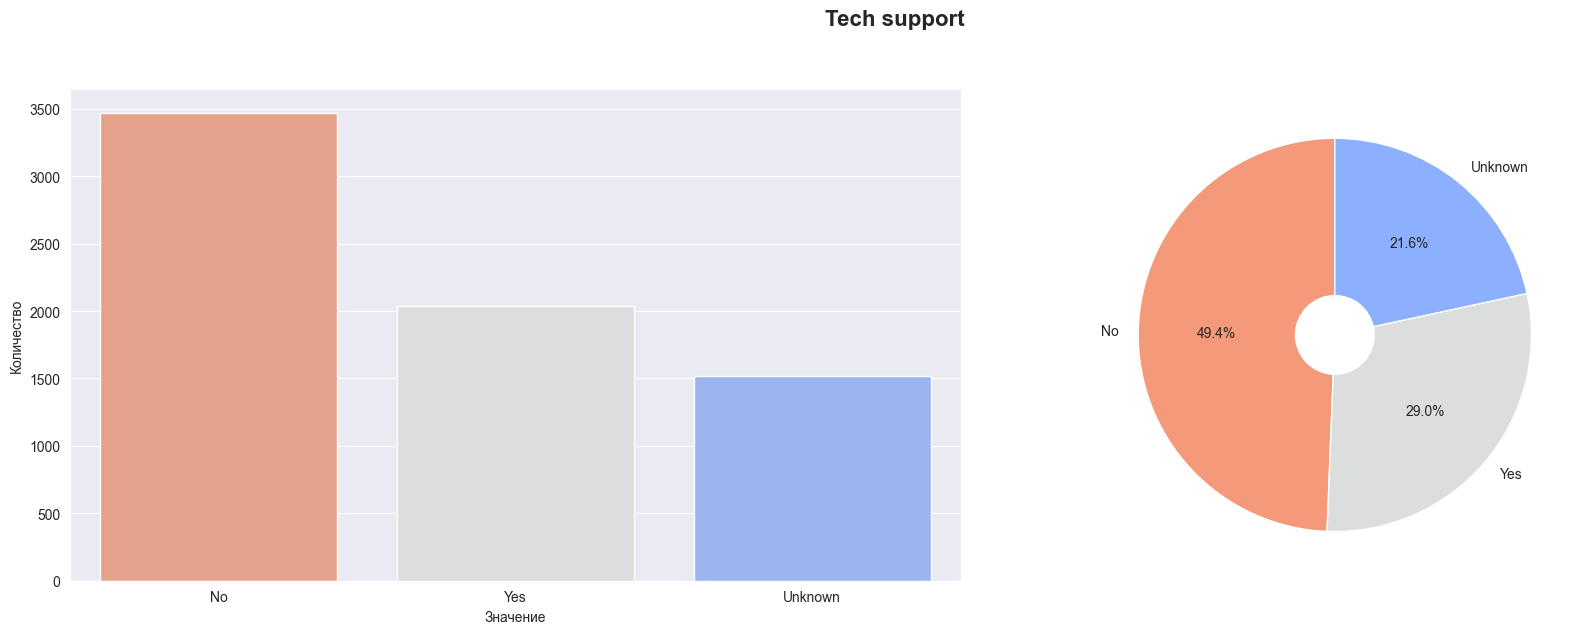

,count,unique,top,freq
tech_support,7032,3,no,3472


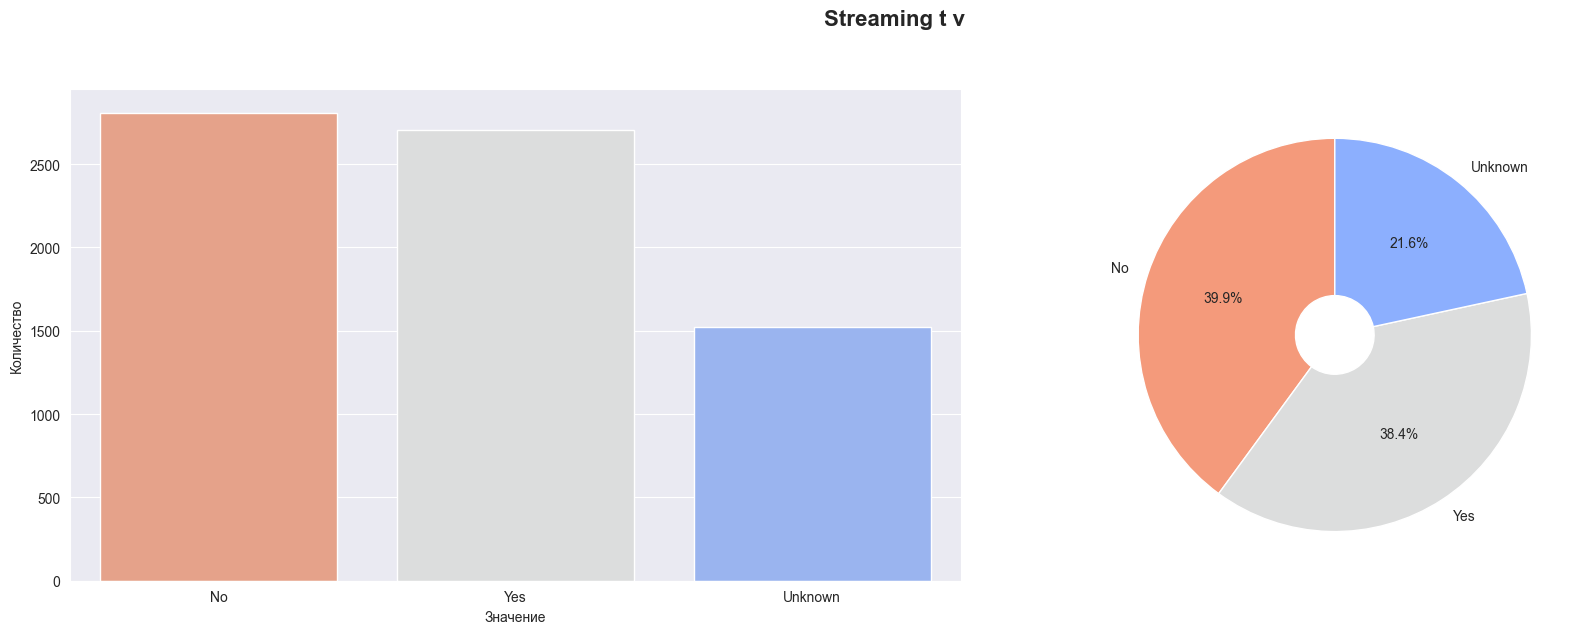

,count,unique,top,freq
streaming_t_v,7032,3,no,2809


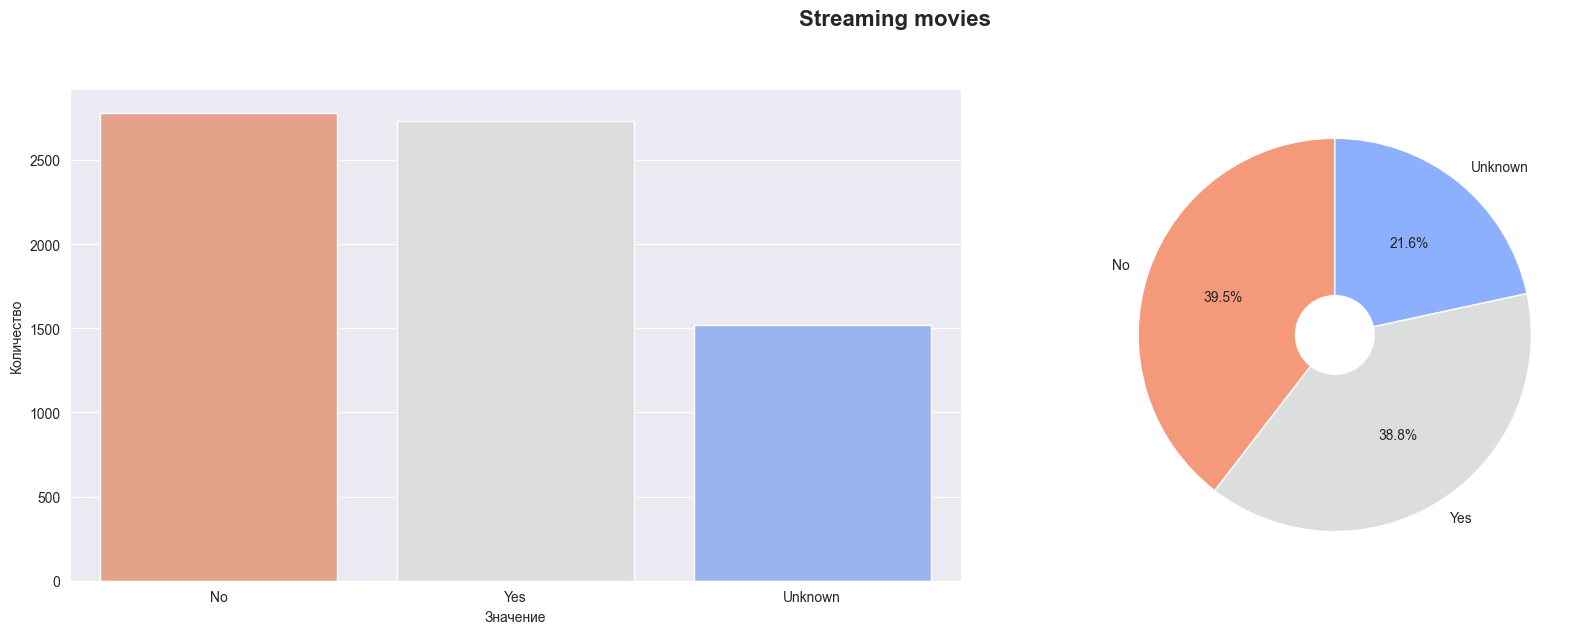

,count,unique,top,freq
streaming_movies,7032,3,no,2781


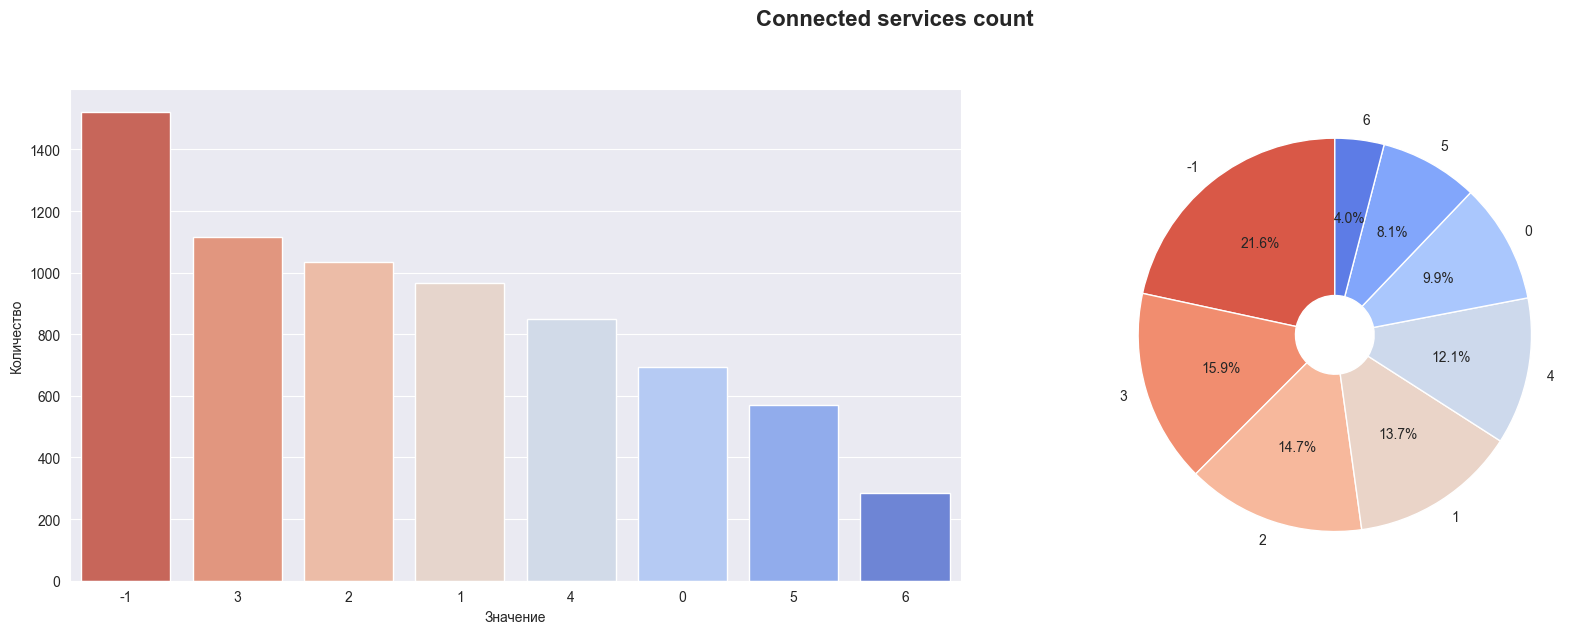

,count,unique,top,freq
connected_services_count,7032,8,-1,1520


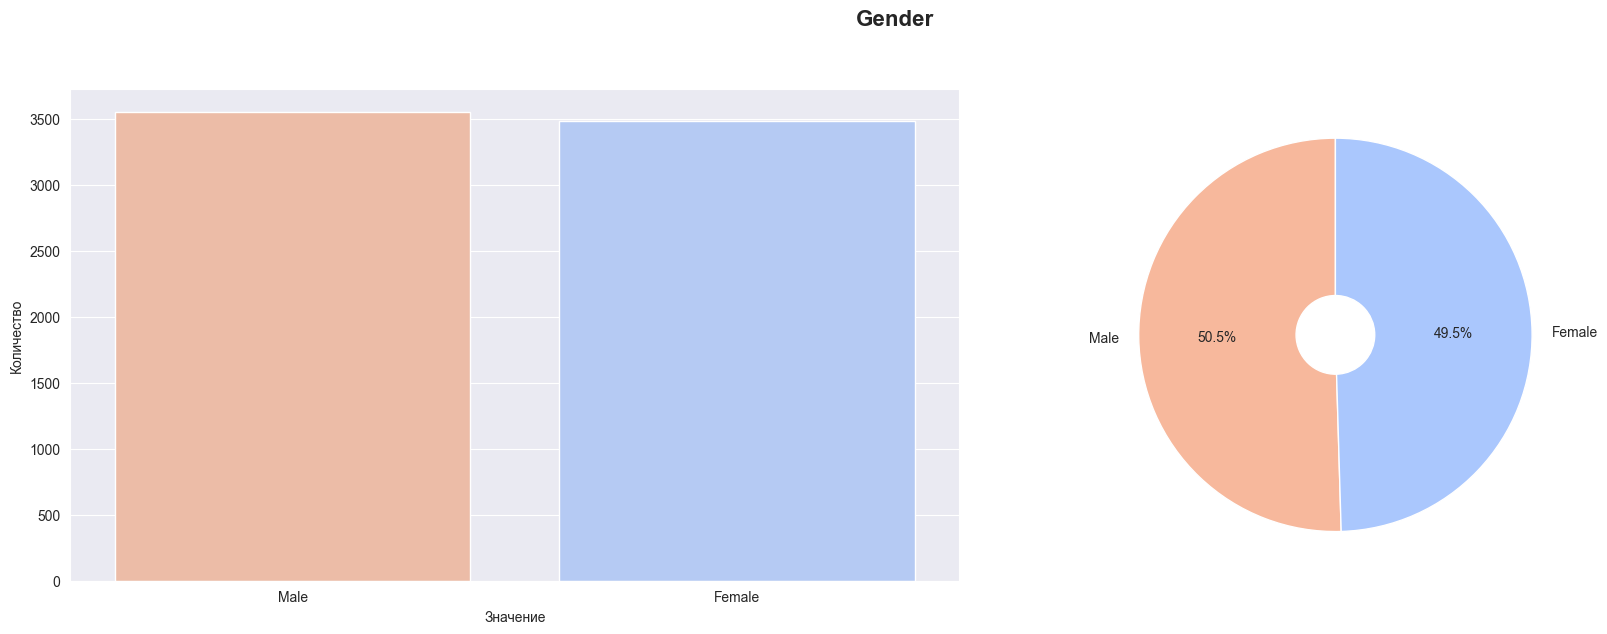

,count,unique,top,freq
gender,7032,2,male,3549


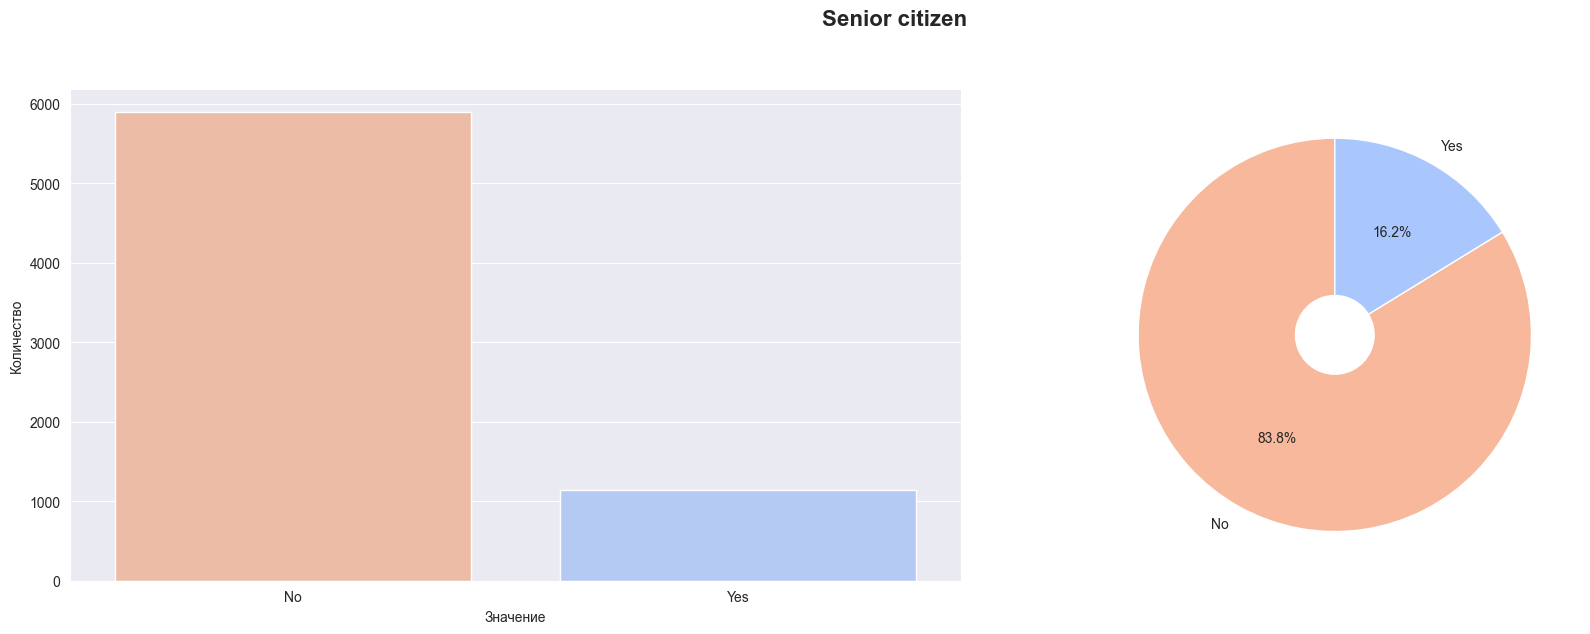

,count,unique,top,freq
senior_citizen,7032,2,no,5890


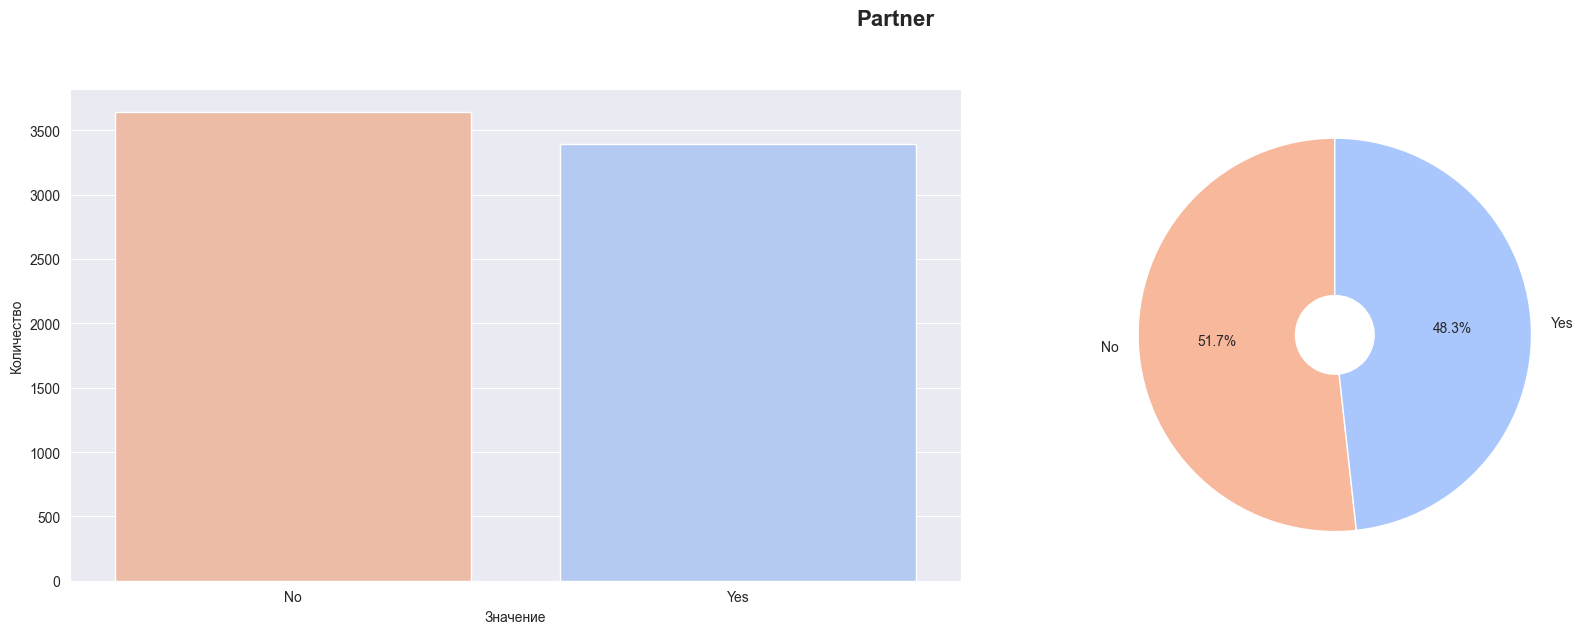

,count,unique,top,freq
partner,7032,2,no,3639


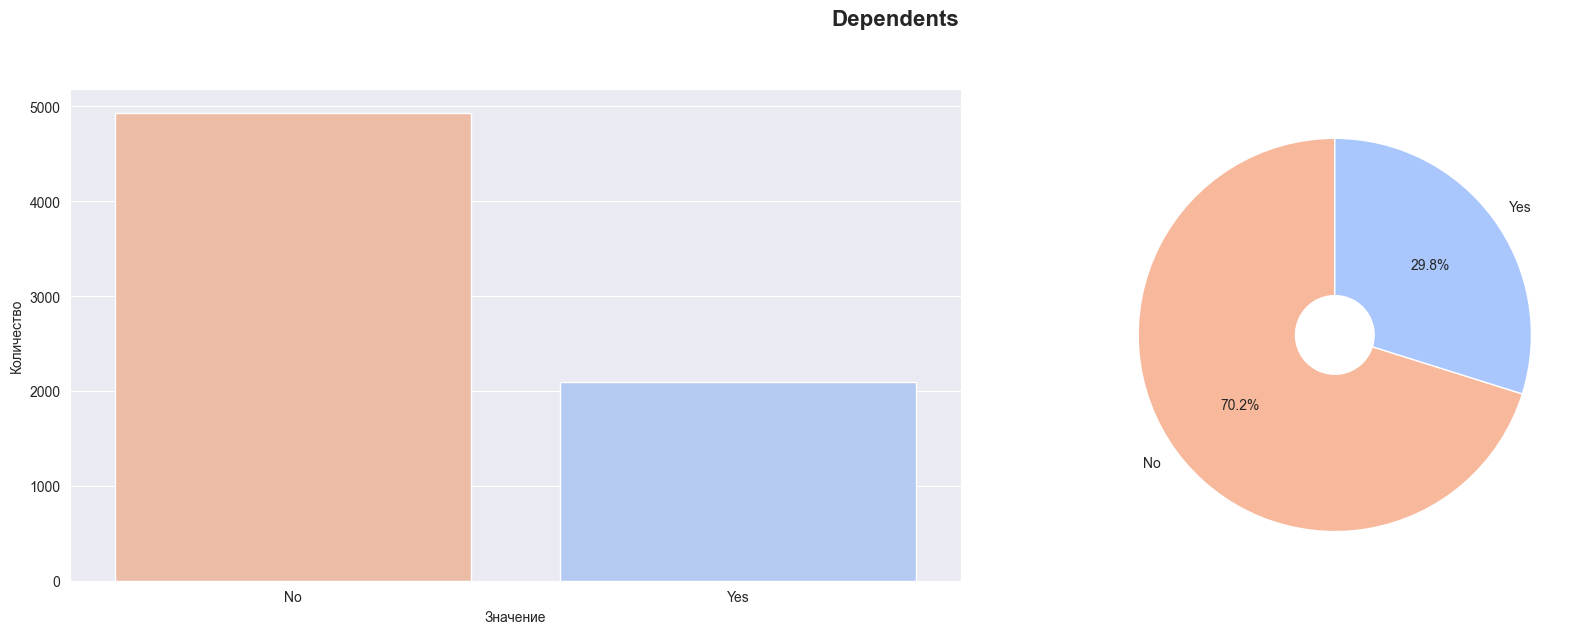

,count,unique,top,freq
dependents,7032,2,no,4933


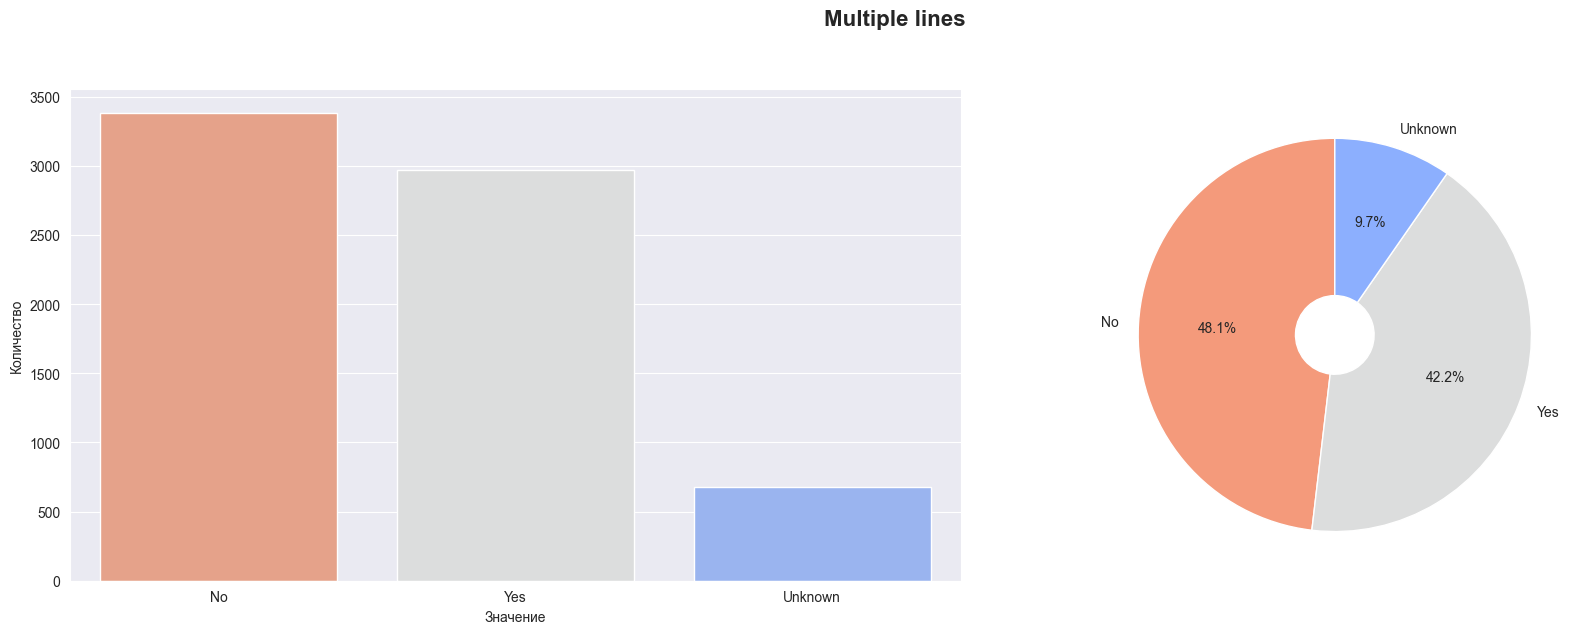

,count,unique,top,freq
multiple_lines,7032,3,no,3385


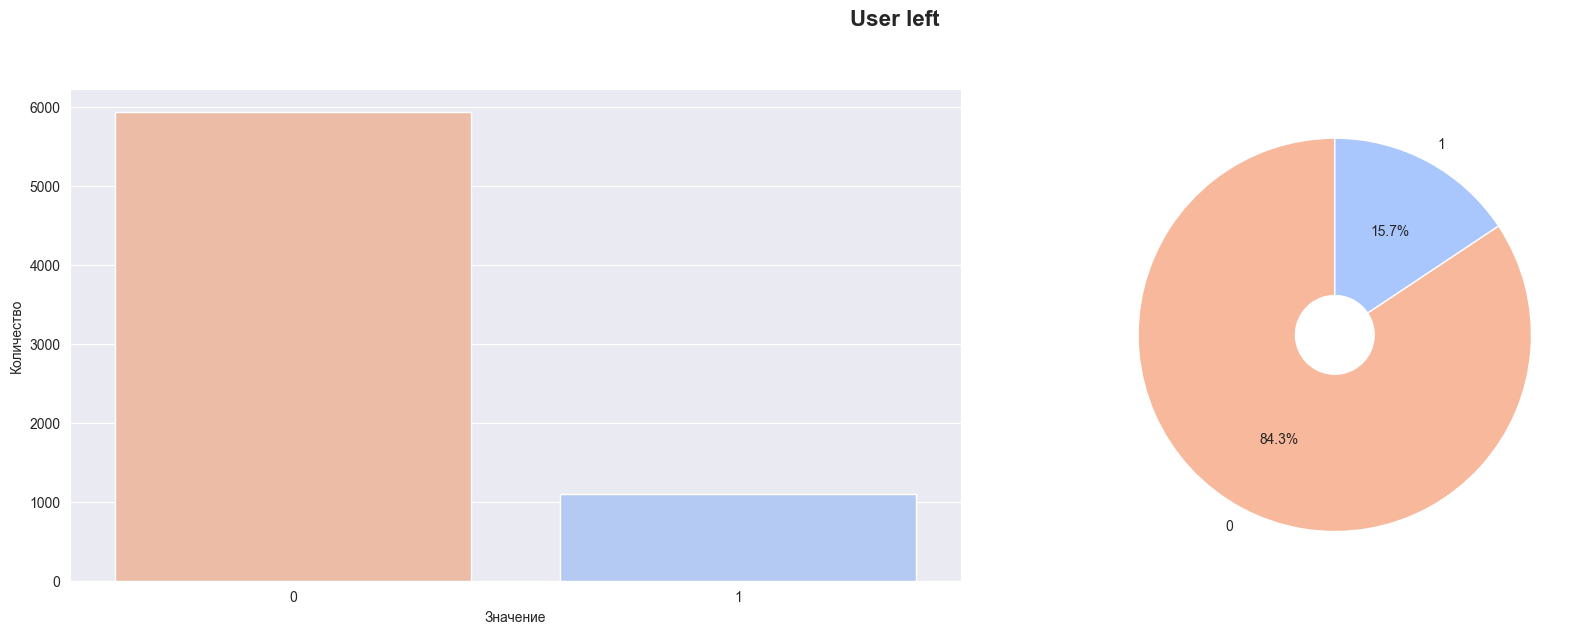

,count,unique,top,freq
user_left,7032,2,0,5931


In [34]:
# Вывод графиков по численным данным
show_full_analysis_plots(df_full, analysis_type='cat')

### Распределение классов `user_left`
___

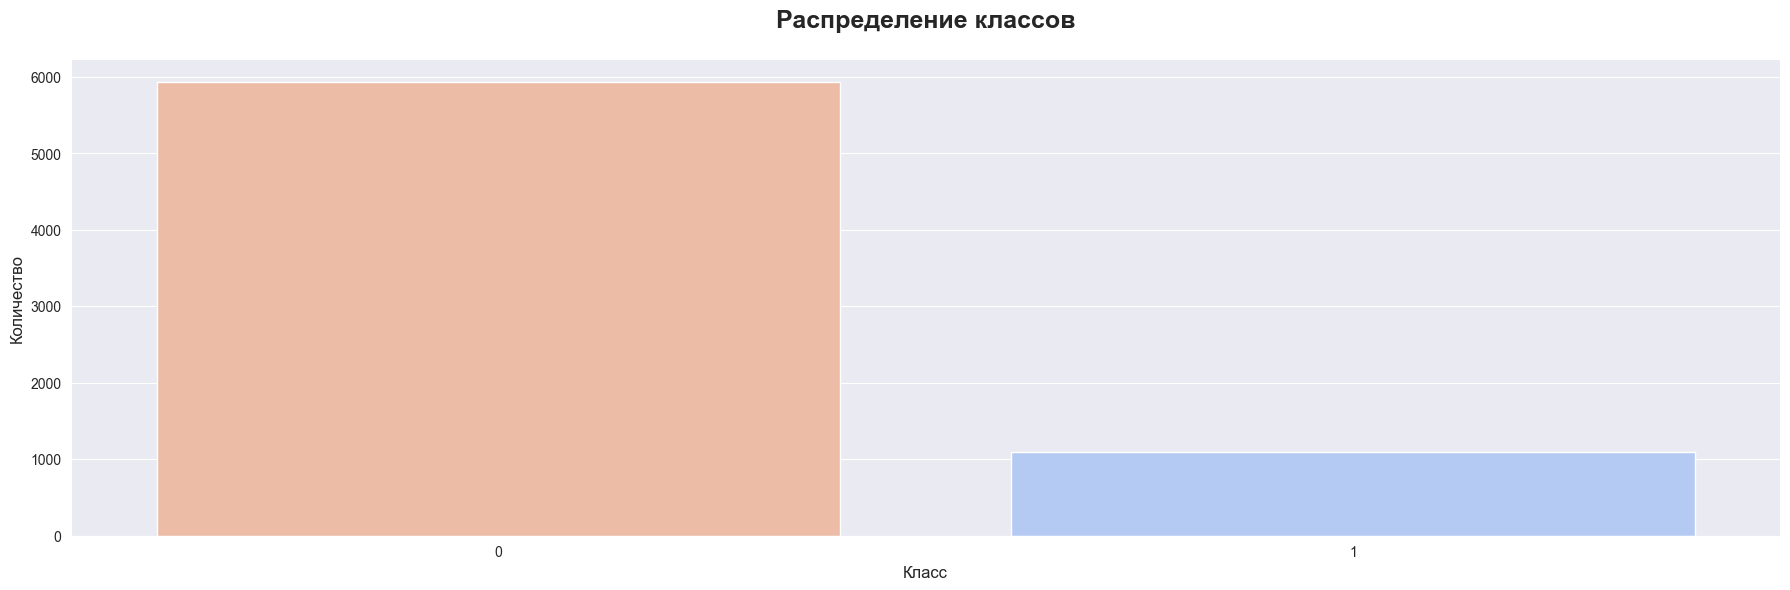

**Соотношение дисбаланса классов:** ≈5:1

,Класс,Количество,Процент
0,0,5931,84.34%
1,1,1101,15.66%


In [35]:
# Дополнительная проверка на дисбаланс классов целевого признака
show_class_distribution(df_full)

#### Промежуточные выводы
---

**Анализ численных признаков**
> - **`monthly_charges`** имеет одну явную вершину слева, что говорит о большом кол-ве пользователей с низкой ежемесячной оплатой услуг
>
>
> - **`total_charges`** явно скошен вправо, т.к. имеет аномалии в виде высоких значений суммы оплат в тотале, но большинство наблюдений имеет малые значения. Выбросы стоит оставить, т.к. они имеют важное значение и показывают, сколько в общем пользователь заплатил за услуги за все время
>
>
> - **`contract_duration_days`** имеет две явные вершины слева и справа, что говорит как о пользователях с длительным договором обслуживания, так и совершенноновых пользователях
---
**Анализ категориальных признаков**
> - **`type`** имеет явный перевес в сторону типа платежа **`month-to-month - 55.1%`, что говорит о предпочтении ежемесячных платежов по отношению к остальным**
>
>
> - **`paperless_billing`** показывает, что **`59.3%` пользователей получают электронные расчетные листки**
>
>
> - **`payment_method`** показывает, что **наибольшее число пользователей пользуется электронным методом платежа `electronic check - 33.6%`**, остальные методы имеют практически равное распределение - **`≈22%`**
>
>
> - **`internet_sevice`** показывает, что **`44% пользователей`** имеют подключение к интернету типа **`fiber-optic`**, при этом **`34.4% - dsl`**, а тип **`unknown` может говорить об отсутствии подключения к интернету у `21.6%` пользователей**
>
>
> - Признаки **`online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies`** имеют практически идентичное распределение в данных, поэтому разумнее будет ориентироваться на общее колиество подключенных сервисов
>
>
> - **`connected_services_count`** отнес наибольшее число пользователей к категории **`-1`** (вероятно, подключение отсутствует вовсе или данные были не внесены), но в целом **наибольшее число пользователей имеет 3 подключенных сервиса, а каждый пользователь имеет от 1 до 4 подключенных сервисов в принципе**
>
>
> - **`gender`** имеет практически равное распределение - **`по 50% мужчин и женщин`**
>
>
> - **`senior_citizen`** показывает, что всего **`18.2%` являются людьми пенсионного возраста**
>
>
> - **`partner`** показывает, что **наличие партнера или его отсутствие практически равнозначны  - `≈50%`**
>
>
> - **`dependents`** показывает, что у **`всего у 29.8% пользователей есть дети`**
>
>
> - **`multiple_lines`**  показывает, что пользователи в большинстве случаев не подключены к нескольким телефонным линиям (**`48.1% против 42.2%`**). Также имеются признаки **`unknown`, что может говорить об отсутствии информации или плохом сборе данных**
>
>
> - **`user_left`** показывает явный **дисбаланс в сторону активных польователей против ушедших - `84.3%` и `15.7%` соответственно** или **`соотношение ≈5:1`**

### Анализ распределения данных

In [36]:
# Формирование выборок по активности пользователя для анализа
active_user = df_full.query('user_left == 0')
left_user = df_full.query('user_left == 1')

df_combined = pd.concat([
    active_user.assign(dataset='active'),
    left_user.assign(dataset='left')
])

# Вывод 5 случайных строк
df_combined.sample(5).T

uid,2878-RMWXY,0230-UBYPQ,9891-NQDBD,7883-ROJOC,0867-LDTTC
type,two year,one year,one year,month-to-month,month-to-month
paperless_billing,yes,no,no,no,no
payment_method,credit card (automatic),bank transfer (automatic),mailed check,mailed check,bank transfer (automatic)
monthly_charges,102.6500,36.1000,25.5500,44.9000,75.1500
total_charges,5029.8500,2410.7600,715.4000,853.1000,390.7800
internet_service,fiber optic,dsl,unknown,dsl,dsl
online_security,yes,yes,unknown,no,no
online_backup,yes,no,unknown,no,no
device_protection,yes,no,unknown,no,yes
tech_support,no,yes,unknown,no,yes


### Распределение данных 
___

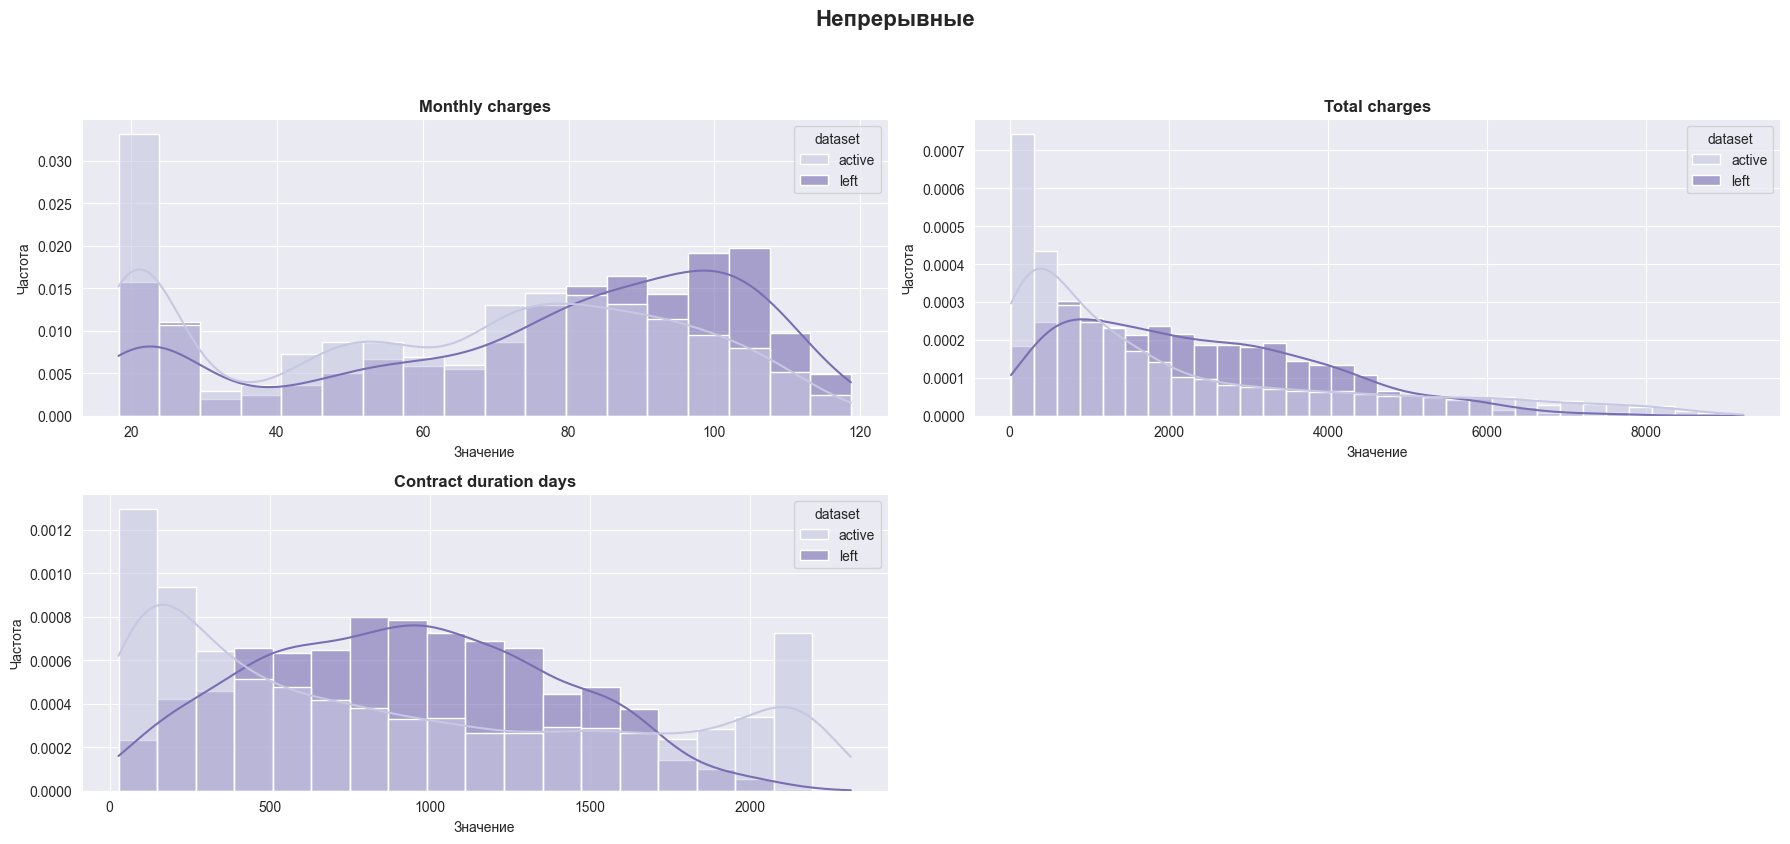

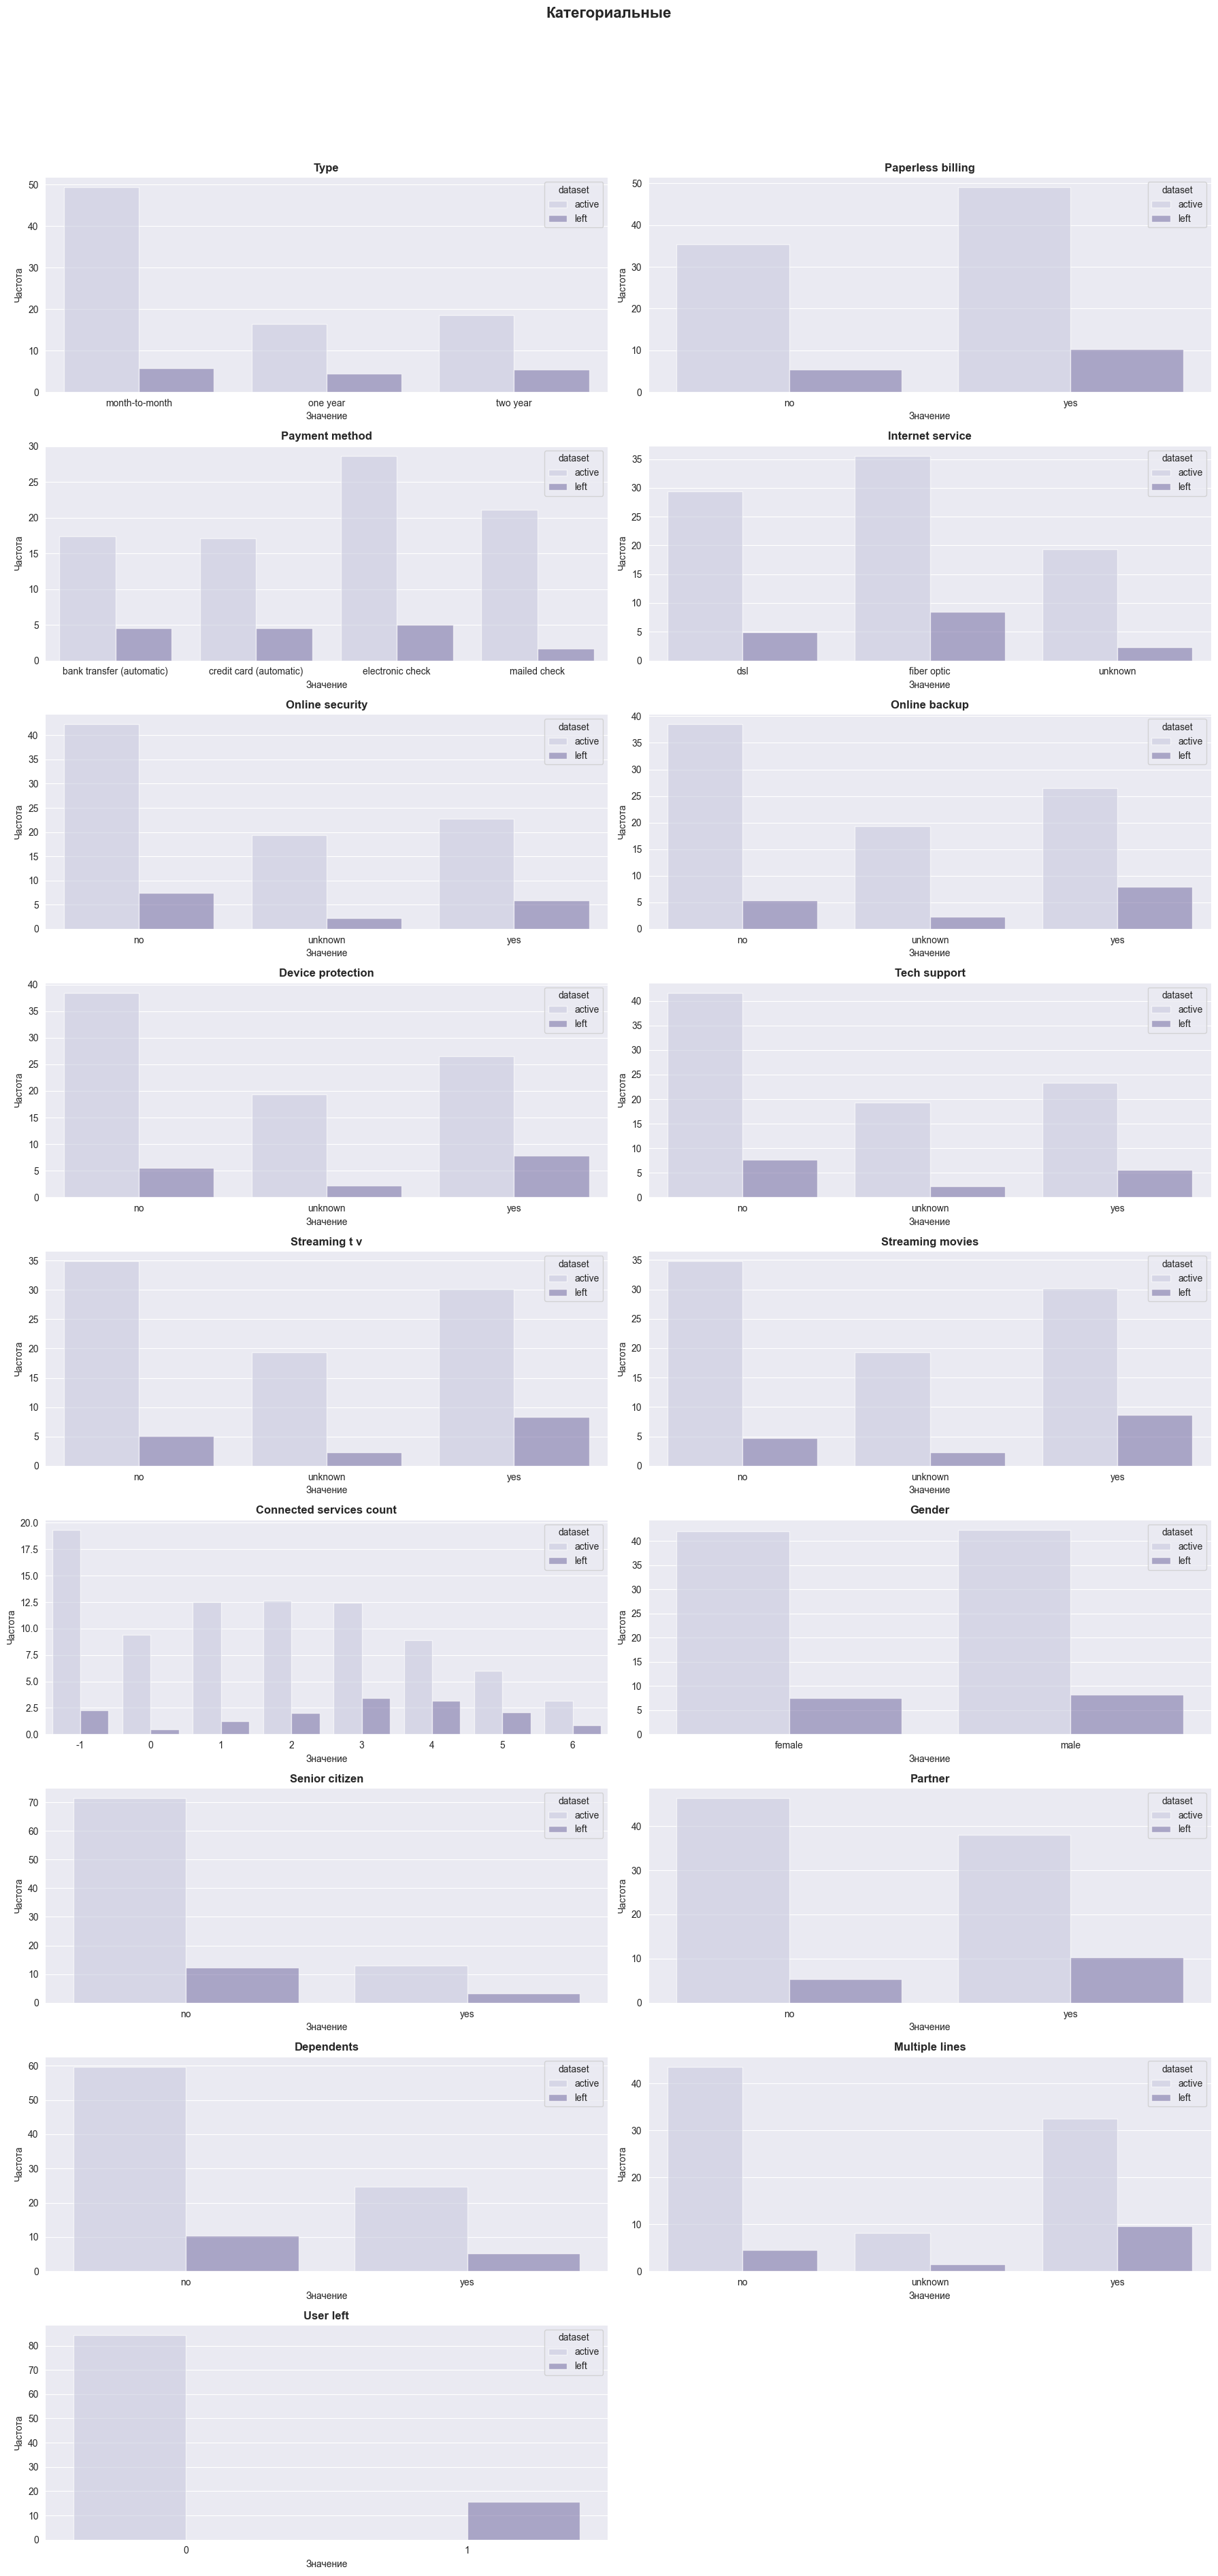

In [37]:
# Анализ распределения с настройками плотности
discrete_features = df_full.select_dtypes('category').columns

show_compared_histplots(
    df_combined,
    active_user.columns,
    discrete_features
)

#### Промежуточные выводы
---
**Распределение непрерывных величин (нормализованные)**
> - **`monthly_charges`** показывает наибольшее число активных пользователей, которые платят в месяц меньше. При этом активные пользователи превышают ушедших в несколько раз
>
>
> - **`total_charges`** скошены вправо у обоих групп. Обе группы пользователей почти одинаково в тотале приносят малые доходы. При этом активные пользователи по тоталу превышают ушедших в несколько раз.
>
>
> - **`contract_duration_days`** показывают скошенность у активных пользователей вправо, хоть и наблюдается еще одна вершиа в самом конце, что логично говорит о большем количестве новых пользователей и некотором остатке "старичков". У ушедших пользователей график распределение стремится конрмальному
---

**Распределение категорий**
> - **`type`** показывает, что активные пользоваетли предпочитают больше помесячную оплату, в то время как ушедшие почти одинаково пользовались каждым из них
>
> - **`paperless_billing`** показывает, что обе группы  предпочитали получать электронные расчетные листки
>
>
> - **`payment_method`** показывает, что активные пользователи отдают наибольшее предпочтение электронным платежам, далее идет тип платежа через мейл. Последними идут автоматические платежи кредитной картой и через банк. При этом ушедшие пользователи меньше вего отдавали предпочтение платежам через мейл, а остальными пользовались в равной степени 
>
>
> - **`internet_sevice`** показывает, то обе группы чаще подключали интернет посредством оптического кабеля
>
>
> - Признаки **`online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies`** показывают равное распределение по всем типам подписок - в большей степени пользователи не подключали сервисы, нежели подключали 
>
>
> - **`connected_services_count`** показывает, что у обеих групп было/есть по 1-4 подписки на сервисы, но большее число подписок не имеют вовсе
>
>
> - **`gender`** показывает идентичное распределение как по мужскому, так и по женскому поле в обеих группах
>
>
> - **`senior_citizen`** имеет так же одинаковое распределение в группах - пенсионеров среди пользователей намного меньше
>
>
> - **`partner`** показывает, что активные пользователи не имеют пары, в то время как ушедшие чаще имели пару, чем нет
>
>
> - **`dependents`** показывает, что пользователей без детей одинаково больше в обеих группах
>
>
> - **`multiple_lines`** показывает, что активные пользователи реже подключают несколько телефонных линий, в то время как ушедшие подключали их чаще

### Кореляционный анализ данных
___

### Матрица корреляции Phi_K
___

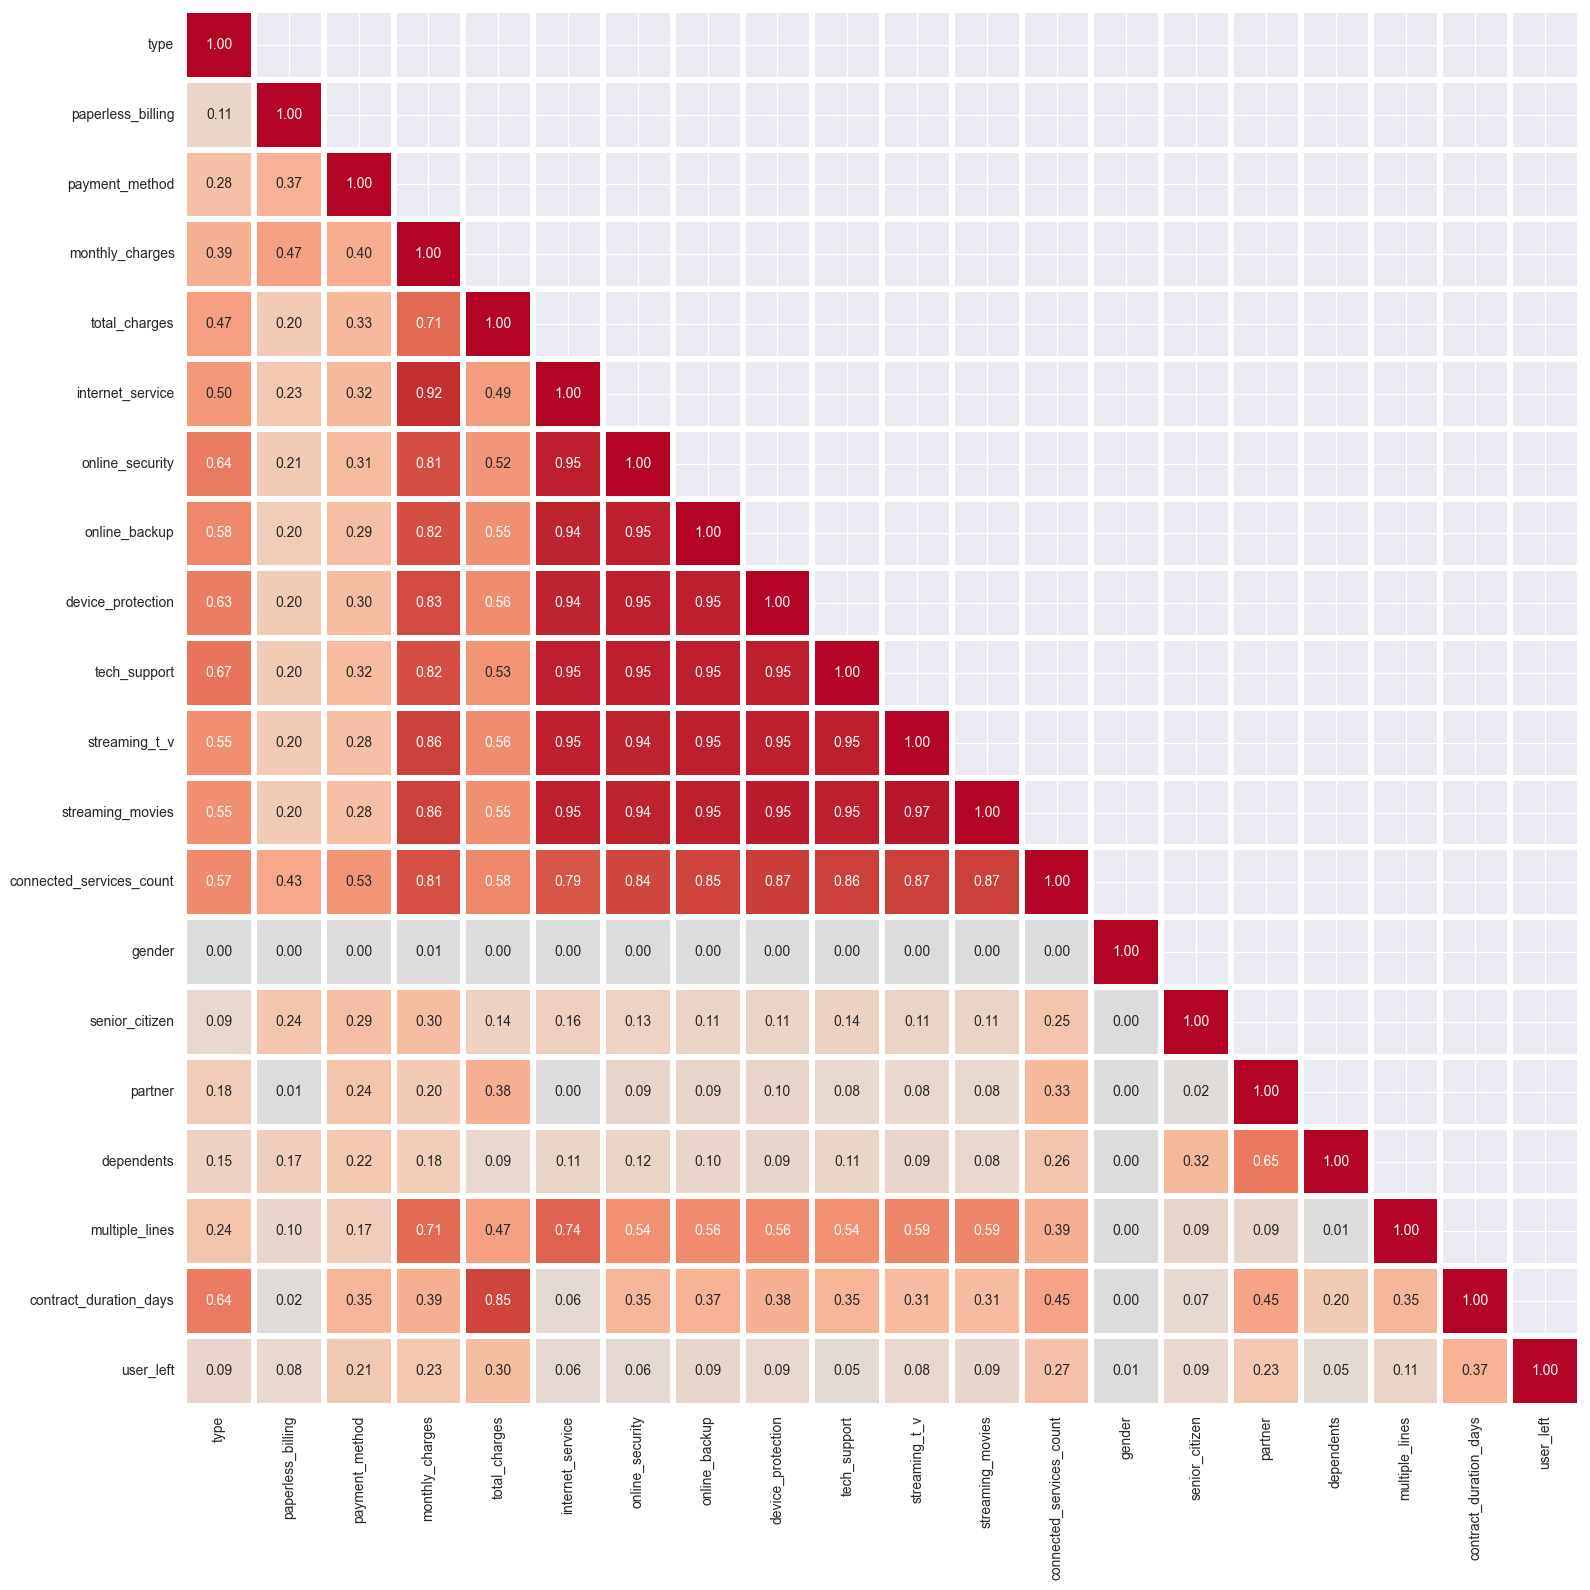

### Корреляция по признаку: `user_left`
___


,Target,Secondary,corr,lvl
0,user_left,contract_duration_days,0.3700,Умеренная
1,user_left,total_charges,0.3000,Умеренная
2,user_left,connected_services_count,0.2700,Слабая
3,user_left,monthly_charges,0.2300,Слабая
4,user_left,partner,0.2300,Слабая
5,user_left,payment_method,0.2100,Слабая
6,user_left,multiple_lines,0.1100,Слабая
7,user_left,streaming_movies,0.0900,Слабая
8,user_left,senior_citizen,0.0900,Слабая
9,user_left,type,0.0900,Слабая


In [38]:
# Построение общей матрицы корреляции
show_corr_heatmap_plot(df_full)

### Матрица корреляции Phi_K
___

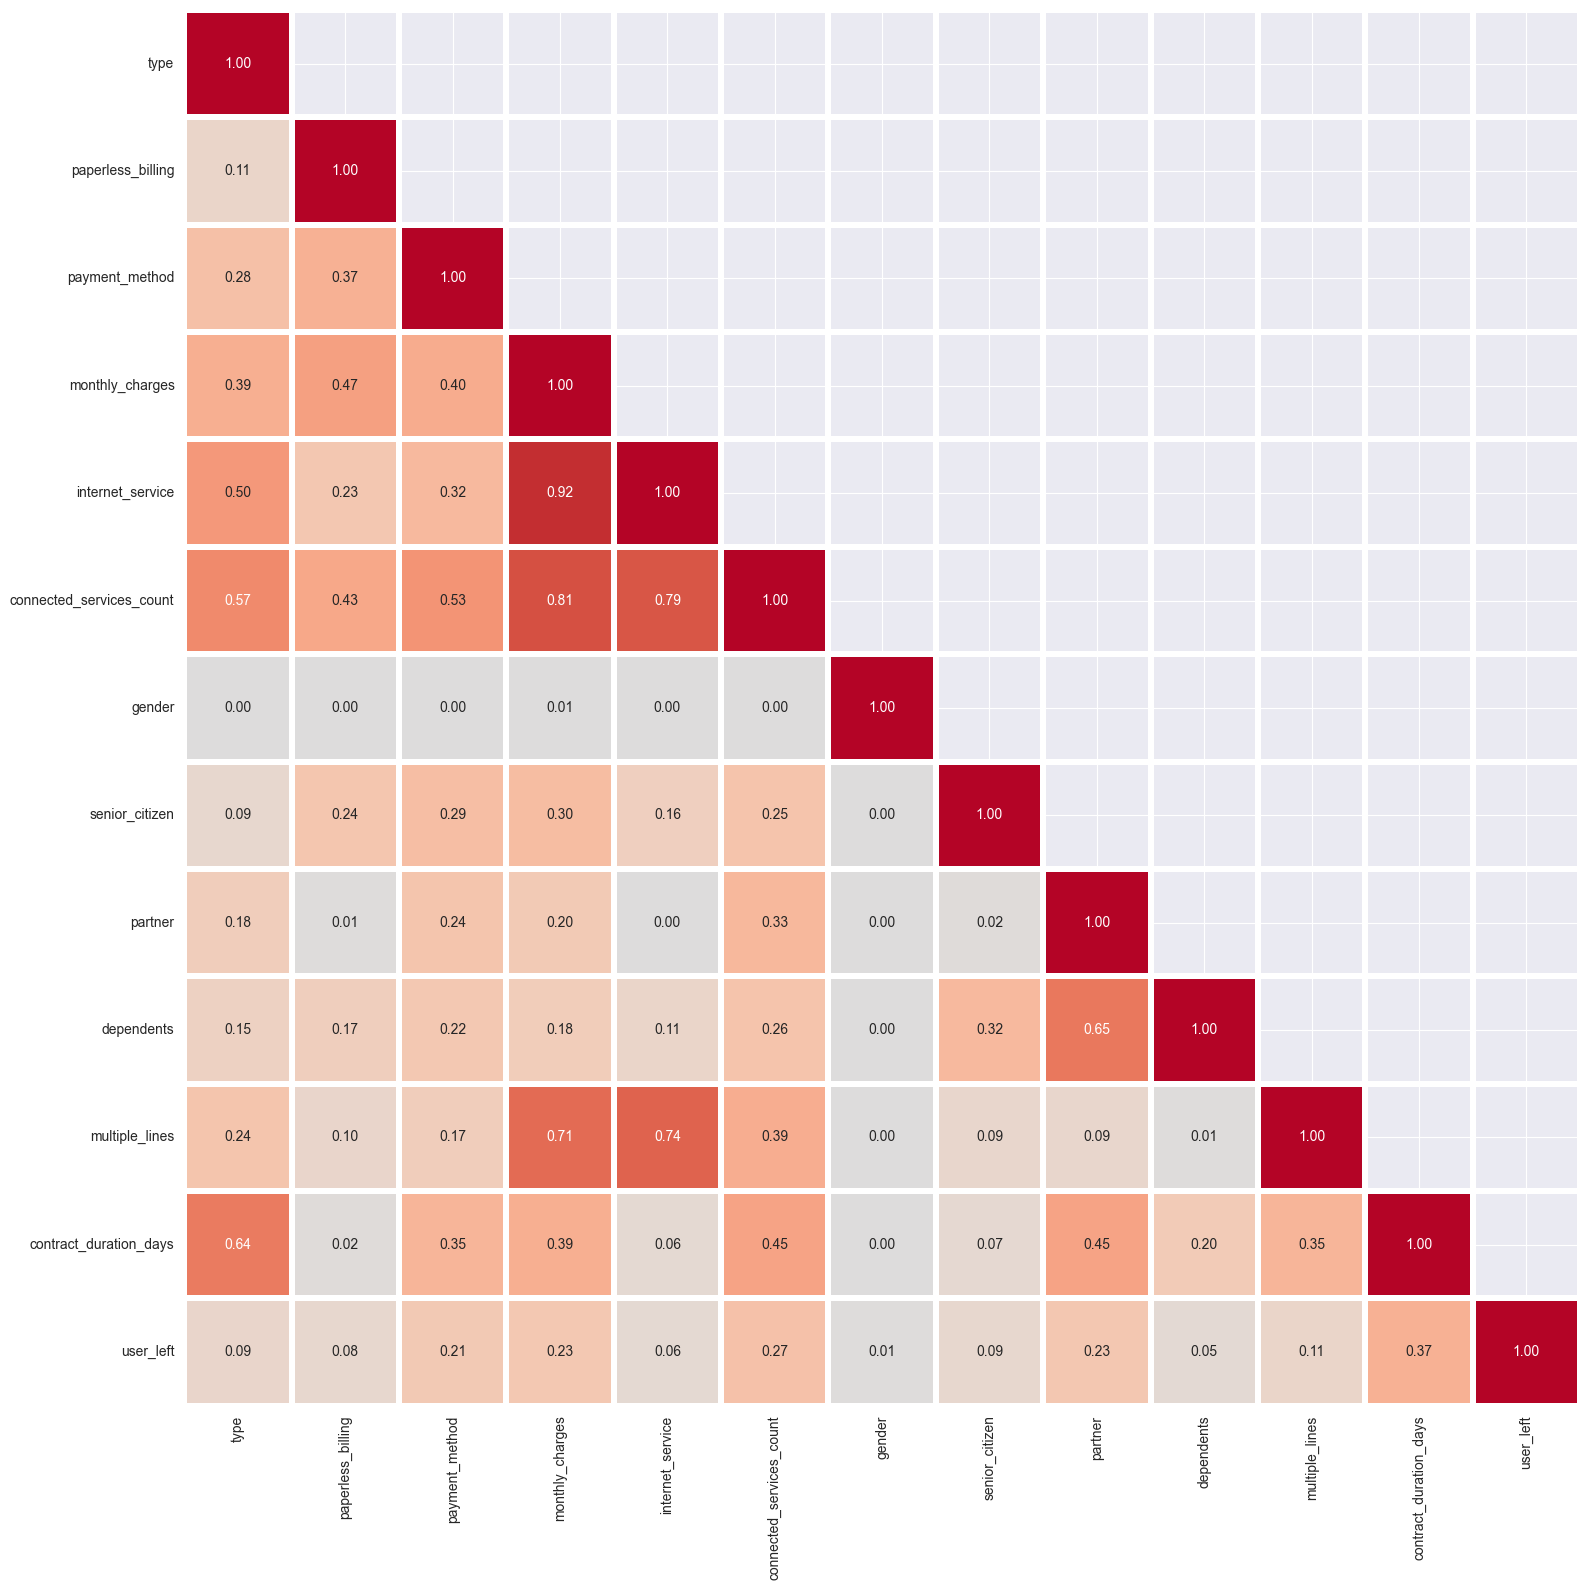

### Корреляция по признаку: `user_left`
___


,Target,Secondary,corr,lvl
0,user_left,contract_duration_days,0.3700,Умеренная
1,user_left,connected_services_count,0.2700,Слабая
2,user_left,monthly_charges,0.2300,Слабая
3,user_left,partner,0.2300,Слабая
4,user_left,payment_method,0.2100,Слабая
5,user_left,multiple_lines,0.1100,Слабая
6,user_left,type,0.0900,Слабая
7,user_left,senior_citizen,0.0900,Слабая
8,user_left,paperless_billing,0.0800,Слабая
9,user_left,internet_service,0.0600,Слабая


In [39]:
# Удаление признаков, которые имеют явную мультиколлинераность:
# online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies
#
# Также можно удалить total_charges, т.к. он является производным от monthly_charges и contract_duration_days
multicoll_features = [
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_t_v',
    'streaming_movies',
    'total_charges'
]

df_final = df_full.drop(multicoll_features, axis=1).copy()

df_final.attrs['name'] = 'df_final'

# Промежуточная поверка
show_corr_heatmap_plot(df_final)

In [40]:
# Признаки с очень слабой корреляцией (<0.10) также можно удалить
noncorr_features = [
    'type',
    'senior_citizen',
    'paperless_billing',
    'internet_service',
    'dependents',
    'gender'
]

# Формирование финального датафрейма с исключением некоррелирующих признаков
df_final = df_final.drop(noncorr_features, axis=1)

# Вывод проверочной информации по датафрейму
get_short_df_info(df_final)

### Проверочные данные по датафрейму `df_final`
___


Размерность: (7032, 7)

,Тип данных,Уник. всего.,Уник. значения,NaN (кол-во.),NaN (%)
payment_method,category,4,"['electronic check', 'mailed check', 'bank transfer (automatic)', 'credit card (automatic)'] Categories (4, str): ['bank transfer (automatic)', 'credit card (automatic)', 'electronic check', 'mailed check']",0,0.0000
monthly_charges,float64,1584,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05, 39.65, 19.8, 20.15, 59.9, 59.6, 55.3, 99.35, 30.2, 90.25, 64.7, 96.35, 95.5, 66.15, 20.2, 45.25, 99.9, 69.7, 74.8, 106.35, 97.85, 49.55, 69.2, 20.75, 79.85, 76.2, 84.5, 49.25, 80.65, 79.75, 64.15, 99.1, 69.5, 74.85, 95.45, 108.45, 24.95, 107.5, 100.5, 89.9, 42.1, 54.4, 94.4, 75.3, 78.9, 79.2, 49.05, 20.4, 111.6, 24.25, 64.5, 110.5, 55.65, 54.65, 74.75, 25.9, 79.35, 50.55, 75.15, 103.8, 99.3, 62.15, 19.95, 33.75, 82.05, 74.7, 84.0, 111.05, 100.9, 78.95, 66.85, 21.05, 21.0, 98.5, 19.45, 95.0, 45.55, 110.0, 24.3, 104.15, 30.15, ...]",0,0.0000
connected_services_count,category,8,"[1, 2, 3, 0, 4, -1, 5, 6] Categories (8, int64): [-1, 0, 1, 2, 3, 4, 5, 6]",0,0.0000
partner,category,2,"['yes', 'no'] Categories (2, str): ['no', 'yes']",0,0.0000
multiple_lines,category,3,"['unknown', 'no', 'yes'] Categories (3, str): ['no', 'unknown', 'yes']",0,0.0000
contract_duration_days,int64,250,"[31, 1036, 123, 1371, 153, 337, 671, 306, 945, 882, 396, 488, 1767, 1614, 761, 670, 1584, 2163, 641, 92, 365, 1492, 1523, 2191, 610, 1706, 62, 822, 1764, 245, 1401, 1095, 427, 1948, 518, 1918, 2102, 1310, 1826, 580, 2010, 1432, 1246, 549, 1949, 1888, 914, 1279, 276, 1067, 1461, 883, 881, 792, 1157, 1581, 1280, 973, 1248, 184, 215, 1006, 853, 2041, 702, 1737, 1857, 1979, 457, 884, 1431, 485, 1034, 975, 1551, 700, 942, 1734, 1798, 730, 1340, 1216, 943, 1066, 1096, 1645, 1642, 273, 1553, 1219, 303, 1126, 1887, 2071, 426, 2040, 911, 2132, 1736, 640, ...]",0,0.0000
user_left,category,2,"[0, 1] Categories (2, int64): [0, 1]",0,0.0000


### Матрица корреляции Phi_K
___

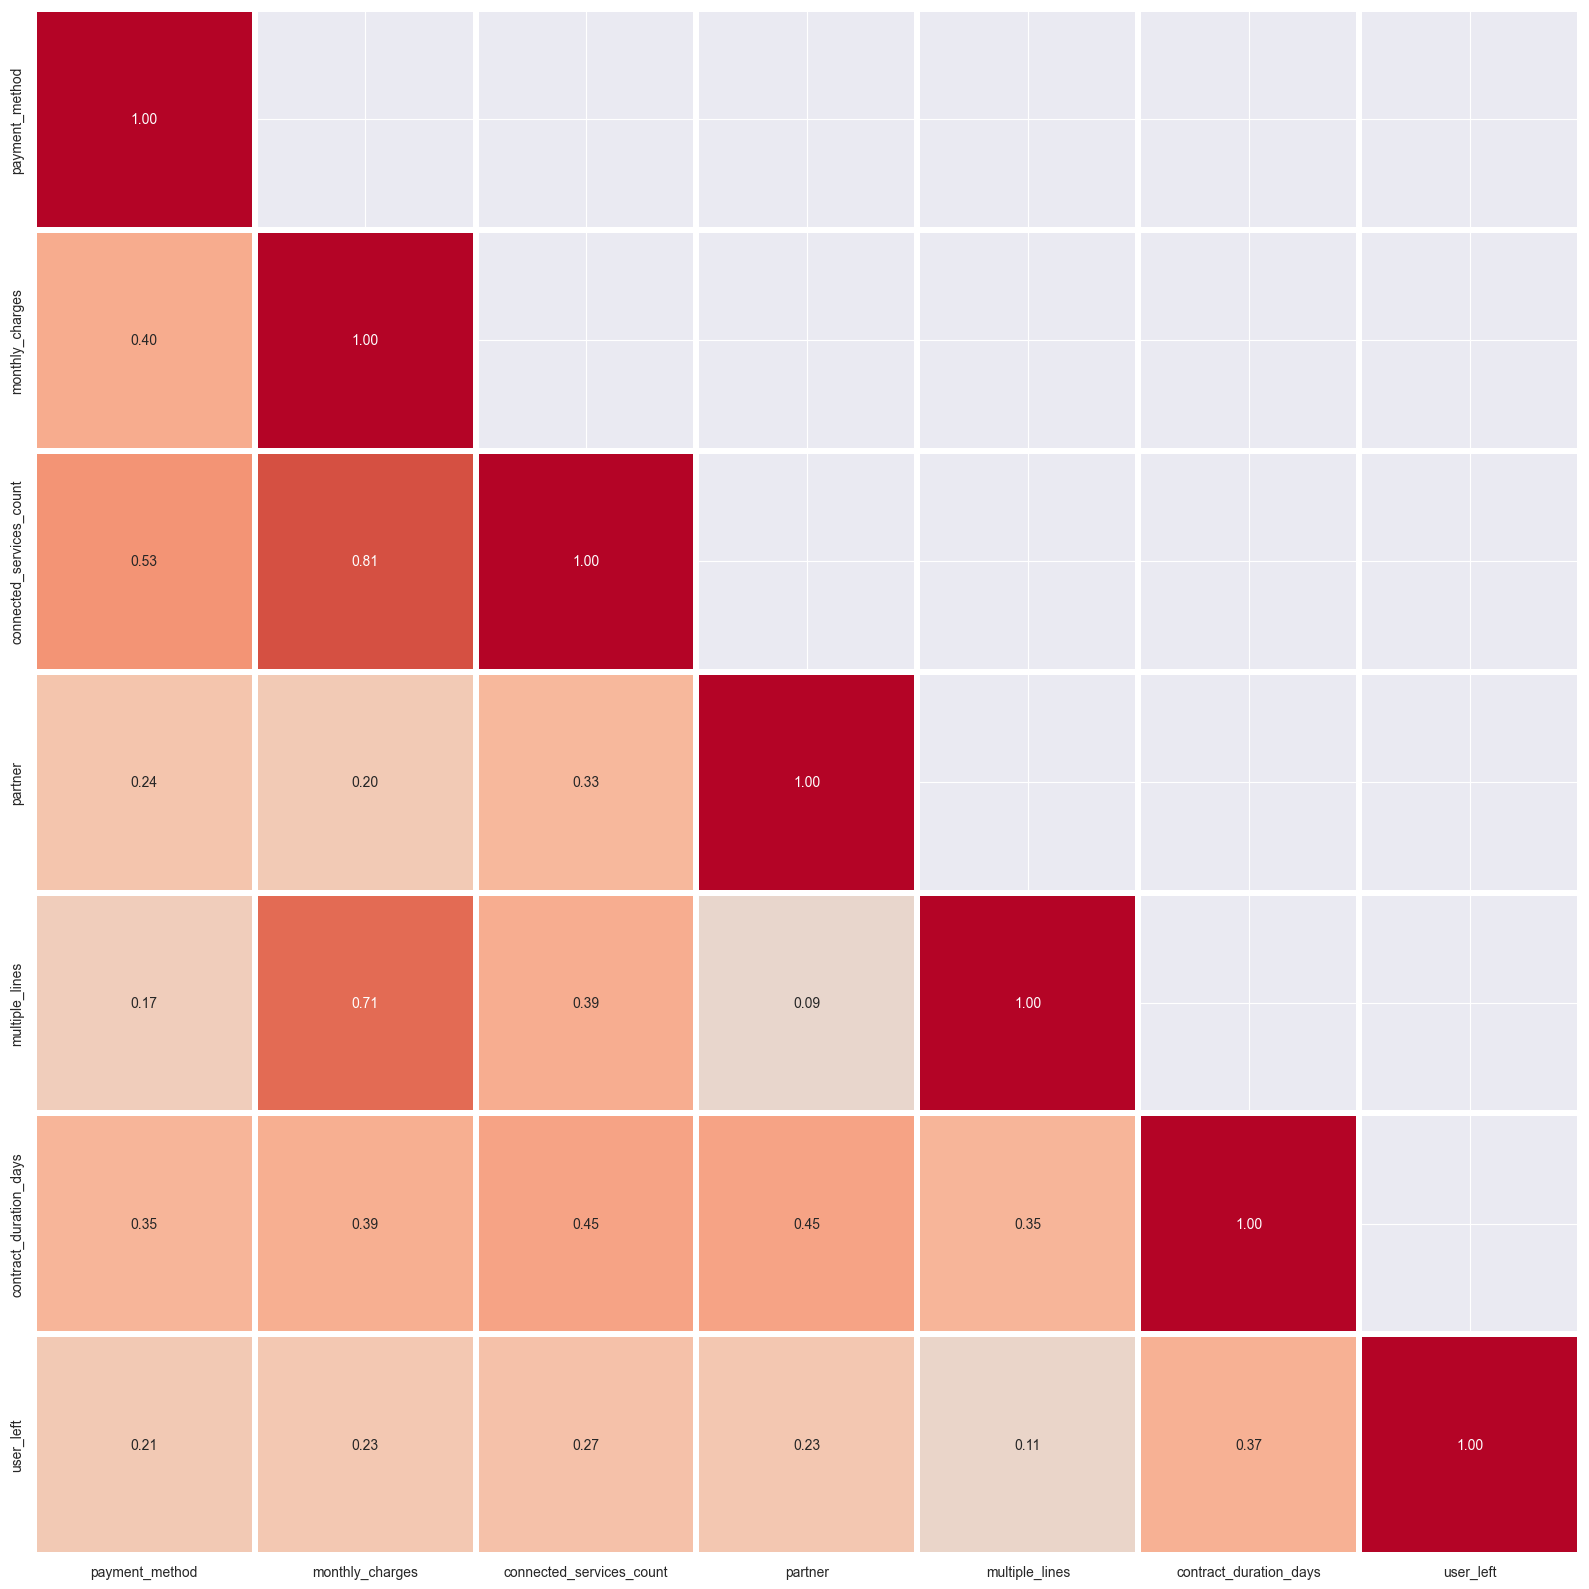

### Корреляция по признаку: `user_left`
___


,Target,Secondary,corr,lvl
0,user_left,contract_duration_days,0.3700,Умеренная
1,user_left,connected_services_count,0.2700,Слабая
2,user_left,monthly_charges,0.2300,Слабая
3,user_left,partner,0.2300,Слабая
4,user_left,payment_method,0.2100,Слабая
5,user_left,multiple_lines,0.1100,Слабая


In [41]:
# Построение проверочной матрицы корреляции
show_corr_heatmap_plot(df_final)

#### Промежуточные выводы
---
- Сильная корреляция и мультиколлинеарность между целевым признаком и остальными не обнаружена
- Присутствует сильная мультиколлинеарность между признаками, которые относятся к подключенным сервисам. Данные признаки были удалены во избежание утечки данных
- Наиболее высокая корреляция целевого признака :
| Признак               | Корреляция |
| ------------------------ | ---- |
| contract_duration_days   | 0.37 |

- Ниже идут признаки с корреляцией в пределах двух десятков:
| Признак               | Корреляция |
| ------------------------ | ---- |
| connected_services_count | 0.27 |
| monthly_charges          | 0.23 |
| partner                  | 0.23 |
| payment_method           | 0.21 |

- Также небольшая корреляция в пределах десятков обнаружена в следующих признаках:
| Признак               | Корреляция |
| ------------------------ | ---- |
| multiple_lines           | 0.11 |


### Выводы
---
> - **Общий анализ** показал адекватность данных и выявил ключевые поведенческие паттерны различных групп пользователей, а также, что в данных присутствует дисбаланс классов в целевом признаке между активными и неактивными пользователями в соотношении ≈5:1
> - **Анализ распределения данных** подтвердил качество подготовленных данных и выявил существенные различия в поведении активных и неактивных пользователей по ключевым признакам
> - **Кореляционный анализ** выявил основные признаки, которые имеют прямую корреляцию с целевым признаком, а также мультиколлинеарность между некоторвмивходящими признаками. Были выявлены самые сильно коррелирующие признаки:
>| Признак                  | Корреляция |
>| ------------------------ | ---- |
>| contract_duration_days   | 0.37 |
>
> - На основе проведенного анализа **был сформирован финальный датафрейм для дальнейшего обучения ML-моделей**

## Подготовка и обучение ML-моделей
---

### Подготовка методов для ML-моделей
___

In [42]:
def train_test_split_with_shape(df, 
                                target, 
                                test_size=TEST_SIZE, 
                                random_state=RANDOM_STATE):
    X = df.drop(target, axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    result = pd.DataFrame(
        data={'X_shape': [X_train.shape, X_test.shape],
              'y_shape': [y_train.shape, y_test.shape]},
        index=['Train', 'Test']
    )
    
    display(Markdown(f'### Размерность выборок `{df.attrs["name"]}` \n___\n'))
    display(result)
    
    return X_train, X_test, y_train, y_test

In [43]:
def build_pipeline(model_type,
                   base_model,
                   cat_columns,
                   num_columns,
                   ord_categories='auto',
                   ohe_categories='auto'):
        
    transformers = []
        
    num_pipe = ImpPipeline([
        ('scaler', MinMaxScaler())
    ])

    transformers.append(('num', num_pipe, num_columns))

    if model_type in ['linear']:
        ohe_pipe = ImpPipeline([
            ('ohe', OneHotEncoder(categories=ohe_categories, sparse_output=False, handle_unknown='ignore', drop='first'))
        ])

        transformers.append(('cat_ohe', ohe_pipe, cat_columns))
    elif model_type in ['tree', 'ensemble']:
        ord_pipe = ImpPipeline([
            ('ord', OrdinalEncoder(categories=ord_categories, handle_unknown='use_encoded_value', unknown_value=-1)),
        ])

        transformers.append(('cat_ord', ord_pipe, cat_columns))

    preprocessor = ColumnTransformer(transformers, remainder='passthrough')
    
    return ImpPipeline([
        ('preprocessor', preprocessor),
        ('model', base_model)
    ])

In [44]:
def construct_param_grid_optuna(model_type, preprocessor_num=None):
    if preprocessor_num is None:
        preprocessor_num = [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            PowerTransformer(method='yeo-johnson'), 
            QuantileTransformer(output_distribution='uniform'),
            'passthrough'
        ]
        
    if model_type in ['ensemble', 'tree']:
        return {
            'rfc': {
                'model': CategoricalDistribution([RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced')]),
                'model__n_estimators': IntDistribution(32, 256, step=16),
                'model__max_depth': IntDistribution(8, 64),
                'model__min_samples_leaf': IntDistribution(2, 50),
                'model__max_features': CategoricalDistribution(['sqrt', 'log2', 0.8]),
                'model__bootstrap': CategoricalDistribution([True, False]),
            },
            'lgbmc': {
                'model': CategoricalDistribution([LGBMClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced', verbose=-1)]),
                'model__n_estimators': IntDistribution(32, 256, step=16),
                'model__max_depth': IntDistribution(8, 64),
                'model__learning_rate': FloatDistribution(0.01, 0.5, log=True),
                'model__reg_alpha': FloatDistribution(0.001, 2.0, log=True),
                'model__reg_lambda': FloatDistribution(0.001, 2.0, log=True),
                'model__num_leaves': IntDistribution(20, 150),
            },
            'adabc': {
                'model': CategoricalDistribution([AdaBoostClassifier(random_state=RANDOM_STATE)]),
                'model__n_estimators': IntDistribution(32, 256, step=16),
                'model__learning_rate': FloatDistribution(0.01, 0.5, log=True),
            }
        }
    
    if model_type in ['linear']:
        return {
            'rc': {
                'model': CategoricalDistribution([RidgeClassifier(random_state=RANDOM_STATE, class_weight='balanced')]),
                'model__alpha': FloatDistribution(0.1, 100.0, log=True),
                'model__max_iter': IntDistribution(32, 256, step=16),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num),                
            },
            'pac': {
                'model': CategoricalDistribution([PassiveAggressiveClassifier(random_state=RANDOM_STATE, class_weight='balanced')]),
                'model__C': FloatDistribution(0.01, 20.0, log=True),
                'model__fit_intercept': CategoricalDistribution([True, False]),
                'model__max_iter': IntDistribution(32, 256, step=16),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num),
            },
            'svc': {
                'model': CategoricalDistribution([SVC(random_state=RANDOM_STATE, class_weight='balanced')]),
                'model__C': FloatDistribution(0.01, 20.0, log=True),
                'model__kernel': CategoricalDistribution(['linear', 'rbf', 'poly']),
                'model__gamma': CategoricalDistribution(['scale', 'auto', 0.001, 0.1]),
            }
        }
    
    display(Markdown(f'Некорректное значение типа модели: "{model_type}"'))

In [45]:
def get_searcher(final_pipeline,
                 param_grid,
                 search_method,
                 scoring,
                 cv):
    kwargs = dict(
        estimator=final_pipeline,
        scoring=scoring,
        cv=cv,
        n_jobs=1,
        verbose=-1,
        random_state=RANDOM_STATE
    )

    if search_method == 'randomized':
        return RandomizedSearchCV(param_distributions=param_grid, n_iter=30, **kwargs)

    if search_method == 'optuna':
        return OptunaSearchCV(param_distributions=param_grid, n_trials=20, refit=True, **kwargs)

    if search_method == 'bayes':
        return BayesSearchCV(search_spaces=param_grid, n_iter=30, **kwargs)
    
    if search_method == 'grid':
        return GridSearchCV(param_grid=param_grid, **kwargs)

### Подготовка данных для обучения модели
---

In [46]:
# Формирование выборок
X_train, X_test, y_train, y_test = train_test_split_with_shape(df_final, TARGET_FEATURE)

### Размерность выборок `df_final` 
___


,X_shape,y_shape
Train,"(5274, 6)","(5274,)"
Test,"(1758, 6)","(1758,)"


In [47]:
# Формирование пайплайнов
num_columns = list(X_train.select_dtypes(include=[float, int]).columns)
cat_columns = list(X_train.select_dtypes(include=[object, 'category']).columns)

tree_pipe_final = build_pipeline(
    model_type='tree',
    base_model=DummyClassifier(strategy='stratified'),
    cat_columns=cat_columns,
    num_columns=num_columns
)

linear_pipeline_final = build_pipeline(
    model_type='linear',
    base_model=DummyClassifier(strategy='stratified'),
    cat_columns=cat_columns,
    num_columns=num_columns
)

### Обучение моделей
---

In [48]:
# Обучение моделей через OptunaSearch
os_full_param_grids = construct_param_grid_optuna('tree') | construct_param_grid_optuna('linear')

os_results_list = []
os_best_model = None
os_best_model_name = None
os_best_cv_score = float('-inf')

for model_key, dist in tqdm(os_full_param_grids.items(), 'OSCV Progress'):
    model_name = dist['model'].choices[0].__class__.__name__

    pipeline = linear_pipeline_final if 'linear' in model_key else tree_pipe_final
        
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    
    searcher = get_searcher(
        pipeline,
        dist,
        scoring='roc_auc',
        search_method='optuna',
        cv=cv,
    )
    
    with tqdm(desc=f'{model_name}') as pbar:
        searcher.fit(X_train, y_train)
        trials_done = len(searcher.cv_results_)
        
        pbar.update(trials_done)
        pbar.set_postfix({'Best CV': f'{searcher.best_score_:.4f}'})
    
    cv_score = searcher.best_score_
    
    os_results_list.append({
        'Best Model': ' '.join(f'{searcher.best_estimator_.named_steps.model}'.replace('\n', ' ').split()),
        'Best CV': f'{cv_score:.4f}',
        'Train Time (sec.)': f'{searcher.refit_time_:.2f}',
        'Pred Time (sec.)': f'{searcher.cv_results_["mean_score_time"][searcher.best_index_]:.2f}',
    })
    
    if cv_score > os_best_cv_score:
        os_best_cv_score = cv_score
        os_best_model = searcher.best_estimator_
        os_best_model_name = searcher.best_estimator_.named_steps.model.__class__.__name__

OSCV Progress:   0%|          | 0/6 [00:00<?, ?it/s]

RandomForestClassifier: 0it [00:00, ?it/s]

[I 2026-02-22 18:24:06,310] A new study created in memory with name: no-name-cb80d5c4-ef69-4145-8fbc-7394f678345d
[I 2026-02-22 18:24:07,175] Trial 0 finished with value: 0.8004085028555747 and parameters: {'model': RandomForestClassifier(class_weight='balanced', max_depth=49,
                       min_samples_leaf=11, n_estimators=208, n_jobs=-1,
                       random_state=20226), 'model__n_estimators': 208, 'model__max_depth': 49, 'model__min_samples_leaf': 11, 'model__max_features': 'sqrt', 'model__bootstrap': True}. Best is trial 0 with value: 0.8004085028555747.
[I 2026-02-22 18:24:07,525] Trial 1 finished with value: 0.7794178492096477 and parameters: {'model': RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=29,
                       min_samples_leaf=7, n_estimators=80, n_jobs=-1,
                       random_state=20226), 'model__n_estimators': 80, 'model__max_depth': 29, 'model__min_samples_leaf': 7, 'model__max_features': 'sqrt', 'model__

LGBMClassifier: 0it [00:00, ?it/s]

[I 2026-02-22 18:24:19,872] A new study created in memory with name: no-name-9bde1799-741d-4642-a26b-dcbed69bda38
[I 2026-02-22 18:24:31,321] Trial 0 finished with value: 0.8115163085785131 and parameters: {'model': LGBMClassifier(class_weight='balanced', learning_rate=0.020557721759884778,
               max_depth=49, n_estimators=208, n_jobs=-1, num_leaves=75,
               random_state=20226, reg_alpha=1.242617714640668,
               reg_lambda=0.08007178444254631, verbose=-1), 'model__n_estimators': 208, 'model__max_depth': 49, 'model__learning_rate': 0.020557721759884778, 'model__reg_alpha': 1.242617714640668, 'model__reg_lambda': 0.08007178444254631, 'model__num_leaves': 75}. Best is trial 0 with value: 0.8115163085785131.
[I 2026-02-22 18:24:36,985] Trial 1 finished with value: 0.8010280902914013 and parameters: {'model': LGBMClassifier(class_weight='balanced', learning_rate=0.02802284414144266,
               max_depth=18, n_estimators=80, n_jobs=-1, num_leaves=100,
        

AdaBoostClassifier: 0it [00:00, ?it/s]

[I 2026-02-22 18:26:39,545] A new study created in memory with name: no-name-2fce6552-bc4f-492e-960c-d3f22e1499b0
[I 2026-02-22 18:26:40,679] Trial 0 finished with value: 0.7939420149982268 and parameters: {'model': AdaBoostClassifier(learning_rate=0.17420422670007216, n_estimators=208,
                   random_state=20226), 'model__n_estimators': 208, 'model__learning_rate': 0.17420422670007216}. Best is trial 0 with value: 0.7939420149982268.
[I 2026-02-22 18:26:41,062] Trial 1 finished with value: 0.7935701825929967 and parameters: {'model': AdaBoostClassifier(learning_rate=0.3913720338100184, n_estimators=64,
                   random_state=20226), 'model__n_estimators': 64, 'model__learning_rate': 0.3913720338100184}. Best is trial 0 with value: 0.7939420149982268.
[I 2026-02-22 18:26:41,952] Trial 2 finished with value: 0.7589768506529384 and parameters: {'model': AdaBoostClassifier(learning_rate=0.05236254113628266, n_estimators=160,
                   random_state=20226), 'mod

RidgeClassifier: 0it [00:00, ?it/s]

[I 2026-02-22 18:26:56,870] A new study created in memory with name: no-name-a62649ed-f083-4791-9112-fa0e805ecb80
[I 2026-02-22 18:26:56,920] Trial 0 finished with value: 0.7097465516454781 and parameters: {'model': RidgeClassifier(alpha=21.014964841962872, class_weight='balanced', max_iter=192,
                random_state=20226), 'model__alpha': 21.014964841962872, 'model__max_iter': 192, 'preprocessor__num__scaler': MinMaxScaler()}. Best is trial 0 with value: 0.7097465516454781.
[I 2026-02-22 18:26:56,965] Trial 1 finished with value: 0.7099309528357025 and parameters: {'model': RidgeClassifier(alpha=0.616887828856372, class_weight='balanced', max_iter=112,
                random_state=20226), 'model__alpha': 0.616887828856372, 'model__max_iter': 112, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 1 with value: 0.7099309528357025.
[I 2026-02-22 18:26:57,014] Trial 2 finished with value: 0.7093373313137167 and parameters: {'model': RidgeClassifier(alpha=61.1920343211622,

PassiveAggressiveClassifier: 0it [00:00, ?it/s]

[I 2026-02-22 18:26:58,003] A new study created in memory with name: no-name-88c4469a-3109-4bc7-a78e-b3afecbb575a
[I 2026-02-22 18:26:58,056] Trial 0 finished with value: 0.5768823972381574 and parameters: {'model': PassiveAggressiveClassifier(C=3.5940071162967637, class_weight='balanced',
                            max_iter=256, random_state=20226), 'model__C': 3.5940071162967637, 'model__fit_intercept': True, 'model__max_iter': 256, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: 0.5768823972381574.
[I 2026-02-22 18:26:58,106] Trial 1 finished with value: 0.5385653128074769 and parameters: {'model': PassiveAggressiveClassifier(C=0.023096776989349962, class_weight='balanced',
                            max_iter=64, random_state=20226), 'model__C': 0.023096776989349962, 'model__fit_intercept': True, 'model__max_iter': 64, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 0 with value: 0.5768823972381574.
[I 2026-02-22 18:26:58,157] Trial 2 finishe

SVC: 0it [00:00, ?it/s]

[I 2026-02-22 18:26:59,170] A new study created in memory with name: no-name-54c7261a-e746-4688-bf26-6f6065b91c98
[I 2026-02-22 18:27:00,464] Trial 0 finished with value: 0.7600034678584803 and parameters: {'model': SVC(C=3.5940071162967637, class_weight='balanced', kernel='poly',
    random_state=20226), 'model__C': 3.5940071162967637, 'model__kernel': 'poly', 'model__gamma': 'scale'}. Best is trial 0 with value: 0.7600034678584803.
[I 2026-02-22 18:27:01,367] Trial 1 finished with value: 0.7363273907435826 and parameters: {'model': SVC(C=0.07404540704704912, class_weight='balanced', gamma=0.1, kernel='poly',
    random_state=20226), 'model__C': 0.07404540704704912, 'model__kernel': 'poly', 'model__gamma': 0.1}. Best is trial 0 with value: 0.7600034678584803.
[I 2026-02-22 18:27:02,368] Trial 2 finished with value: 0.6538191138921301 and parameters: {'model': SVC(C=11.64987168292609, class_weight='balanced', gamma=0.001, kernel='poly',
    random_state=20226), 'model__C': 11.649871682

In [49]:
# Вывод результатов обучения моделей
display(Markdown(f'### Метрики обучения моделей `Optuna Search`\n___'))
display(pd.DataFrame(os_results_list))

### Метрики обучения моделей `Optuna Search`
___

,Best Model,Best CV,Train Time (sec.),Pred Time (sec.)
0,"RandomForestClassifier(class_weight='balanced', max_depth=48, min_samples_leaf=40, n_estimators=160, n_jobs=-1, random_state=20226)",0.8069,0.12,0.02
1,"LGBMClassifier(class_weight='balanced', learning_rate=0.11115497459571116, max_depth=48, n_estimators=256, n_jobs=-1, num_leaves=21, random_state=20226, reg_alpha=0.16465834707598878, reg_lambda=0.03689323680916021, verbose=-1)",0.8830,0.81,0.00
2,"AdaBoostClassifier(learning_rate=0.46885372523216223, n_estimators=208, random_state=20226)",0.8000,0.25,0.01
3,"RidgeClassifier(alpha=89.79055482307352, class_weight='balanced', max_iter=128, random_state=20226)",0.7100,0.01,0.00
4,"PassiveAggressiveClassifier(C=0.011745605397540439, class_weight='balanced', max_iter=80, random_state=20226)",0.7042,0.01,0.00
5,"SVC(C=5.116696944302569, class_weight='balanced', gamma='auto', random_state=20226)",0.7771,0.25,0.07


In [50]:
# Настройка проверки моделей на адекватность Dummy
dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)

y_test_dummy_pred = dummy.predict(X_test)
y_test_dummy_proba = dummy.predict_proba(X_test)[:, 1]

# Проверка лучшей модели на тестовых данных
y_test_pred = os_best_model.predict(X_test)
y_test_pred_proba = os_best_model.predict_proba(X_test)[:, 1]

# Формирование и расчеты метрик
main_metrics = {
    'CV': f'{os_best_cv_score:.4f}',
    'ROC-AUC': f'{roc_auc_score(y_test, y_test_pred_proba):.4f}',
    'Accuracy': f'{accuracy_score(y_test, y_test_pred):.4f}',
}

dummy_metrics = {
    'CV': '-',
    'ROC-AUC': f'{roc_auc_score(y_test, y_test_dummy_proba)}',
    'Accuracy': f'{accuracy_score(y_test, y_test_dummy_pred):.4f}',
}

best_model_metrics = pd.DataFrame(
    data=[main_metrics, dummy_metrics],
    index=['Best Model', 'Dummy Baseline']
)

# Вывод метрик
display(Markdown(f'### Метрики лучшей модели `{os_best_model_name}`\n___'))
display(os_best_model.named_steps.model)
display(pd.DataFrame(best_model_metrics).T)

### Метрики лучшей модели `LGBMClassifier`
___

,boosting_type,'gbdt'
,num_leaves,21
,max_depth,48
,learning_rate,0.11115497459571116
,n_estimators,256
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


,Best Model,Dummy Baseline
CV,0.8830,-
ROC-AUC,0.9132,0.5
Accuracy,0.8862,0.8436


### Выводы
---
**Обучение моделей**
> - Обучение моделей проводилось при помощи **OptunaSearch** с использованием **нескольких моделей**:
    - Деревья и ансамбли:
        - `RandomForestClassifier`
        - `LGBMClassifier`
        - `AdaBoostClassifier`
    - Линейные:
        - `RidgeClassifier`
        - `PassiveAggressiveClassifier`
        - `SVC`
>
> - На основе лучшей оценки CV была отобрана **лучшая модель `LGBMClassifier`** с параметрами:
> ```python
>     LGBMClassifier(class_weight='balanced',
>                    learning_rate=0.11115497459571116,
>                    max_depth=48,
>                    n_estimators=256,
>                    n_jobs=-1,
>                    num_leaves=21,
>                    random_state=20226,
>                    reg_alpha=0.16465834707598878,
>                    reg_lambda=0.03689323680916021,
>                    verbose=-1)
> ```
> - **Лучшие метрики** модели получились следующими:
>
> |           | Best Model Baseline | Dummy Baseline |
> | --------- | ---------- | -------------- |
> | CV        | 0.8830     | -              |
> | ROC-AUC   | 0.9132     | 0.5            |
> | Accuracy  | 0.8862     | 0.8436         |
>
>
> - Модель показала свою **адекватность по CV и отсутствие переобучения**
> - **Оценка модели по Dummy** также показала свою адекватность - **лучшая модель превысила случайную на ≈80%, а `accuracy` на ≈4 пункта**
> - При этом **главная метрика ROC-AUC** превысила минимальный в 0.85 на 0.6 пунктов и **составила 0.92 пункта**
> - Метрика Accuracy показала, **что модель корректно предсказывает класс с вероятностью в 88.6%**
> - Полученные метрики могут говорить об **отсутствии переобучения и мультиколинеарности**
> - **Далее анализ будет проводиться на основе модели `Optuna - LGBMClassifier`**

## Анализ лучшей модели
---

### Подготовка методов для анализа модели
___

In [51]:
def show_cm_roc_curve(y_true, y_pred, y_proba):
    fig, (ax_1, ax_2) = plt.subplots(figsize=FIGSIZE_SINGLE, ncols=2, nrows=1)
    
    sns.heatmap(
        confusion_matrix(y_true, y_pred),
        annot=True,
        cmap=PALETTE_NUMERIC,
        cbar=False,
        linewidths=4,
        square=True,
        fmt='d',
        ax=ax_1
    )

    ax_1.set_ylabel('Actually')
    ax_1.set_xlabel('Predictions')
    ax_1.set_title(f'Confusion Matrix', **FONT_SUBTITLE_KWARGS)

    roc_display = RocCurveDisplay.from_predictions(
        y_true,
        y_proba,
        name=f'{model_name}',
        plot_chance_level=True,
        despine=True,
        color=COLOR_SINGLE_BASIC,
        ax=ax_2
    )
        
    ax_2.fill_between(
        roc_display.fpr,
        roc_display.tpr,
        alpha=0.4,
        color=COLOR_SINGLE_BASIC
    )

    ax_2.set_xlabel('False Positive Rate (FPR)')
    ax_2.set_ylabel('True Positive Rate (TPR)')
    ax_2.set_title(f'ROC-curve', **FONT_SUBTITLE_KWARGS)
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)

In [52]:
def show_feature_importance_bar(df, top_n=10, model_name='Model'):
    df['norm_value'] = df.value / df.value.max()
    df = df.sort_values('value', ascending=False).head(top_n)
    
    fig, ax = plt.subplots(figsize=FIGSIZE_SINGLE)
    fig.suptitle(f'{model_name}: {top_n} наиболее влиятельных признаков', **FONT_SUBTITLE_KWARGS)

    sns.barplot(
        data=df,
        x='value',
        y='name',
        palette=PALETTE_NUMERIC,
        ax=ax   
    )
    
    ax.set(
        xlabel=X_CAPTION_IMP,
        ylabel=Y_CAPTION_IMP,
    )
    
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%.4f', padding=3)
        
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    
    display(df)

In [53]:
def show_shap(shap_values, model_name='Model'):
    shap.plots.bar(shap_values, show=False)
    fig = plt.gcf()
    fig.set_size_inches(FIGSIZE_SINGLE)
    fig.suptitle(f'{model_name} SHAP Bar: Средняя важность признаков', **FONT_TITLE_KWARGS)
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    
    shap.plots.violin(shap_values, show=False) 
    fig = plt.gcf()
    fig.set_size_inches(FIGSIZE_SINGLE)
    fig.suptitle(f'{model_name} SHAP Violin: Распределение вклада признаков', **FONT_TITLE_KWARGS)
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    
    shap.plots.waterfall(shap_values[50], show=False)
    fig = plt.gcf()
    fig.set_size_inches(FIGSIZE_SINGLE)
    fig.suptitle(f'{model_name} SHAP Waterfall: Вклад в конкретное предсказание', **FONT_TITLE_KWARGS)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

### Анализ матрицы ошибок и ROC-кривой
___

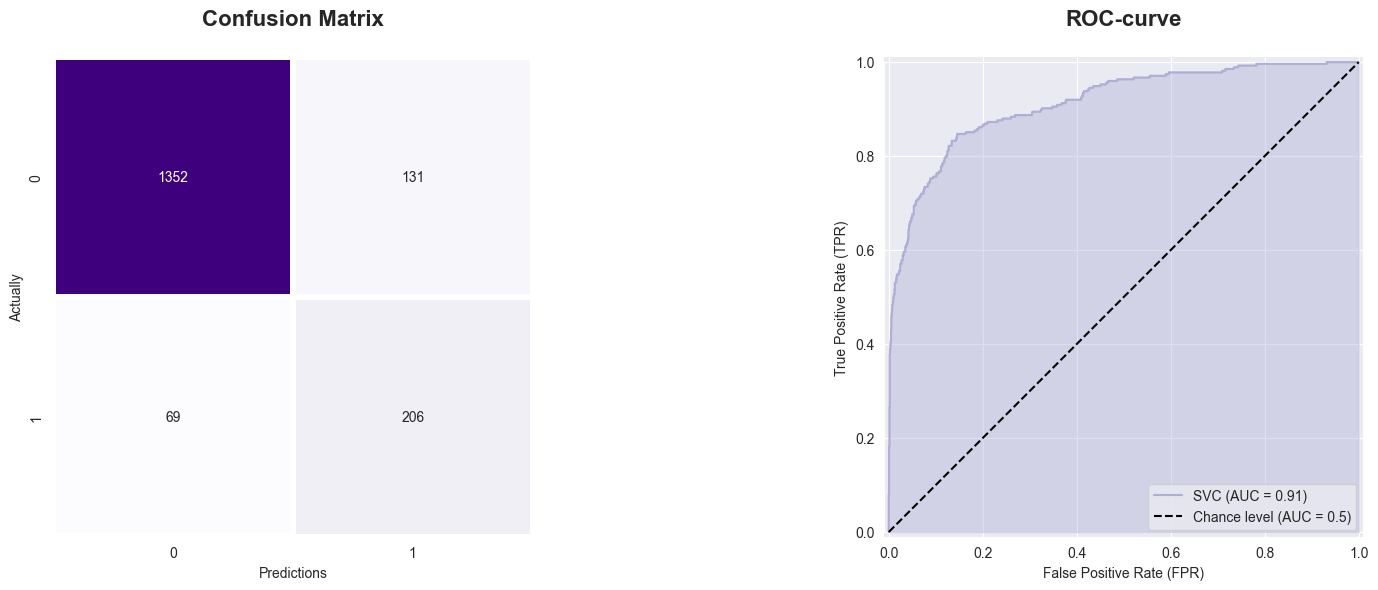

In [54]:
# Вывод матрицы ошибок и ROC-кривой
show_cm_roc_curve(
    y_test,
    y_test_pred,
    y_test_pred_proba,
)

### Анализ важности признаков
___

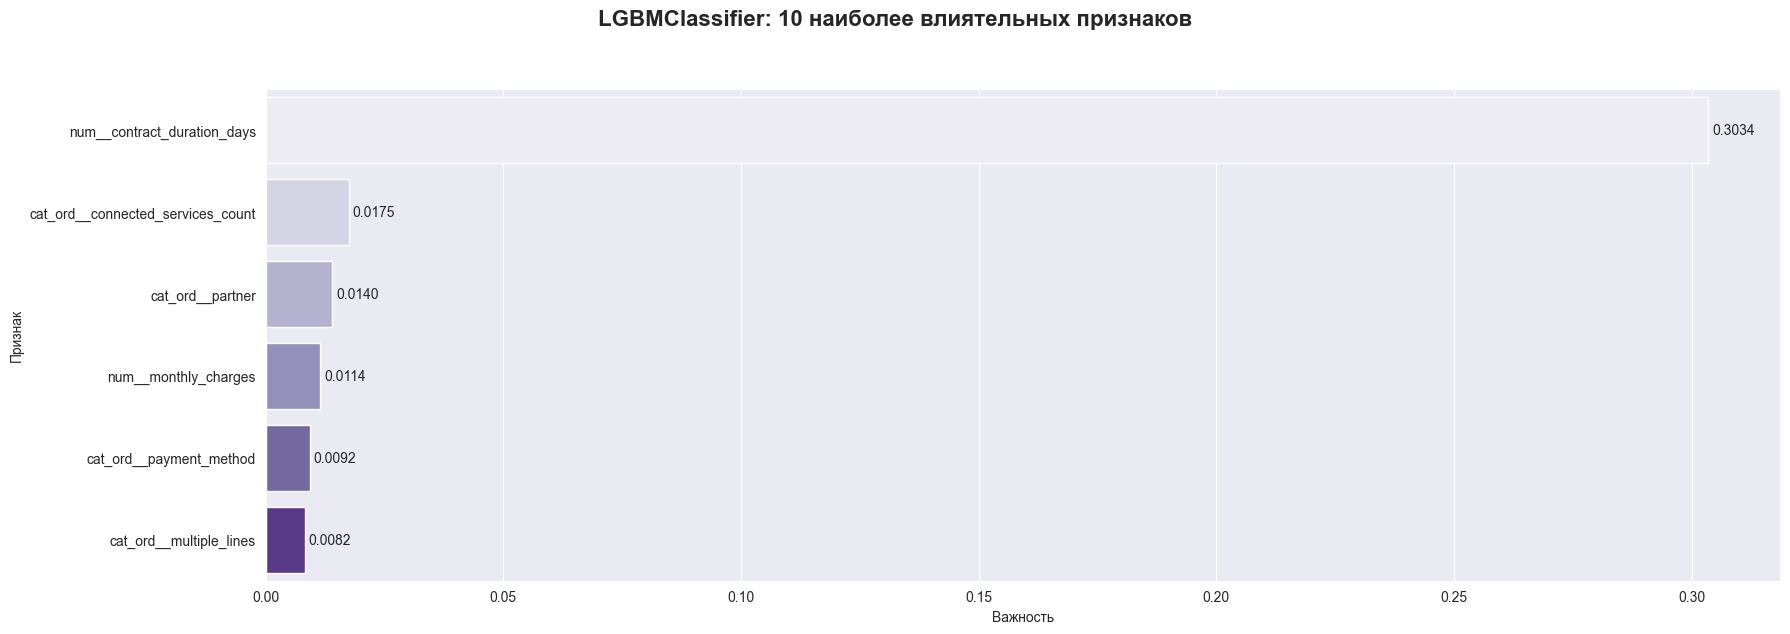

,name,value,norm_value
1,num__contract_duration_days,0.3034,1.0000
3,cat_ord__connected_services_count,0.0175,0.0576
4,cat_ord__partner,0.0140,0.0462
0,num__monthly_charges,0.0114,0.0376
2,cat_ord__payment_method,0.0092,0.0305
5,cat_ord__multiple_lines,0.0082,0.0270


In [55]:
# Определение пермутационной важности признаков
best_model = os_best_model.named_steps.model
best_model_preprocessor = os_best_model.named_steps.preprocessor
best_model_feature_names= best_model_preprocessor.get_feature_names_out()

X_train_transformed = best_model_preprocessor.transform(X_train)
X_test_transformed = best_model_preprocessor.transform(X_test)

perm_importance = permutation_importance(
    best_model,
    X_test_transformed,
    y_test,
    scoring='roc_auc',
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Визуализация и вывод информации
feature_importance = pd.DataFrame({
    'name': best_model_feature_names,
    'value': perm_importance.importances_mean,
})

show_feature_importance_bar(feature_importance, model_name=os_best_model_name)

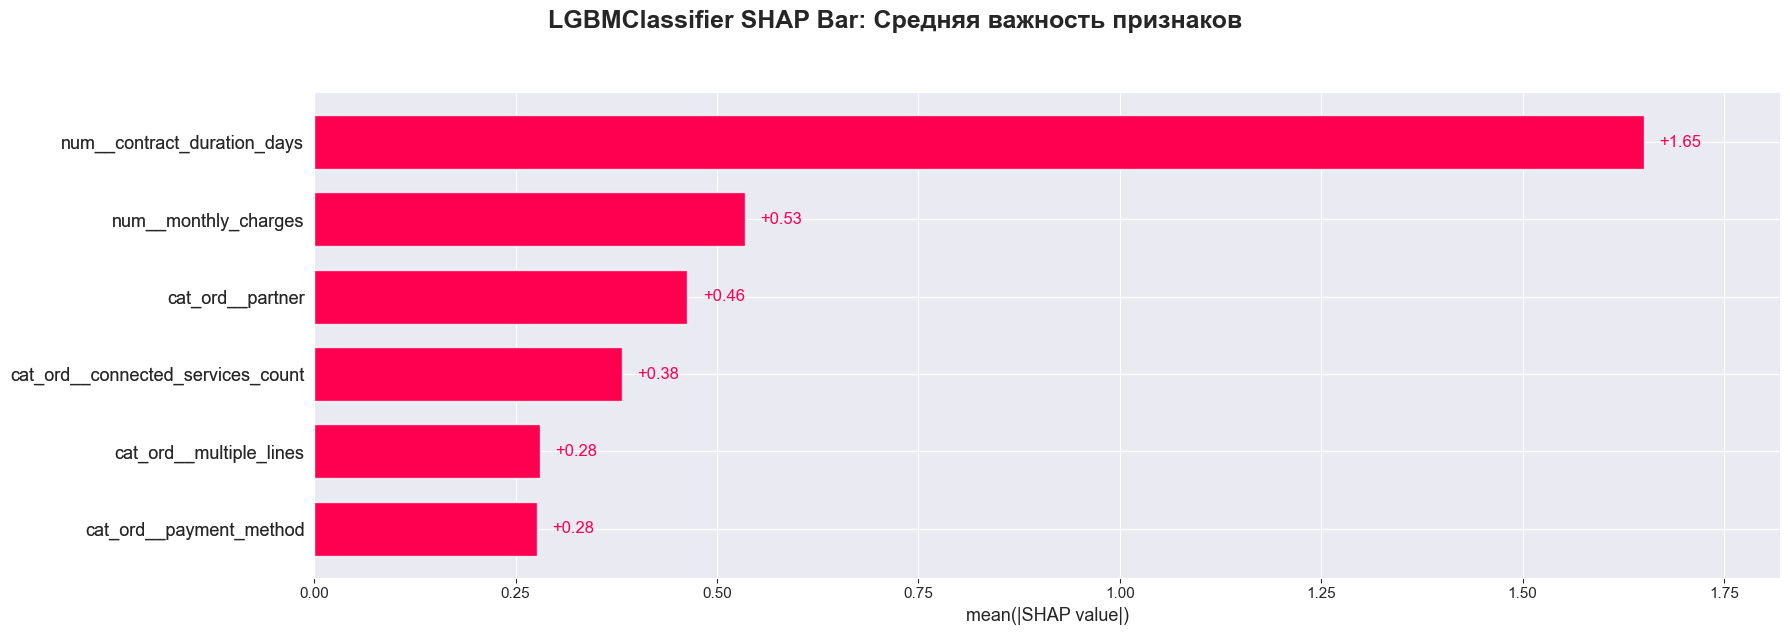

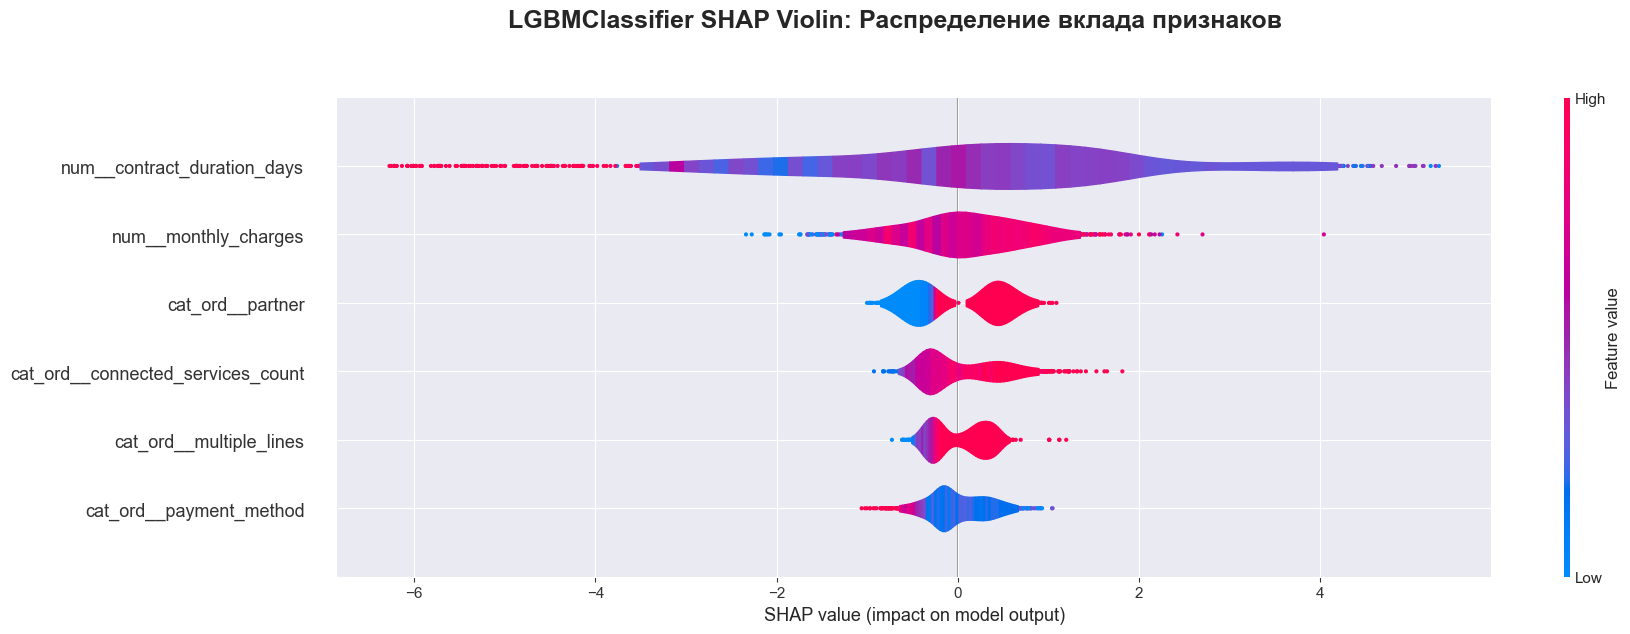

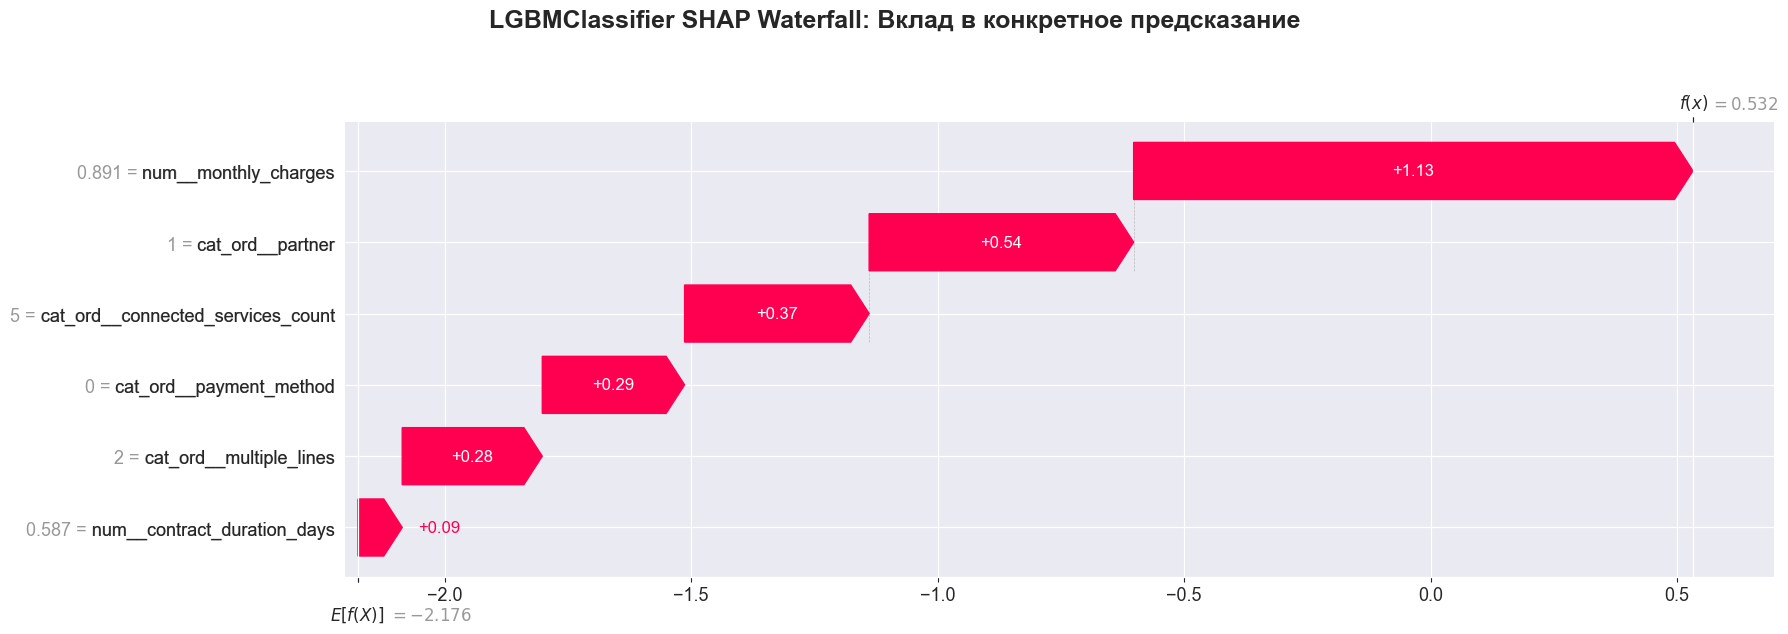

In [56]:
# Определение SHAP-значений
data = pd.DataFrame(
    X_test_transformed,
    columns=best_model_feature_names
)

explainer = shap.TreeExplainer(best_model)

shap_values = explainer(data)

show_shap(shap_values, model_name=os_best_model_name)

### Выводы
---
**Анализ матрицы ошибок и ROC-кривой**
> - Матрица ошибок показала следующие предсказания модели:
>    - **TP(206)** - модель верно определила ушедших пользователей.
>    - **TN(1352)** - модель верно определила активных пользователей
>    - **FP(131)** - модель ошиблась: назвала пользователей ушедшими, хотя они активны
>    - **FN(69)** - модель ошиблась: назвала пользователей активными, хотя они ушли <br> <br>
> 
> - На ROC-кривой видно, что **модель обладает хорошей различительной способностью**. Показатель ROC-AUC метрики подтверждает эффективность модели по сравнению со случайным угадыванием (пунктирная линий)

**Анализ важности признаков**
> - Согласно анализу важности признаков, лидером оказался всего один признак -  **`'contract_duration_days'`**
> - Остальные признаки оказывают совсем незначительное влияние

**Анализ SHAP**
> **Самые важные признаки**
>
> Наибольший вклад в модель также привносит признак **`'contract_duration_days'`**
>
> **Характер влияния**
>
> - Можно сделать вывод, что чем дольше пользователь остается клиентом компании тем меньше вероятность его ухода, равнозначно и обратное - чем меньше пользователь с компанией, тем выше шанс его ухода. Хотя и точки на графике сильно перемешаны справа, скопление пользователей с низкой длительностью больше. Это может говорить о высокой лояльности "старичков"
> - Относительно ежемесячных платежей видно, что большая сумма ежемесячного платежа увеличивает вероятность ухода, а меньшая - уменьшает шансы.
> - Наличие партнера странным образом оказывает влияние на вероятность ухода. Вероятно, для таких пользователей важно наличие семейного тарифа
> - Количество подключенных сервисов также оказывает сильное влияние на вероятность ухода. Возможно, это стоит рассматривать в связке с ежемесячными платежами, т.к. количество сервисов логично увеличивает общую стоимость тарифа
> - То же самое может и касаться кол-ва подключенных телефонных линий. Больше подключенных линий - больше стоимость тарифа
> - Метод платежа практически никак не влияет на вероятность ухода, но отдельные ситуации могут так или иначе повлиять на нее
>
> **Индивидуальный признак**
>
> Согласно одному признаку можно увидеть, как положительно поалиял признак месячных трат в тотале на предсказание. Далее идет наличие партнера, кол-во подклченных сервисов, метод платежа и кол-во телефонных линий. Видно, что каждый из признаков сделал положительное предсказание в пользу ухода данного пользователя.
>
> Однако длительность контракта для этого пользователя оказала нименьшее влияние.

## Итоговые выводы
---

### Краткий обзор проделанной работы
___
> - Данные были загружены и предварительно изучены
>
>
> - Проведена предобработка данных в которой были удалены дубликаты, заполнены пропуски и нулевые значения, устранены аномалии посредством удаления, типы данных заменены на корректные. Также на сонове начала и окончания действия контракта был сформирован целевой признак
>
>
> - Проведен общий исследовательский анализ данных, который также включал в себя кореляционный анализ, анализ дисбаланса и распределения данных. На основе анализа былия выявлены мультиколлинеарные признаки и признаки, которые могли бы повлять на утечку данных, после чего были удалены.
>
>
> - Была разработана и выбрана **лучшая ML-модель для Предсказания оттока пользователей**. Для поиска модели был выбран способ Optuna Search. В качестве лучшей модели на основе оценки CV и скорости обучения была выбрана модель со следующими параметрами:
> ```python
>     LGBMClassifier(class_weight='balanced',
>                    learning_rate=0.11115497459571116,
>                    max_depth=48,
>                    n_estimators=256,
>                    n_jobs=-1,
>                    num_leaves=21,
>                    random_state=20226,
>                    reg_alpha=0.16465834707598878,
>                    reg_lambda=0.03689323680916021)
> ```
>
> - Проведены анализ матрицы ошибок и ROC-кривой, которые поазали хорошую различительную способность модели и ее общую эффективность и адекватность
>
> - Проведен анализ важности признаков, который показал, что наиболее влиятельным из них является признак длительности контракта - **`'contract_duration_days'`**
>
>
> - Анализ при помощи метода SHAP также показал, что данный признак является наиболее влиятельными в каждом из проведенных исследований

### Главный вывод и рекомендации
___
**Рекомендации:**
> Модель предсказания показала, что наибольшее влияние на отток клиентов оказывает продолжительность контракта
>
>
> Исходя из этого можно оставить идею, как и было задумано ранее самой компанией, предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Но в первую очередь стоит сконцентрироваться на новых пользователях, т.к. вероятность их ухода оказалась выше, нежели у лояльных пользователей
>
> Дополнительно для удержания пользователей исходя из проведенного анализа можно порекомендовать следующее:
> - Рассмотреть варианты пакетных тарифов и/или тарифов-конструкторов для пользователей, которые хотят подключить сразу несколько услуг и/или сервисов
> - Рассмотреть возможность внедрения семейного тарифа для людей у которых есть партнер
> - Рассмотреть возможность внедрения тарифа с динамическим снижением цены каждый год пользования до приемлемого порога по доходности
> - Делать периодические сезонные предложения и акции для текущих пользователей (например, "оплати 3 месяца и получи 4-й в подарок"
> - Предлагать для пользователей цены сопоставимые с теми, которые им предложили другие компании, если это не повлияет на доходность
> - Провести исследование конкурентов и в целом пересмотреть политику ценообразования, т.к. есть вероятность, что конкуренты могут предлагать более выгодные предложения

### Рекомендации по формированию базы
___
> В общем виде датафрейм оказался не очень чистым, в связи с чем можно дать следующие рекомендации:
> - Сразу задавать корректные типы данных для признаков при формировании базы
> - Обязательно заполнять отсутствующие значения для корректности (например, в базах про интернет и телефонию это можно было бы сделать заранее для пользователей, которые ими и не пользуются)
> - В поле окончания действия контракта, если он еще действителен, автоматиески подставлять текущую дату
> - В дальнейшем можно добавить новые признаки, которые будут показывать:
    - вернувшийся ли это пользователь 
    - причина по которой вернулся (например: акция, промокод, скидка, новый тариф и т.д)